In [715]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
from plotnine import *
import plotly.graph_objects as go
from pandas.api.types import CategoricalDtype
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


In [716]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Central Level**

In [717]:
#reading files containing crop information central level
df_crop_area_01_15 = pd.read_csv('/content/drive/MyDrive/data_vis/crop/central/All India level Area Under Principal Crops from 2001-02 to 2015-16.csv')
df_crop_production_01_17 = pd.read_csv('/content/drive/MyDrive/data_vis/crop/central/All India level Production of Principal Crops from 2001-02 to 2016-17.csv')
df_crop_avg_yield_01_15 = pd.read_csv('/content/drive/MyDrive/data_vis/crop/central/All India level Average Yield of Principal Crops from 2001-02 to 2015-16.csv')

df_crop_index_area_07_16 = pd.read_csv('/content/drive/MyDrive/data_vis/crop/central/All India level Index Numbers of Area of Principal Crops from 2007-08 to 2015-16.csv')
df_crop_index_production_07_16 = pd.read_csv('/content/drive/MyDrive/data_vis/crop/central/All India level Index Numbers of Production of Principal Crops from 2007-08 to 2015-16.csv')
df_crop_index_yield_07_16 = pd.read_csv('/content/drive/MyDrive/data_vis/crop/central/All India level Index Numbers of Yield of Principal Crops from 2007-08 to 2015-16.csv')
df_crop_price_index = pd.read_csv('/content/drive/MyDrive/data_vis/crop/central/Annual Wholesale Price Index of Agriculture Produce.csv')

df_crop_land_utilisation_00_15 = pd.read_csv('/content/drive/MyDrive/data_vis/crop/central/All India level Pattern of Land Utilisation from 2000-01 to 2014-15.csv')


**Distribution and use of Land**

Few Terminologies:

1. **Barren Land**: Barren land refers to areas of land that are devoid of vegetation and are generally unsuitable for cultivation due to factors such as poor soil quality, aridity, or extreme environmental conditions. These lands may lack the necessary nutrients and water retention capacity to support plant growth.

2. **Fallow Land**: Fallow land is agricultural land that is deliberately kept out of cultivation for a temporary period, typically to allow it to recover fertility or to conserve soil moisture. Fallowing helps prevent soil erosion, promotes soil structure improvement, and breaks pest and disease cycles. There are two types of fallow land:
   - **Current fallows**: Fields that have been intentionally left uncultivated during the current agricultural season.
   - **Other fallows**: Fields that have been kept out of cultivation for more than one agricultural season.

3. **Permanent Pastures**: Permanent pastures refer to areas of land covered with grasses, legumes, or other forage crops that are maintained for grazing livestock. These pastures are not plowed or reseeded frequently and provide a continuous source of fodder for livestock.

4. **Miscellaneous Tree Crops & Groves**: This category includes areas of land planted with trees or woody perennial crops such as fruit orchards, nut orchards, and timber plantations. These tree crops are cultivated for their fruit, nuts, wood, or other products and may require long-term management practices.

5. **Culturable Waste Land**: Culturable waste land refers to areas of land that are potentially cultivable but are currently not under cultivation due to various reasons such as physical limitations, lack of irrigation facilities, or economic constraints. These lands may require investment in land development activities to make them suitable for cultivation.

6. **Net Area Sown**: Net area sown represents the total area of land actually planted with crops during a specific agricultural season. It excludes fallow lands and other uncultivated lands and provides a measure of the actual area used for crop production.



In [718]:
def create_interactive_pie_chart(row, title):
    '''Creates interactive pie charts that shows the total distribution of land.'''
    labels = ['Forests', 'Not available for cultivation', 'Other uncultivated Land (excluding Fallow Land)',
            'Fallow Lands', 'Net area Sown( x10 ha)']
    values = [row['Forests (Col.4)'], row['Not available for cultivation - Total (Col.7 = Col.5+Col.6)'],
            row['Other uncultivated Land excluding Fallow Land - Total (Col.11 = Col.8 to Col.10)'],
            row['Fallow Lands - Total Col.14 = (Col.12+Col.13)'], row['Net area Sown (Col.15)']]

    # Create the main pie chart trace
    trace_main = go.Pie(labels=labels, values=values, hoverinfo='label+percent',
                        textinfo='value', hole=0.5, name='Main')

    # Define the nested pie chart data
    nested_labels_fallow = ['Current fallows', 'Fallow Lands other than current fallows']
    nested_values_fallow = [row['Fallow Lands - Current fallows (Col.13)'],
                            row['Fallow Lands - Fallow Lands other than current fallows (Col.12)']]

    nested_labels_uncultivated = ['Permanent pastures & other Grazing Lands',
                                'Land under Misc. tree crops & groves', 'Culturable waste Land']
    nested_values_uncultivated = [row['Other uncultivated Land excluding Fallow Land - Permanent pastures & other Grazing Lands (Col.8)'],
                                row['Other uncultivated Land excluding Fallow Land - Land under Misc. tree crops & groves (not incl. in net area sown) (Col.9)'],
                                row['Other uncultivated Land excluding Fallow Land - Culturable waste Land (Col.10)']]

    nested_labels_not_available = ['Area under non-agricultural uses', 'Barren and unculturable Land']
    nested_values_not_available = [row['Not available for cultivation - Area under non-agricultural uses (Col.5)'],
                                row['Not available for cultivation - Barren and unculturable Land (Col.6)']]

    # Create the nested pie chart traces
    trace_nested_fallow = go.Pie(labels=nested_labels_fallow, values=nested_values_fallow, hoverinfo='label+percent',
                                textinfo='value', hole=0.2, name='Fallow Lands', visible=False)

    trace_nested_uncultivated = go.Pie(labels=nested_labels_uncultivated, values=nested_values_uncultivated, hoverinfo='label+percent',
                                    textinfo='value', hole=0.2, name='Other uncultivated Land', visible=False)

    trace_nested_not_available = go.Pie(labels=nested_labels_not_available, values=nested_values_not_available, hoverinfo='label+percent',
                                        textinfo='value', hole=0.2, name='Not available for cultivation', visible=False)

    # Combine the traces into a single figure
    fig = go.Figure(data=[trace_main, trace_nested_fallow, trace_nested_uncultivated, trace_nested_not_available])

    # Set initial title
    fig.update_layout(title=f"Land Distribution in {title} for Year {row['Year (Col.1)']}")

    # Define buttons for toggling visibility of nested pie chart slices
    buttons = [
        dict(label='Major_distribution', method='update', args=[{'visible': [True, False, False, False]}]),
        dict(label='Fallow Lands', method='update', args=[{'visible': [False, True, False, False]}]),
        dict(label='Other uncultivated Land', method='update', args=[{'visible': [False, False, True, False]}]),
        dict(label='Not available for cultivation', method='update', args=[{'visible': [False, False, False, True]}])
    ]

    # Add buttons to the layout
    fig.update_layout(updatemenus=[{'buttons': buttons}])

    # Display the figure
    fig.show()

# Selecting the rows corresponding to years 2000-01 and 2016-17
row_2000_01 = df_crop_land_utilisation_00_15.iloc[0]
row_2016_17 = df_crop_land_utilisation_00_15.iloc[-1]

# Creating interactive pie charts for the selected rows
create_interactive_pie_chart(row_2000_01, 'India')
create_interactive_pie_chart(row_2016_17, 'India')


India is a vast country and has a large geographical area, out of which almost 23 % are forests, 45% are used for cultivation , around 8-9% is fallow land where as the rest is not used for crop cultivation while a small part (less than 1%) land is barren.


*   It is seen from this *interactive chart* above that the forest area has increased in recent years.
*   We know the land is limited, therefore many technologies and practices like vertical farming, Hydroponics and Aeroponics are coming up which reduces budern on land





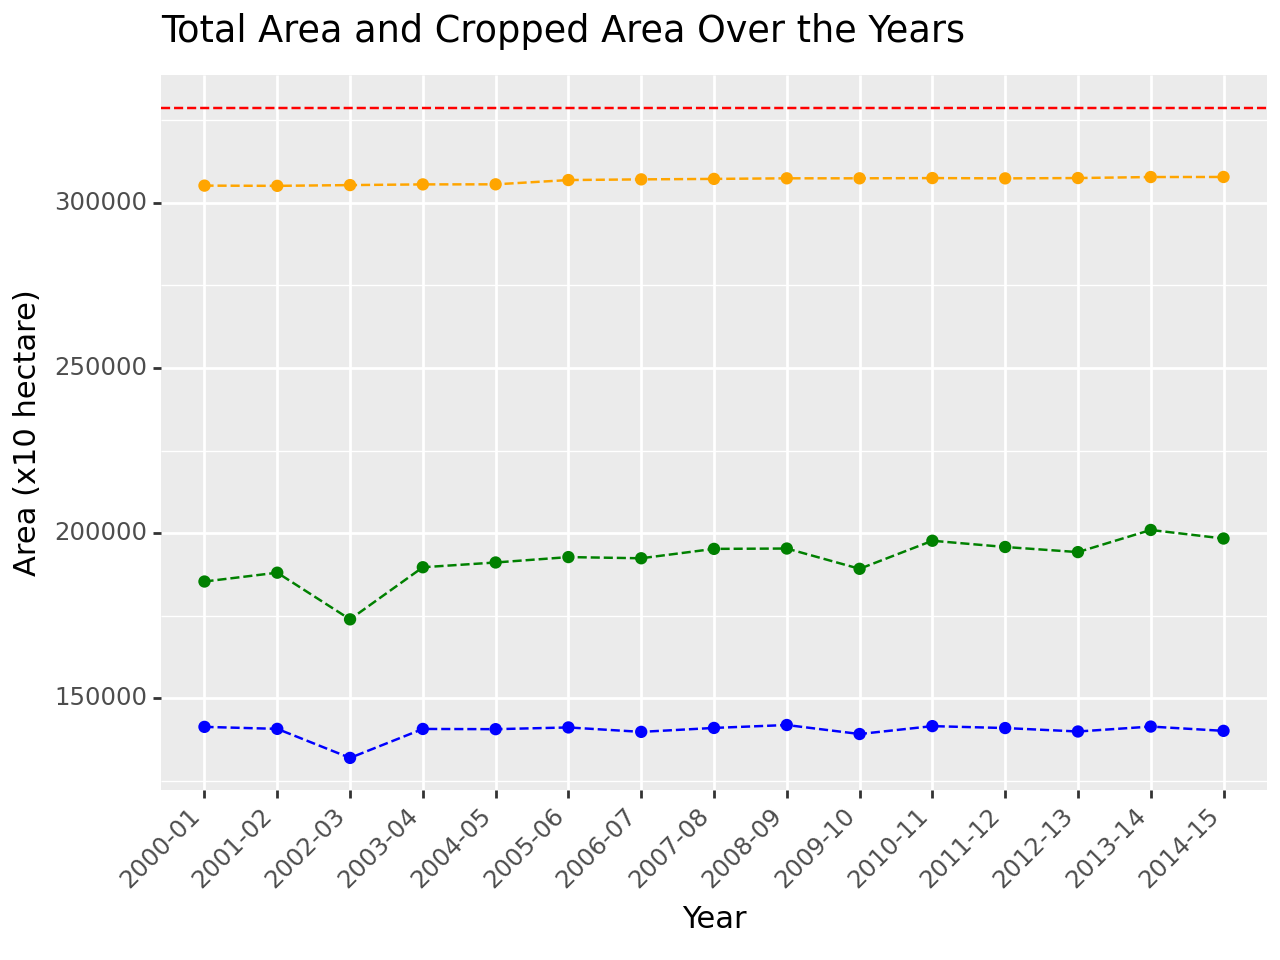

In [719]:
# Showing the land distribution over the years for cultivated land
plot_cultivation = (
    ggplot(df_crop_land_utilisation_00_15) +

    # Total area sown
    aes(x='Year (Col.1)', y='Net area Sown (Col.15)') +
    geom_point(color='blue', group=1) +
    geom_line(color='blue', linetype='dashed', group=1) +

    # Total area reported for land utilization statistics
    geom_point(aes(y='Reporting area for Land utilisation statistics (Col.3 = Col.4+Col.7+ Col.11+Col.14+Col.15)'), color='orange', group=2) +
    geom_line(aes(y='Reporting area for Land utilisation statistics (Col.3 = Col.4+Col.7+ Col.11+Col.14+Col.15)'), color='orange', linetype='dashed', group=2) +

    # Total cropped area (including land sown more than once)
    geom_point(aes(y='Total cropped area (Col.16)'), color='green', group=2) +
    geom_line(aes(y='Total cropped area (Col.16)'), color='green', linetype='dashed', group=2) +

    # Horizontal dashed line for total geographical area
    geom_hline(aes(yintercept='Geographical Area (Col.2)'), color='red', linetype='dashed') +
    labs(title='Total Area and Cropped Area Over the Years', x='Year', y='Area (x10 hectare)',
         color='Legend') +  # Adding legend label
    theme(axis_text_x=element_text(angle=45, hjust=1))  # Rotate x-axis labels by 45 degrees
)

# Display the plot
print(plot_cultivation)


The blue color points show total area sown where as the green color points show Total cropped area (including land sown more than once).
The red line shows total geographical area while the orange line shows the total land for utilistion ( This excludes land like mountains).

It can be seen that the that there was a significant decrease in both total cropped area and total area sown in 2002-03.

One reason could be the sparse rainfall and droughts that year. As we know, Rajasthan faced one of the worst droughts of the century that year.

In [720]:
df_crop_area_01_15.rename(columns = {"Food grains (cereals) - Rice": "Rice", "Food grains (cereals) - Wheat" : "Wheat", "Food grains (cereals) - Jowar": "Jowar","Food grains (cereals) - Bajra": "Bajra", "Food grains (cereals) - Maize": "Maize", "Food grains (cereals) - Ragi": "Ragi", "Food grains (cereals) - Small millets":"Small millets", "Food grains (cereals) - Barley": "Barley", "Oilseeds - Groundnut": "Groundnut", "Oilseeds - Castorseed": "Castorseed","Oilseeds - Sesamum": "Sesamum", "Oilseeds - Rapeseed and mustard": "Rapseed and mustard", "Oilseeds - Linseed": "Linseed","Oilseeds - All Nine oilseeds (*)": "All nine oilseeds", "Natural Rubber (Tapped area)":"Natural Rubber", "Food grains(pulses) - Gram": "Gram", "Food grains(pulses) - Other Pulses": "Other pulses", "Food grains(pulses) - Total Pulses": "Total Pulses","Food grains(pulses) - Tur": "Tur"    }, inplace = True)

In [721]:
df_crop_area_01_15.drop(columns = ['Total Cereals','Total Food grains','Groundnut', 'Castorseed', 'Sesamum',
       'Rapseed and mustard', 'Linseed','Tur', 'Gram', 'Other pulses' ], inplace = True)

In [722]:
crop_area_columns = df_crop_area_01_15.columns[1:]
df_crop_area_01_15[crop_area_columns] = df_crop_area_01_15[crop_area_columns].apply(pd.to_numeric, errors='coerce')

# Normalizing the values
normalized_df_crop_area = df_crop_area_01_15.copy()
normalized_df_crop_area[crop_area_columns] = normalized_df_crop_area[crop_area_columns].div(normalized_df_crop_area[crop_area_columns].sum(axis=1), axis=0)


In [723]:
df_transposed = df_crop_area_01_15.set_index('Year').transpose()

# Reset index to convert the crop names from index to a column
df_transposed = df_transposed.reset_index().rename(columns={'index': 'Crop'})

# Melt the DataFrame to long format
tidy_df = pd.melt(df_transposed, id_vars='Crop', var_name='Year', value_name='Area')

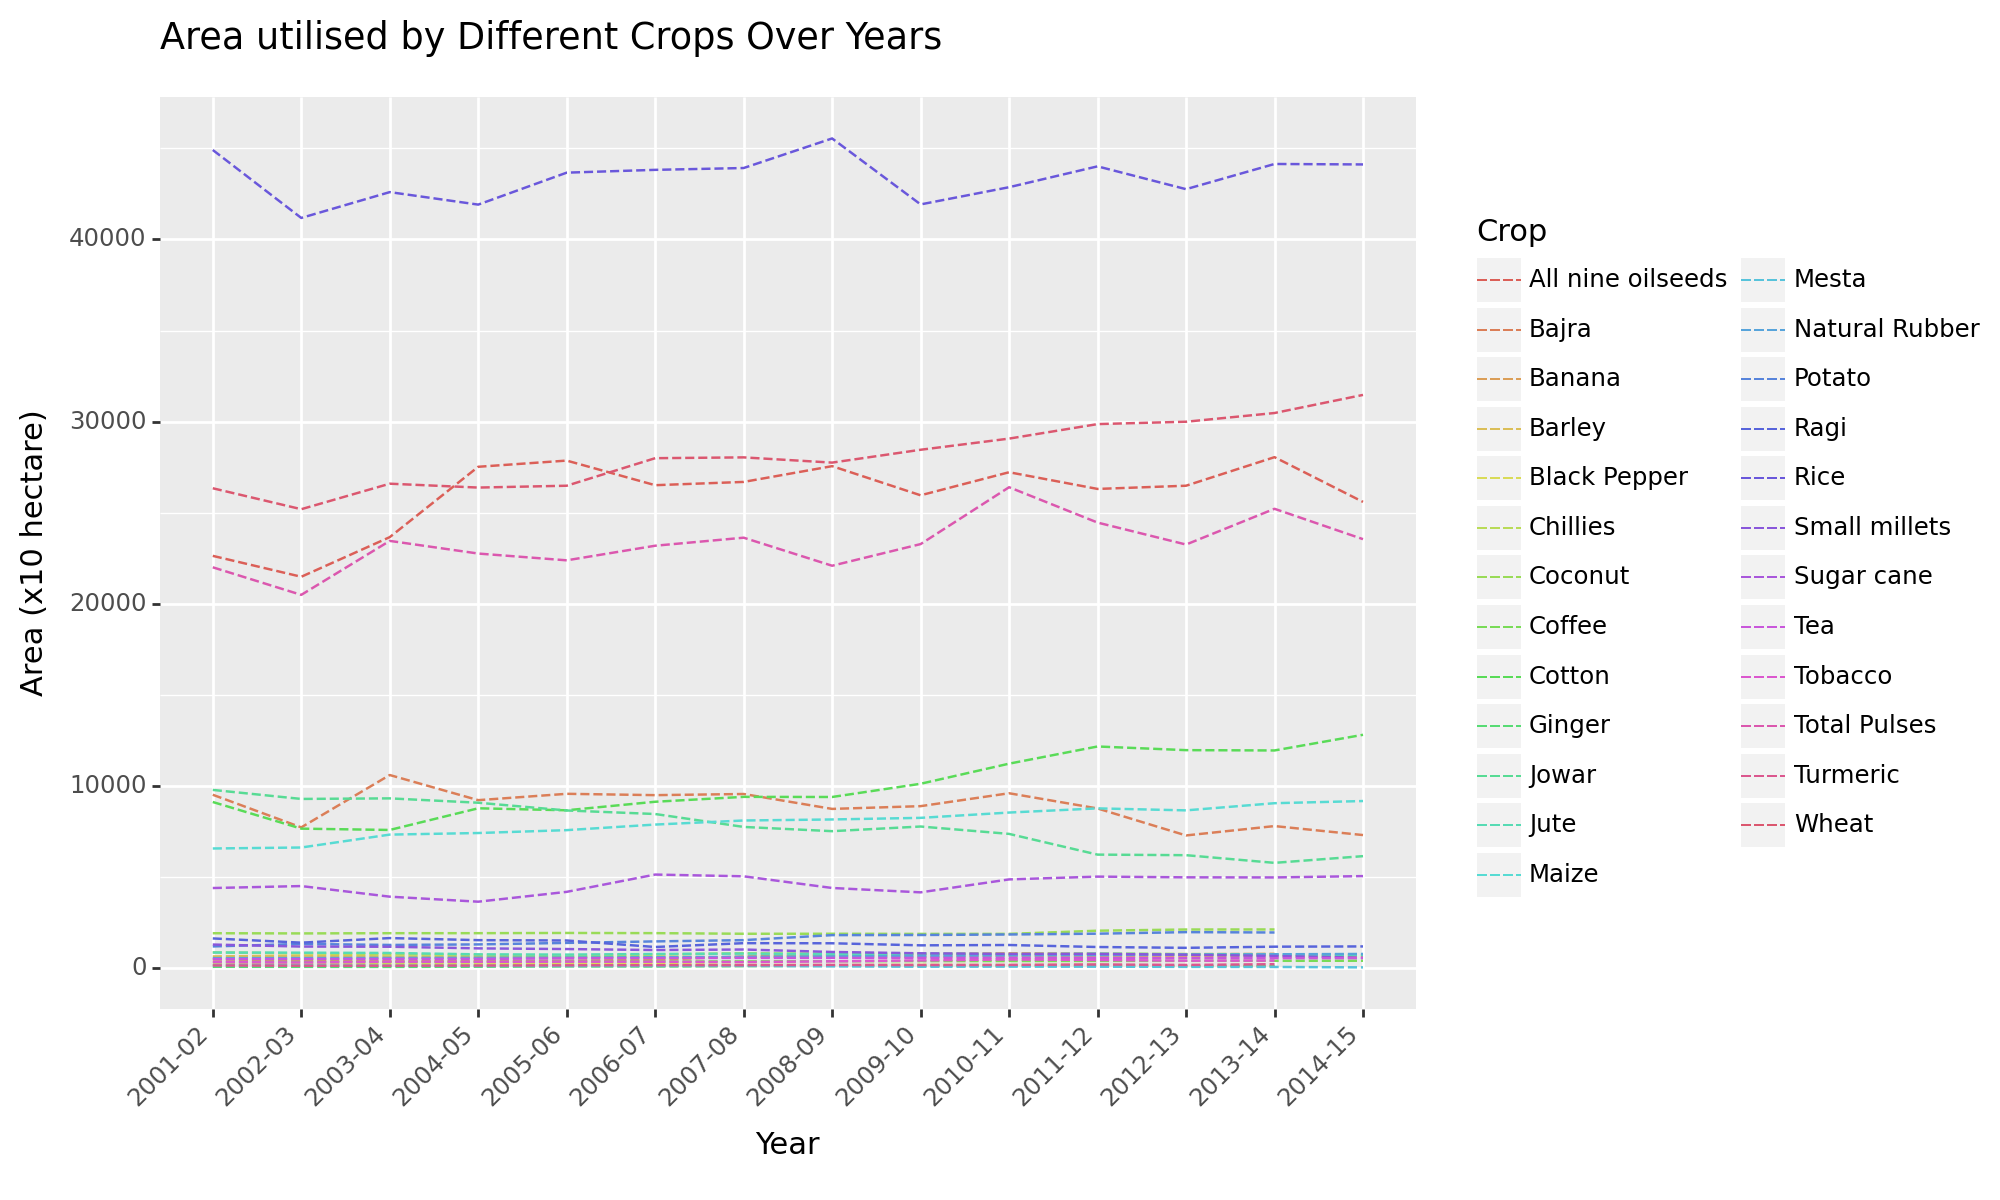

In [724]:
#This plot shows the area used for by Different crops over years
line_plot_all_crops = (
    ggplot(tidy_df) +
    aes(x='Year', y='Area', color='Crop', group='Crop') +
    geom_line(linetype='dashed') +  # Add dashed lines
    labs(y='Area (x10 hectare)', title='Area utilised by Different Crops Over Years') +
    theme(axis_text_x=element_text(angle=45, hjust=1),figure_size=(10, 6))
)

print(line_plot_all_crops)


This plot shows how the land is used for various crops. We can see that rice uses the most area followed by wheat followed by grains and then cash crops. This land distribution can be because of 2 reasons


1.   Demand and Supply: More quantity is grown, therefore they require more area or there is less demand, therefore only little amount is grown
2.   Some crops require less land area to grow. Eg: Tobacco.


---




In [725]:
df_max_crop_area_01_15 = normalized_df_crop_area.copy()
df_max_crop_area_01_15.rename(columns = {"Food grains (cereals) - Rice": "Rice", "Food grains (cereals) - Wheat" : "Wheat", "Food grains (cereals) - Jowar": "Jowar","Food grains (cereals) - Bajra": "Bajra", "Food grains (cereals) - Maize": "Maize", "Food grains (cereals) - Ragi": "Ragi", "Food grains (cereals) - Small millets":"Small millets", "Food grains (cereals) - Barley": "Barley", "Oilseeds - Groundnut": "Groundnut", "Oilseeds - Castorseed": "Castorseed","Oilseeds - Sesamum": "Sesamum", "Oilseeds - Rapeseed and mustard": "Rapseed and mustard", "Oilseeds - Linseed": "Linseed","Oilseeds - All Nine oilseeds (*)": "All nine oilseeds", "Natural Rubber (Tapped area)":"Natural Rubber", "Food grains(pulses) - Gram": "Gram", "Food grains(pulses) - Other Pulses": "Other pulses", "Food grains(pulses) - Total Pulses": "Total Pulses","Food grains(pulses) - Tur": "Tur"    }, inplace = True)
df_max_crop_area_01_15.drop(columns = ['All nine oilseeds','Total Pulses' ], inplace = True)

In [726]:
# Calculating the mean area for each crop across all years
crop_area_means = df_max_crop_area_01_15.drop(columns=['Year']).mean()
top_5_crops = crop_area_means.sort_values(ascending=False).head(5)
top_5_crops = top_5_crops.reset_index()
top_5_crops.columns = ['Crop', 'Average Land Area']

# Sorting the DataFrame by 'Average Land Area' in descending order
top_5_crops_sorted = top_5_crops.sort_values(by='Average Land Area', ascending=False)
crop_order = top_5_crops_sorted['Crop'].tolist()

top_5_crops_sorted['Crop'] = top_5_crops_sorted['Crop'].astype(CategoricalDtype(categories=crop_order, ordered=True))

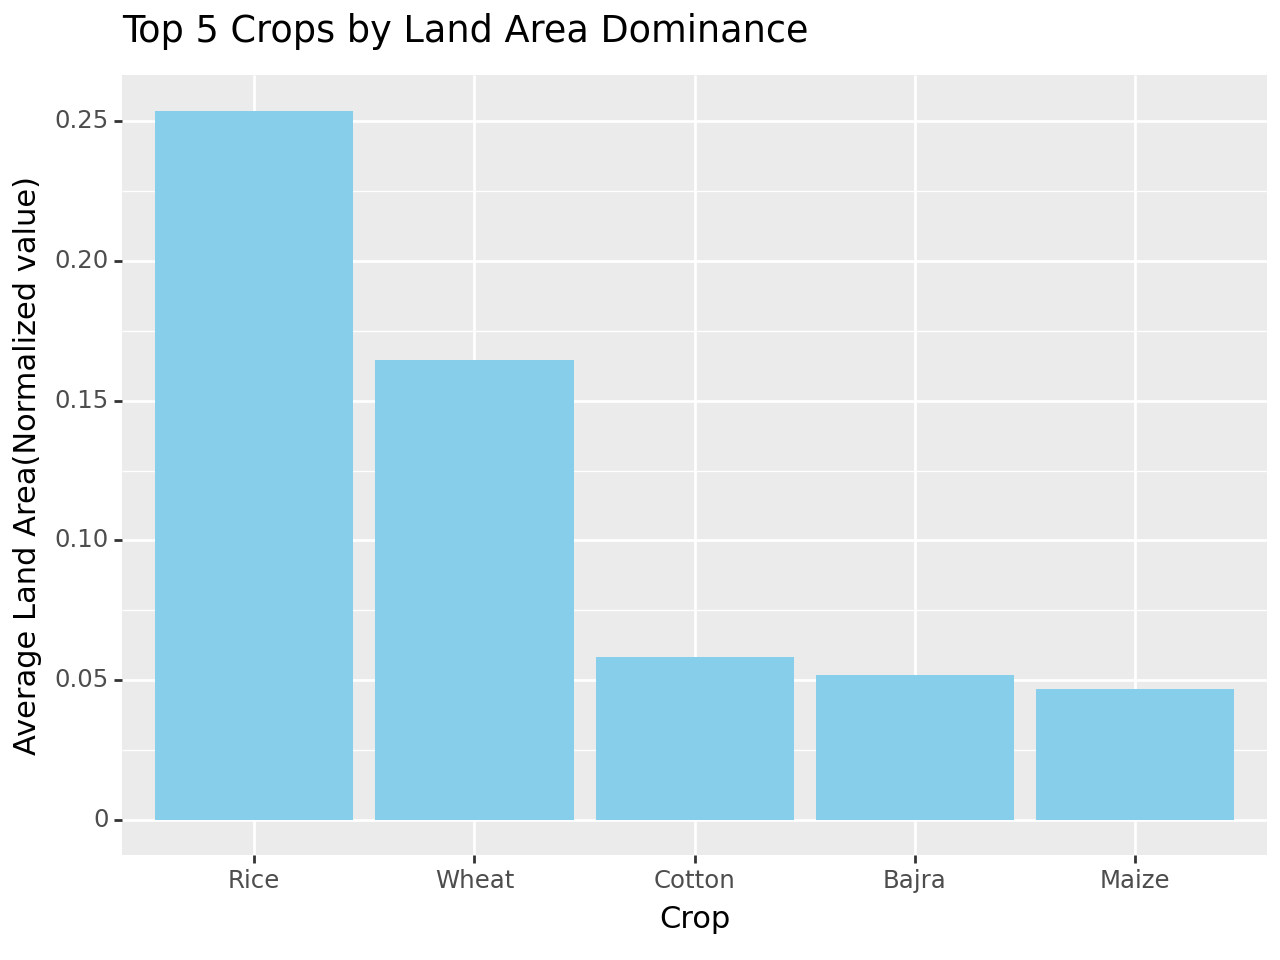

In [727]:
# Plotting the bar graph
bar_top_5_crops = (
    ggplot(top_5_crops_sorted) +
    aes(x='Crop', y='Average Land Area') +
    geom_bar(stat='identity', fill='skyblue') +
    labs(title='Top 5 Crops by Land Area Dominance', x='Crop', y='Average Land Area(Normalized value)')
)


print(bar_top_5_crops)

**Crop Production and Yield**


**Production:**
Production refers to the total quantity of a crop harvested from a specific area of land within a given timeframe. It encompasses all stages of crop cultivation, from planting to harvesting, and represents the output or outcome of agricultural activities. Crop production is measured in terms of weight (e.g., kilograms, metric tons) or volume (e.g., bushels) and serves as a key indicator of agricultural productivity and output.


**Yield:**
Yield, in the context of crop production, refers to the amount of crop harvested per unit area of land. It is a measure of the efficiency and productivity of crop cultivation and is typically expressed as weight or volume per unit area (e.g., kilograms per hectare, bushels per acre). Yield reflects the effectiveness of agronomic practices, soil fertility, crop management, and environmental conditions in maximizing crop output. High yields are desirable as they contribute to increased agricultural productivity, profitability, and food security.


In [728]:
# df_crop_production_01_17.head(2)

In [729]:
# df_crop_production_01_17.columns

In [730]:
crop_production_kilotonnes = df_crop_production_01_17.copy()
crop_production_kilotonnes.drop(columns = ['Cotton (000 Bales)',
       'Jute (000 Bales)', 'Mesta (000 Bales)', 'Tea (Million kgs)',
       'Coffee (000 MT)', 'Natural Rubber (000 MT)', 'Food Grains (Cereals) - Total (000 tonnes)','Food Grains - Total (000 tonnes)'], inplace = True)

crop_production_kilotonnes.rename(columns = {'Food Grains (Cereals) - Rice (000 tonnes)': 'Rice','Food Grains (Cereals) - Jowar (000 tonnes)': 'Jowar',
                                             'Food Grains (Cereals) - Bajra (000 tonnes)':'Bajra', 'Food Grains (Cereals) - Maize (000 tonnes)': 'Maize',
                                             'Food Grains (Cereals) - Ragi (000 tonnes)': 'Ragi','Food Grains (Cereals) - Small Millets (000 tonnes)': 'Small Millets',
                                             'Food Grains (Cereals) - Wheat (000 tonnes)': 'Wheat','Food Grains (Cereals) - Barley (000 tonnes)' : 'Barley',
                                             'Food Grains (Pulses) - Gram (000 tonnes)':'Gram', 'Food Grains (Pulses) - Tur (000 tonnes)':'Tur',
                                             'Food Grains (Pulses) - Other Pulses (000 tonnes)': 'Other Pulses', 'Food Grains (Pulses) - Total (000 tonnes)':'Total pulses',
                                             'Oilseeds - Ground-nuts (000 tonnes)': 'Ground-nuts','Oilseeds - Sesamum (000 tonnes)':'Sesamum',
                                             'Oilseeds - Rapeseed and Mustard (000 tonnes)':'Rapseed and Mustard','Oilseeds - Linseed (000 tonnes)':'Linseed',
                                             'Oilseeds - Castor seed (000 tonnes)':'Castor seed','Total Nine Oilseeds (000 tonnes)':'All oilseeds',
                                             'Banana (000 tonnes)':'Banana','Sugarcane (000 tonnes)':'Sugarcane', 'Tobacco (000 tonnes)':'Tobacco',
                                             'Potatoes (000 tonnes)':'Potatoes', 'Black Pepper (000 tonnes)':'Black Pepper','Chillies (000 tonnes)':'Chillies',
                                             'Ginger (000 tonnes)':'Ginger', 'Coconut (000 tonnes)':'Coconut','Turmeric (000 tonnes)':'Turmeric'}, inplace = True)

In [731]:
crop_production_kilotonnes.isnull().sum()

Year                   0
Rice                   0
Jowar                  0
Bajra                  0
Maize                  0
Ragi                   0
Small Millets          0
Wheat                  1
Barley                 1
Gram                   1
Tur                    0
Other Pulses           0
Total pulses           0
Ground-nuts            0
Sesamum                0
Rapseed and Mustard    1
Linseed                1
Castor seed            0
All oilseeds           0
Banana                 2
Sugarcane              2
Tobacco                3
Potatoes               2
Black Pepper           2
Chillies               2
Ginger                 2
Coconut                2
Turmeric               2
dtype: int64

In [732]:
crop_prod_columns = crop_production_kilotonnes.columns[1:]
crop_production_kilotonnes[crop_prod_columns] = crop_production_kilotonnes[crop_prod_columns].apply(pd.to_numeric, errors='coerce')

In [733]:
df_transposed = crop_production_kilotonnes.set_index('Year').transpose()
df_transposed = df_transposed.reset_index().rename(columns={'index': 'Crop'})
tidy_df = pd.melt(df_transposed, id_vars='Crop', var_name='Year', value_name='Production')

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning:

geom_path: Removed 1 rows containing missing values.



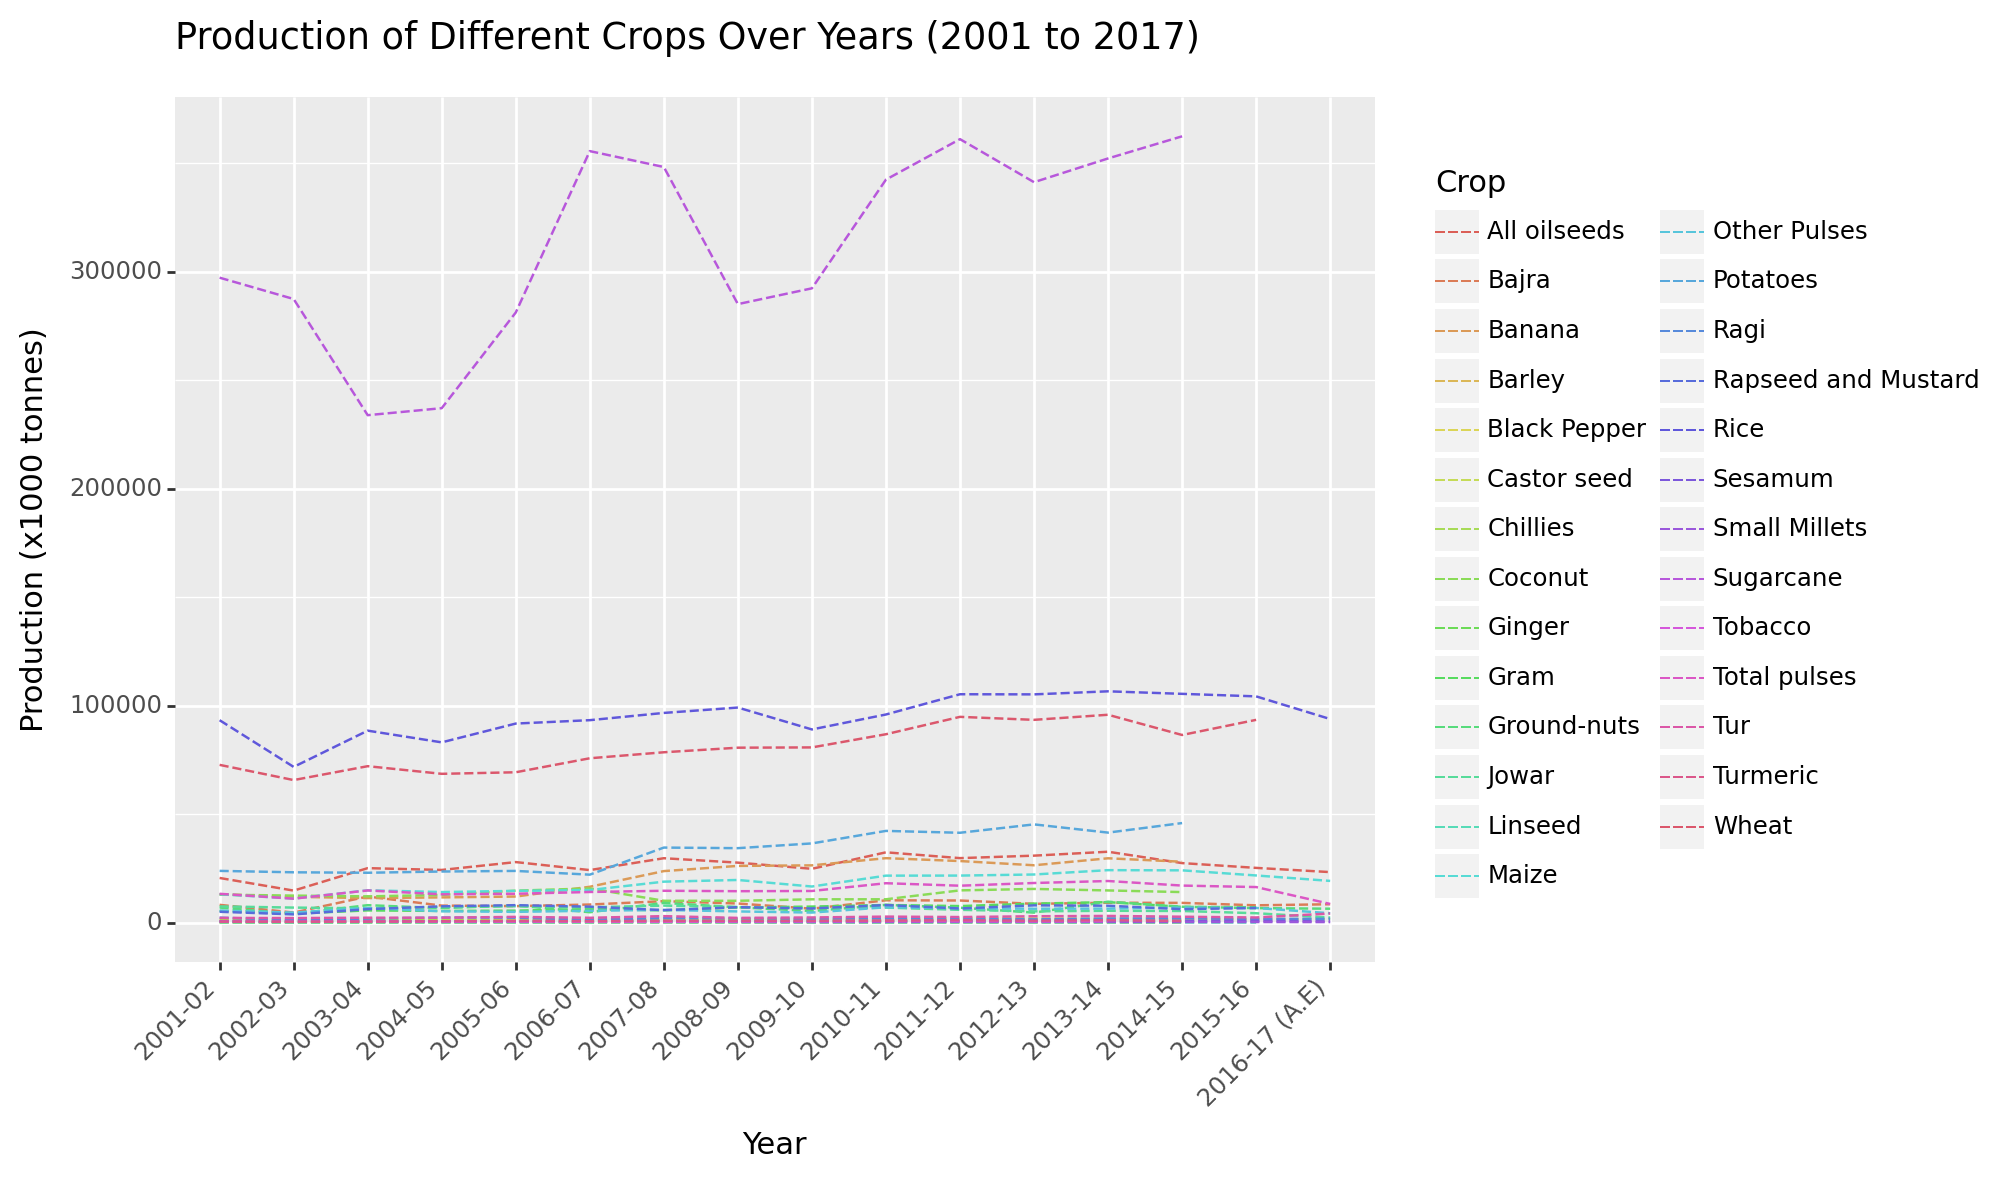

In [734]:
# Creating line plot for each crop
line_plot_all_crops = (
    ggplot(tidy_df) +
    aes(x='Year', y='Production', color='Crop', group='Crop') +
    geom_line(linetype='dashed') +  # Add dashed lines
    labs(y='Production (x1000 tonnes)', title='Production of Different Crops Over Years (2001 to 2017)') +
    theme(axis_text_x=element_text(angle=45, hjust=1),figure_size=(10, 6))
)

print(line_plot_all_crops)


This graph shows production of various crops in kilo tonnes over the 16 years (2001-02 to 2016-17).



*   We can see that production of sugarcane is considerabily higher than any other crop. It is then followed by rice and wheat.
*   India is one of the world's leading producer in sugarcane, wheat and rice. India comes second in terms of sugarcane production only after Brazil, and second in rice and wheat just after China.



*   While rice and wheat are primarily used for consumption, (some amount is exported as well), sugarane is primarily used for sale purposes( Cash Crop)
*   India is one of leading exporters for rice and sugar ( made from sugarcane).











In [735]:
# Calculate the mean area for each crop across all years
crop_prod_means = crop_production_kilotonnes.drop(columns=['Year']).mean()
top_5_crops = crop_prod_means.sort_values(ascending=False).head(5)
top_5_crops = top_5_crops.reset_index()
top_5_crops.columns = ['Crop', 'Average Production']
top_5_crops_sorted = top_5_crops.sort_values(by='Average Production', ascending=False)
crop_order = top_5_crops_sorted['Crop'].tolist()
top_5_crops_sorted['Crop'] = top_5_crops_sorted['Crop'].astype(CategoricalDtype(categories=crop_order, ordered=True))

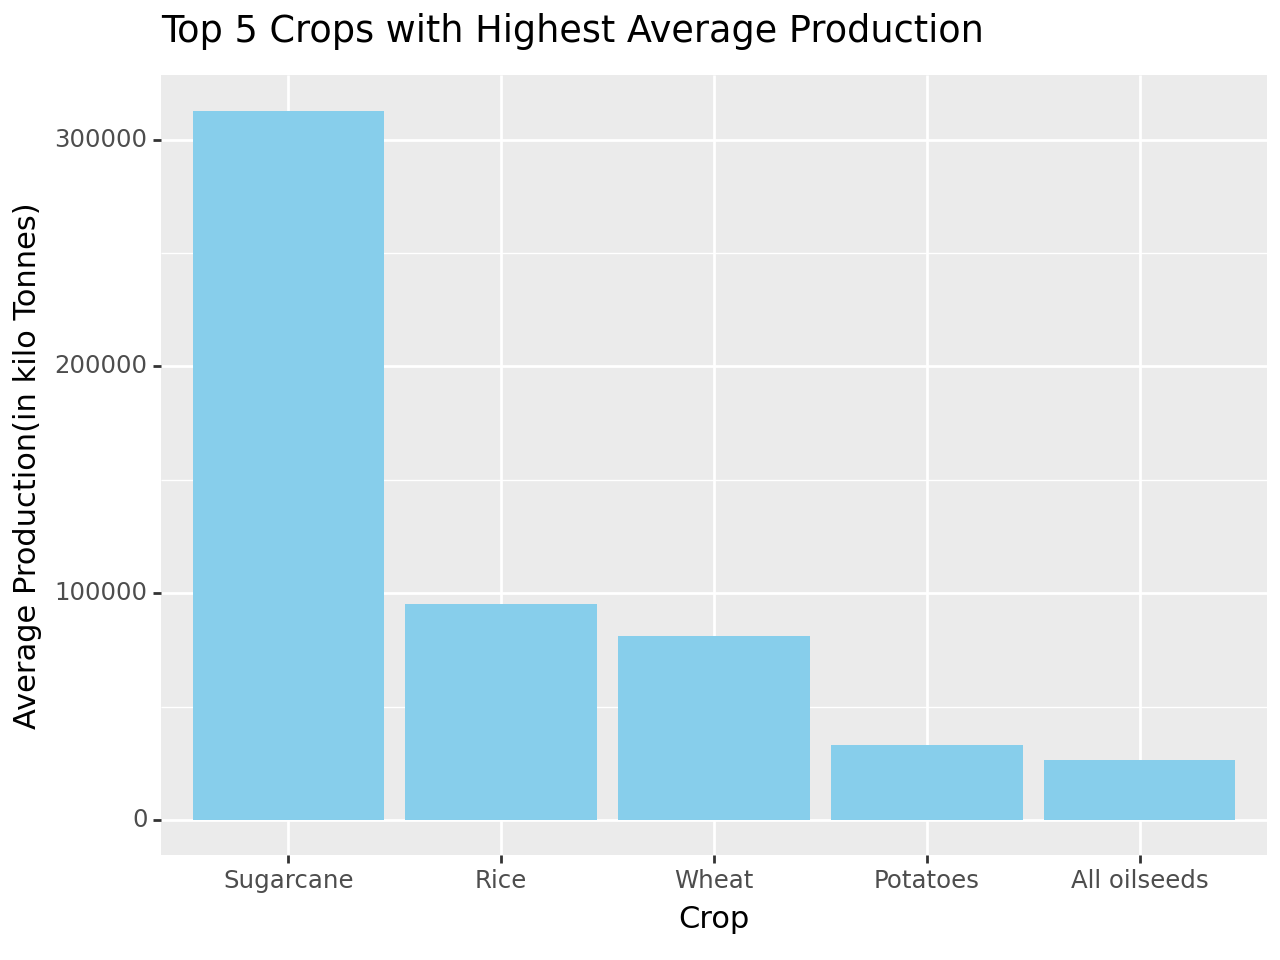

In [736]:
# Plotting the bar graph
bar_top_5_crops = (
    ggplot(top_5_crops_sorted) +
    aes(x='Crop', y='Average Production') +
    geom_bar(stat='identity', fill='skyblue') +
    labs(title='Top 5 Crops with Highest Average Production', x='Crop', y='Average Production(in kilo Tonnes)')
)

# Display the plot
print(bar_top_5_crops)

In [737]:
# df_crop_avg_yield_01_15.head(2)

In [738]:
# df_crop_avg_yield_01_15.columns

In [739]:
df_crop_avg_yield_01_15.rename(columns = {"Foodgrains(cereals) - Rice": "Rice", "Foodgrains(cereals) - Wheat" : "Wheat",
                                          "Foodgrains(cereals) - Jowar": "Jowar","Foodgrains(cereals) - Bajra": "Bajra",
                                          "Foodgrains(cereals) - Maize": "Maize", "Foodgrains(cereals) - Ragi": "Ragi",
                                          "Foodgrains(cereals) - Small millets":"Small millets", "Foodgrains(cereals) - Barley": "Barley",
                                          "Foodgrains(pulses) - Tur":"Tur", "Foodgrains(pulses) - Gram":"Gram",
                                          "Foodgrains(pulses) - Other pulses":"Other pulses", "Foodgrains(pulses) - Total pulses":"Total pulses",
                                          "Oilseeds - Groundnuts": "Groundnut", "Oilseeds - Castorseed": "Castorseed","Oilseeds - Sesamum": "Sesamum",
                                          "Oilseeds - Rapeseed and mustard": "Rapseed and mustard", "Oilseeds - Linseed": "Linseed",
                                          "Oilseeds - Total oilseeds": "Total oilseeds","Food grains(pulses) - Tur": "Tur" }, inplace = True)

df_crop_avg_yield_01_15.drop(columns = ['Total Food - grains', 'Foodgrains(cereals) - Total cereals', 'Potatoes (MT/ha)', 'Banana (MT/ha)' ], inplace = True)

In [740]:
crop_prod_columns = df_crop_avg_yield_01_15.columns[1:]
df_crop_avg_yield_01_15[crop_prod_columns] = df_crop_avg_yield_01_15[crop_prod_columns].apply(pd.to_numeric, errors='coerce')

In [741]:
df_transposed = df_crop_avg_yield_01_15.set_index('Year').transpose()
df_transposed = df_transposed.reset_index().rename(columns={'index': 'Crop'})
tidy_df = pd.melt(df_transposed, id_vars='Crop', var_name='Year', value_name='Yield')

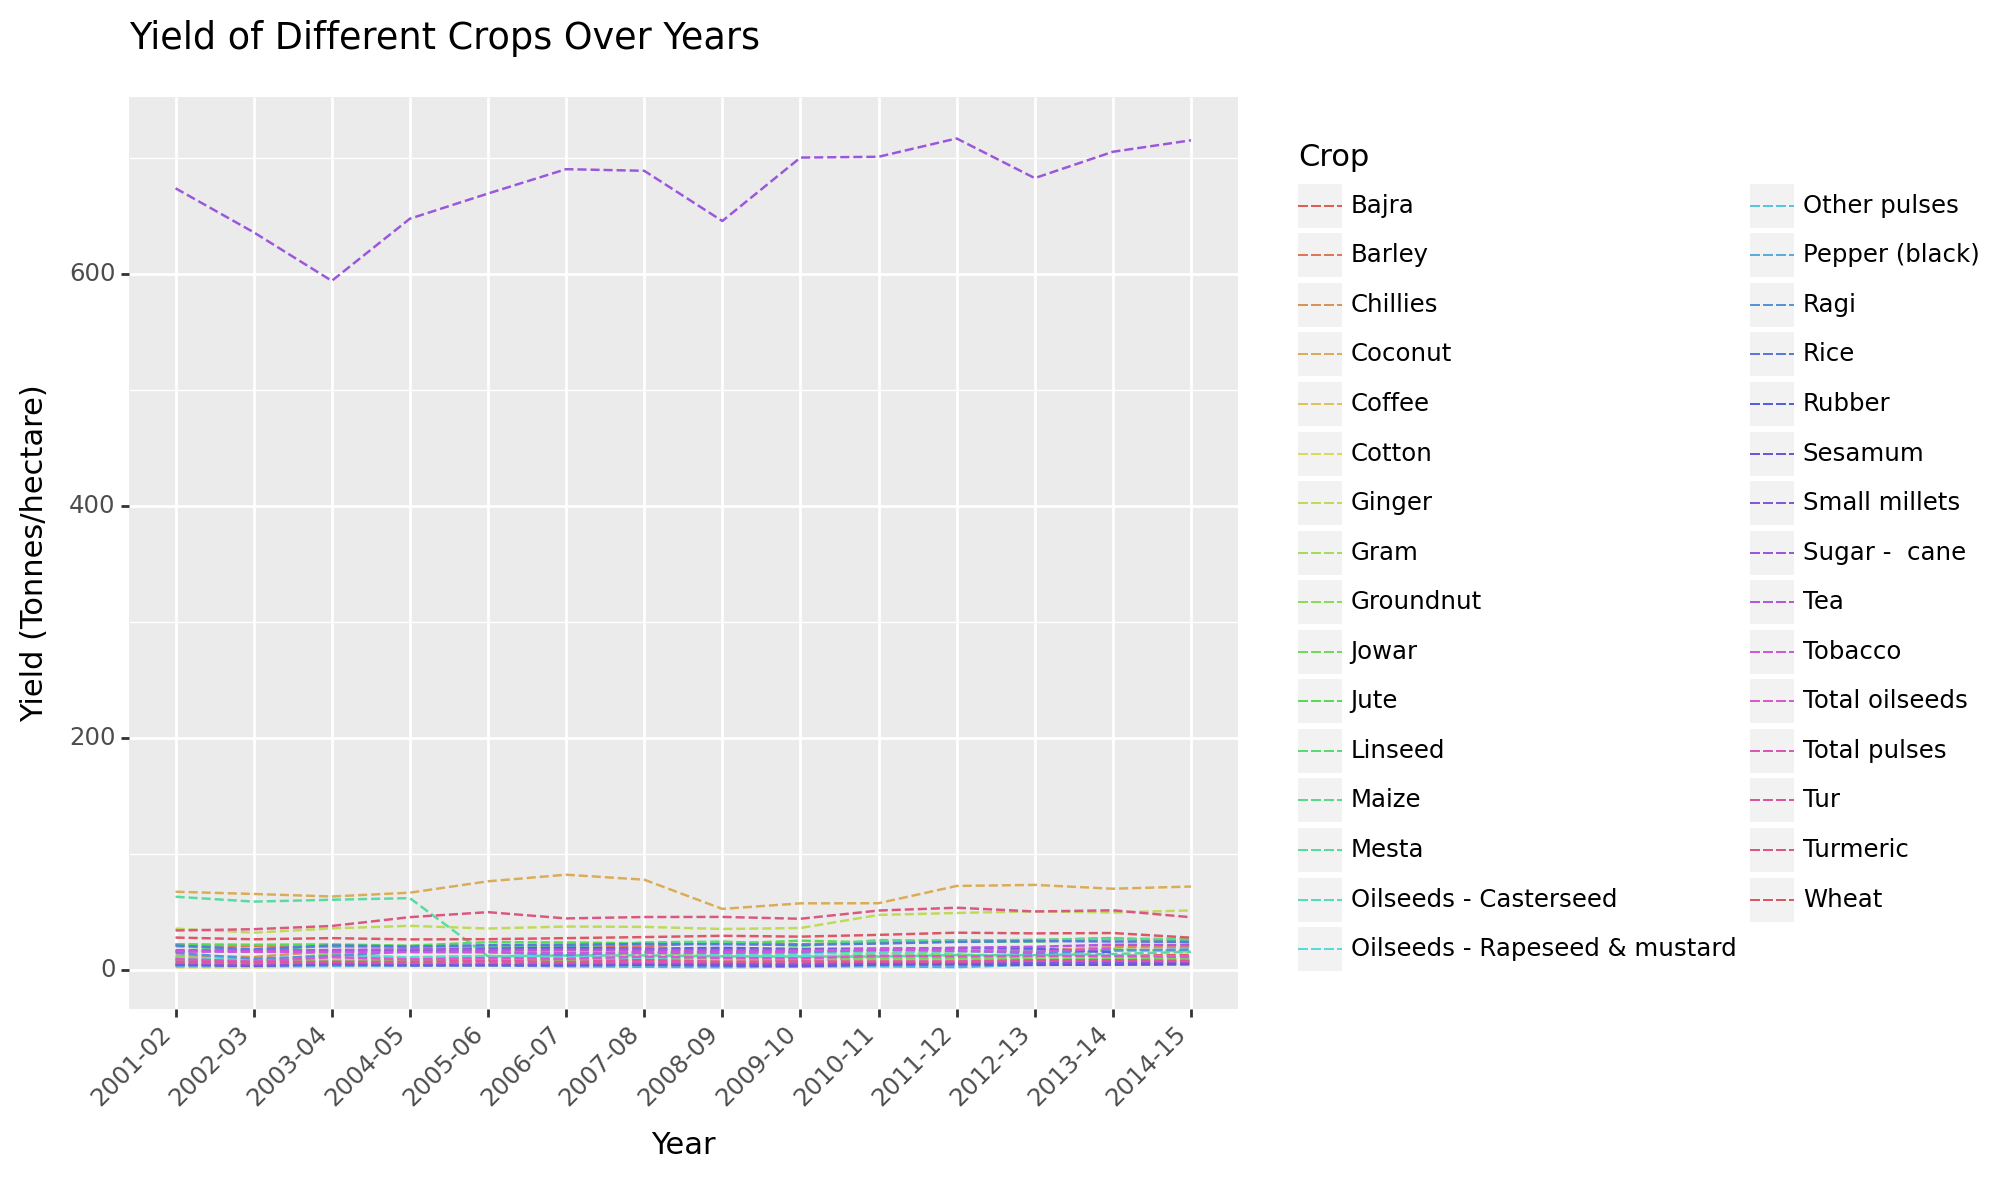

In [742]:
# Create line plot for each crop
line_plot_all_crops = (
    ggplot(tidy_df) +
    aes(x='Year', y='Yield', color='Crop', group='Crop') +
    geom_line(linetype='dashed') +  # Add dashed lines
    labs(y='Yield (Tonnes/hectare)', title='Yield of Different Crops Over Years') +
    theme(axis_text_x=element_text(angle=45, hjust=1),figure_size=(10, 6))
)

print(line_plot_all_crops)


We can see here that yield of sugar cane is much higher than the yield of other crops .

In [743]:
df_crop_avg_yield_01_15.columns

Index(['Year', 'Rice', 'Wheat', 'Jowar', 'Bajra', 'Maize', 'Ragi',
       'Small millets', 'Barley', 'Tur', 'Gram', 'Other pulses',
       'Total pulses', 'Groundnut', 'Sesamum', 'Oilseeds - Rapeseed & mustard',
       'Linseed', 'Oilseeds - Casterseed', 'Total oilseeds', 'Cotton', 'Jute',
       'Mesta', 'Tea', 'Coffee', 'Rubber', 'Sugar -  cane', 'Tobacco',
       'Pepper (black)', 'Chillies', 'Ginger', 'Coconut', 'Turmeric'],
      dtype='object')

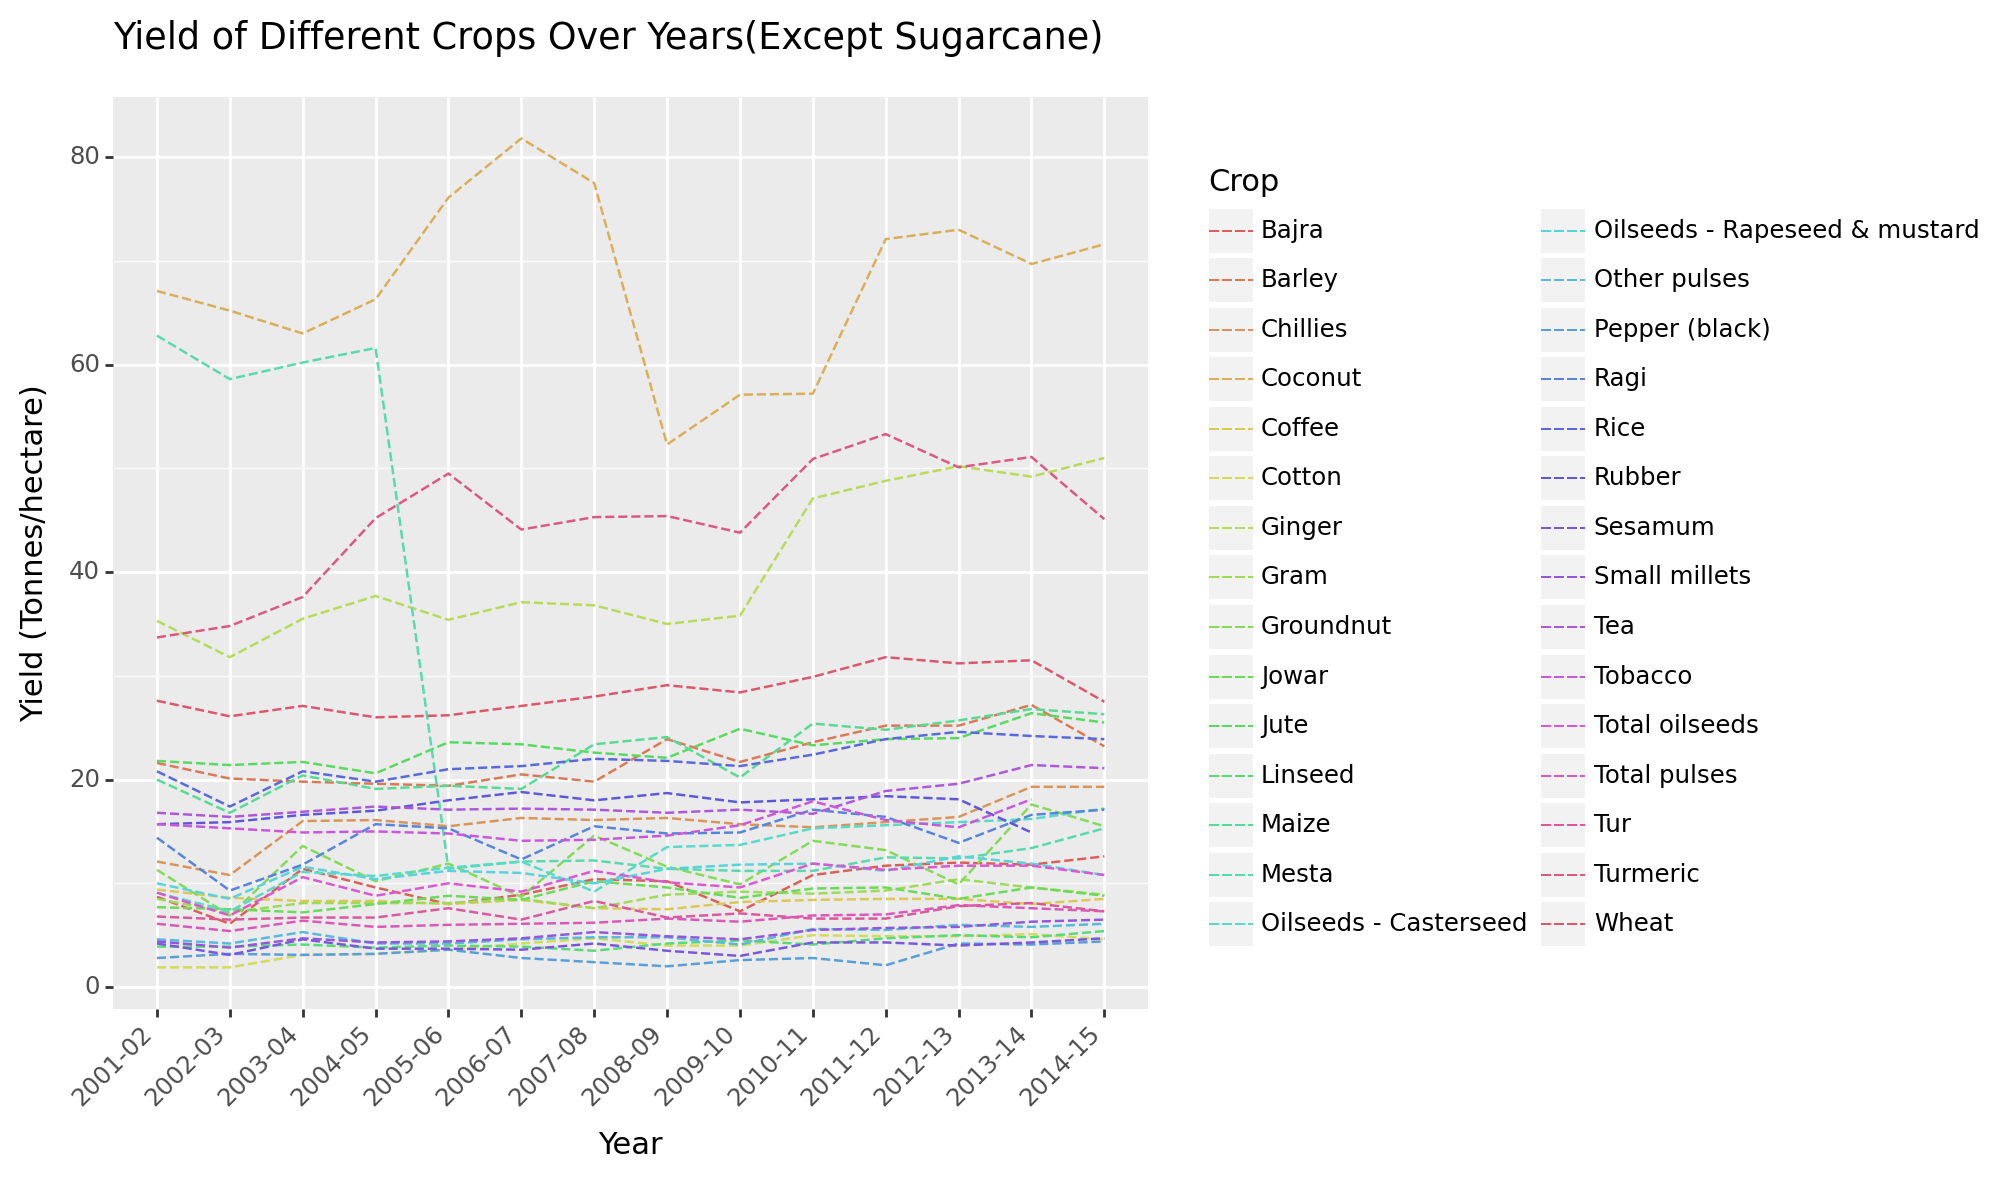

<Figure Size: (1000 x 600)>

In [744]:
df_crop_avg_yield_01_15_temp = df_crop_avg_yield_01_15.copy()
df_crop_avg_yield_01_15_temp.drop(columns = ['Sugar -  cane'], inplace = True)
df_transposed = df_crop_avg_yield_01_15_temp.set_index('Year').transpose()

# Reset index to convert the crop names from index to a column
df_transposed = df_transposed.reset_index().rename(columns={'index': 'Crop'})

# Melt the DataFrame to long format
tidy_df = pd.melt(df_transposed, id_vars='Crop', var_name='Year', value_name='Yield')

# Create line plot for each crop
line_plot_all_crops = (
    ggplot(tidy_df) +
    aes(x='Year', y='Yield', color='Crop', group='Crop') +
    geom_line(linetype='dashed') +  # Add dashed lines
    labs(y='Yield (Tonnes/hectare)', title='Yield of Different Crops Over Years(Except Sugarcane)') +
    theme(axis_text_x=element_text(angle=45, hjust=1),figure_size=(10, 6))
)

(line_plot_all_crops)




1.  We can see that yield of Mesta highly dropped after 2005. Since it did not increase in next years, a possible reason of this drop can be a soil degradation, poor agronomical practices like: excessive use of chemicals or not doing crop rotation.

2.  The overall yield of coconut is high but a lot of fluctuations can be seen.The potential reasons can be :


  *   Coconut cultivation is highly sensitive to weather conditions, including rainfall, temperature, humidity, and wind patterns. Fluctuations in weather patterns,can have a significant impact on coconut yield.
  *   Pest and disease infestations.



3.   There is a good increase in yield of wheat and ginger.
4.    For other crops, there was a slight increase in yield over the years









In [745]:
crop_yield_means = df_crop_avg_yield_01_15.drop(columns=['Year']).mean() # Calculate the mean yield for each crop across all years
top_5_crops = crop_yield_means.sort_values(ascending=False).head(5)  # Sort the crops based on their mean yield in descending order

In [746]:
top_5_crops = top_5_crops.reset_index()
top_5_crops.columns = ['Crop', 'Average Yield']
top_5_crops_sorted = top_5_crops.sort_values(by='Average Yield', ascending=False) # Sort the DataFrame by 'Average Yield' in descending order
crop_order = top_5_crops_sorted['Crop'].tolist()
top_5_crops_sorted['Crop'] = top_5_crops_sorted['Crop'].astype(CategoricalDtype(categories=crop_order, ordered=True))

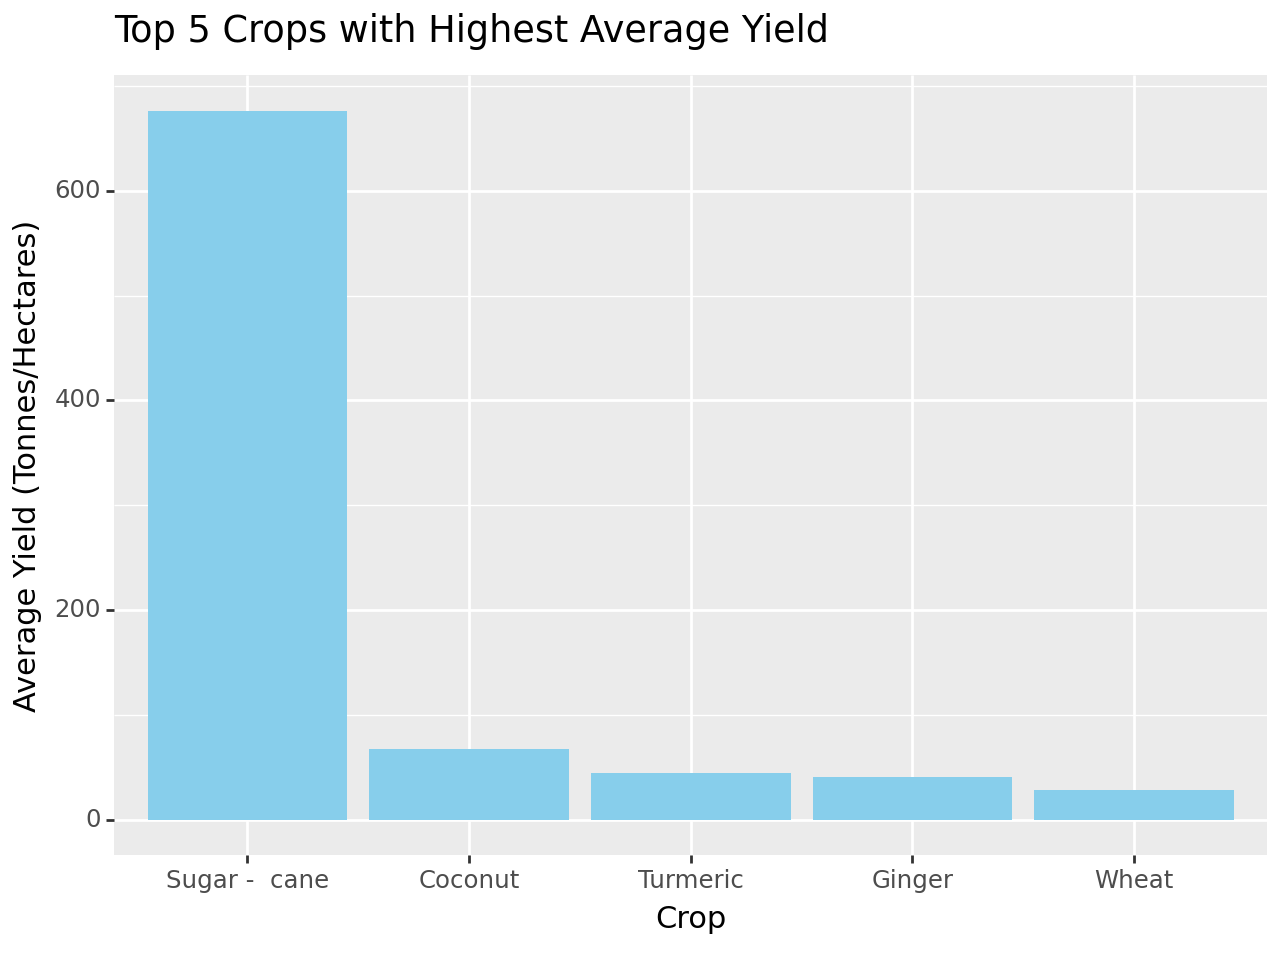

In [747]:
# Plotting the bar graph showing average yield
bar_top_5_crops = (
    ggplot(top_5_crops_sorted) +
    aes(x='Crop', y='Average Yield') +
    geom_bar(stat='identity', fill='skyblue') +
    labs(title='Top 5 Crops with Highest Average Yield', x='Crop', y='Average Yield (Tonnes/Hectares)')
)

print(bar_top_5_crops)

In [748]:
# df_crop_index_area_07_16.columns

In [749]:
df_crop_index_area_07_16.drop(columns = ['Weights', 'Area-T.E. (2007-08)', 'Area-2007-08','Area-2008-09','Area-2009-10','Area-2010-11',
                                         'Area-2011-12','Area-2012-13', 'Area-2013-14','Area-2014-15', 'Area-2015-16*' ], inplace = True)

In [750]:
df_crop_index_area_07_16.columns = df_crop_index_area_07_16.columns.str.replace('Index-', '')

In [751]:
# df_crop_index_production_07_16.columns

In [752]:
df_crop_index_production_07_16.drop(columns = ['Weights', 'Production - T.E. (2007-08)', 'Production - 2007-08','Production - 2008-09','Production - 2009-10','Production - 2010-11',
                                         'Production - 2011-12','Production - 2012-13', 'Production - 2013-14','Production - 2014-15', 'Production - 2015-16*' ], inplace = True)

In [753]:
df_crop_index_production_07_16.columns = df_crop_index_production_07_16.columns.str.replace('Index - ', '')

In [754]:
# df_crop_index_yield_07_16.columns

In [755]:
df_crop_index_yield_07_16.drop(columns = ['Weights', 'Yield - T.E. (2007-08)', 'Yield - 2007-08','Yield - 2008-09','Yield - 2009-10','Yield - 2010-11',
                                         'Yield - 2011-12','Yield - 2012-13', 'Yield - 2013-14','Yield - 2014-15', 'Yield - 2015-16*' ], inplace = True)

df_crop_index_yield_07_16.columns = df_crop_index_yield_07_16.columns.str.replace('Index - ', '')

In [756]:
# Reshape the data for each DataFrame
df_yield_long = pd.melt(df_crop_index_yield_07_16, id_vars=['Crop'], var_name='Year', value_name='Yield')
df_area_long = pd.melt(df_crop_index_area_07_16, id_vars=['Crop'], var_name='Year', value_name='Area')
df_production_long = pd.melt(df_crop_index_production_07_16, id_vars=['Crop'], var_name='Year', value_name='Production')


In [757]:
df_combined = pd.concat([df_yield_long, df_area_long['Area'], df_production_long['Production']], axis=1)
df_combined.head(2)

Crop     Year   Yield    Area  Production
0   Rice  2007-08  102.63  100.27      102.91
1  Wheat  2007-08  103.35  101.94      105.35

In [892]:
df_crop_case_study = df_combined[df_combined['Crop'].isin(['Rice', 'Wheat', 'Sugarcane'])]

In [758]:
def plot_crop(crop_data):
    '''Plots the index value of production, yield and area for each crop.'''
    return (
        ggplot(crop_data) +
        geom_point(aes(x='Year', y='Yield'), color='blue', size=2) +
        geom_point(aes(x='Year', y='Area'), color='green', size=2) +
        geom_point(aes(x='Year', y='Production'), color='red', size=2) +
        geom_hline(yintercept=100, linetype='solid', color='black') +
        geom_line(aes(x='Year', y='Yield', group='Crop'), linetype='dashed', color='blue', size=1) +
        geom_line(aes(x='Year', y='Area', group='Crop'), linetype='dashed', color='green', size=1) +
        geom_line(aes(x='Year', y='Production', group='Crop'), linetype='dashed', color='red', size=1) +
        labs(x='Year', y='Index Value') +
        theme_minimal() +
        theme(axis_text_x=element_text(angle=90),
              axis_title_x=element_blank(),
              axis_title_y=element_text(margin={'r': 10}),
              axis_text=element_text(size=8)) +
        ggtitle(crop_data['Crop'].iloc[0])
    )


# Create plots for each crop
plots = [plot_crop(df_combined[df_combined['Crop'] == crop]) for crop in df_combined['Crop'].unique()]

print(plots[-1])
for plot in plots[0:]:
    print(plot)



Output hidden; open in https://colab.research.google.com to view.

The blue line shows the yield,
the gren one shoes the Area used and
the red line shows the production

In [894]:
`def plot_crop(crop_data, figsize):
    crop_data_filled = crop_data.fillna(100)
    return (
        ggplot(crop_data_filled) +
        geom_point(aes(x='Year', y='Yield'), color='blue', size=2) +
        geom_point(aes(x='Year', y='Area'), color='green', size=2) +
        geom_point(aes(x='Year', y='Production'), color='red', size=2) +
        geom_hline(yintercept=100, linetype='solid', color='black') +
        geom_line(aes(x='Year', y='Yield', group='Crop'), linetype='dashed', color='blue', size=1) +
        geom_line(aes(x='Year', y='Area', group='Crop'), linetype='dashed', color='green', size=1) +
        geom_line(aes(x='Year', y='Production', group='Crop'), linetype='dashed', color='red', size=1) +
        labs(x='Year', y='Index Value') +
        theme(axis_text_x=element_text(angle=45),
              axis_title_y=element_text(margin={'r': 10}),
              axis_text=element_text(size=12),
              figure_size=figsize,  # Set the plot size here
              plot_title=element_text(size=8, weight='bold', color='black'))+
        facet_wrap('~Crop', scales='free_y', ncol=7, drop=True)
    )

# Display the combined plot
big_plot = plot_crop(df_combined, (20,20))
print(big_plot)


Output hidden; open in https://colab.research.google.com to view.

The blue line shows the yield,
the gren one shows the Area used and
the red line shows the production

Observations:


*   The overall yield and production ahs increased for most of the crops through the years but there are crops in which a decrase is shown like: jowar, sunflower.
*   While most of the crops show erratic behaviour for production level there are some crops which show monotonic behaviour (like onions, tea).





In [760]:
df_crop_price_index.head(2)

Crop  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
0   Rice    100.0    101.0     99.0    105.0    112.0    121.0    117.0   
1  Wheat    100.0    101.0    112.0    115.0    117.0    127.0    120.0   

   2011-12  
0    110.0  
1    108.0

In [761]:
df_crop_price_index.dtypes

Crop        object
2004-05    float64
2005-06    float64
2006-07    float64
2007-08    float64
2008-09    float64
2009-10    float64
2010-11    float64
2011-12    float64
dtype: object

In [762]:
df_prices_long = pd.melt(df_crop_index_area_07_16, id_vars=['Crop'], var_name='Year', value_name='Price')
df_prices_long['Year'] = pd.Categorical(df_prices_long['Year'], categories=df_prices_long['Year'].unique())


In [763]:
# df_prices_long.head()

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning:

geom_point : Removed 3 rows containing missing values.



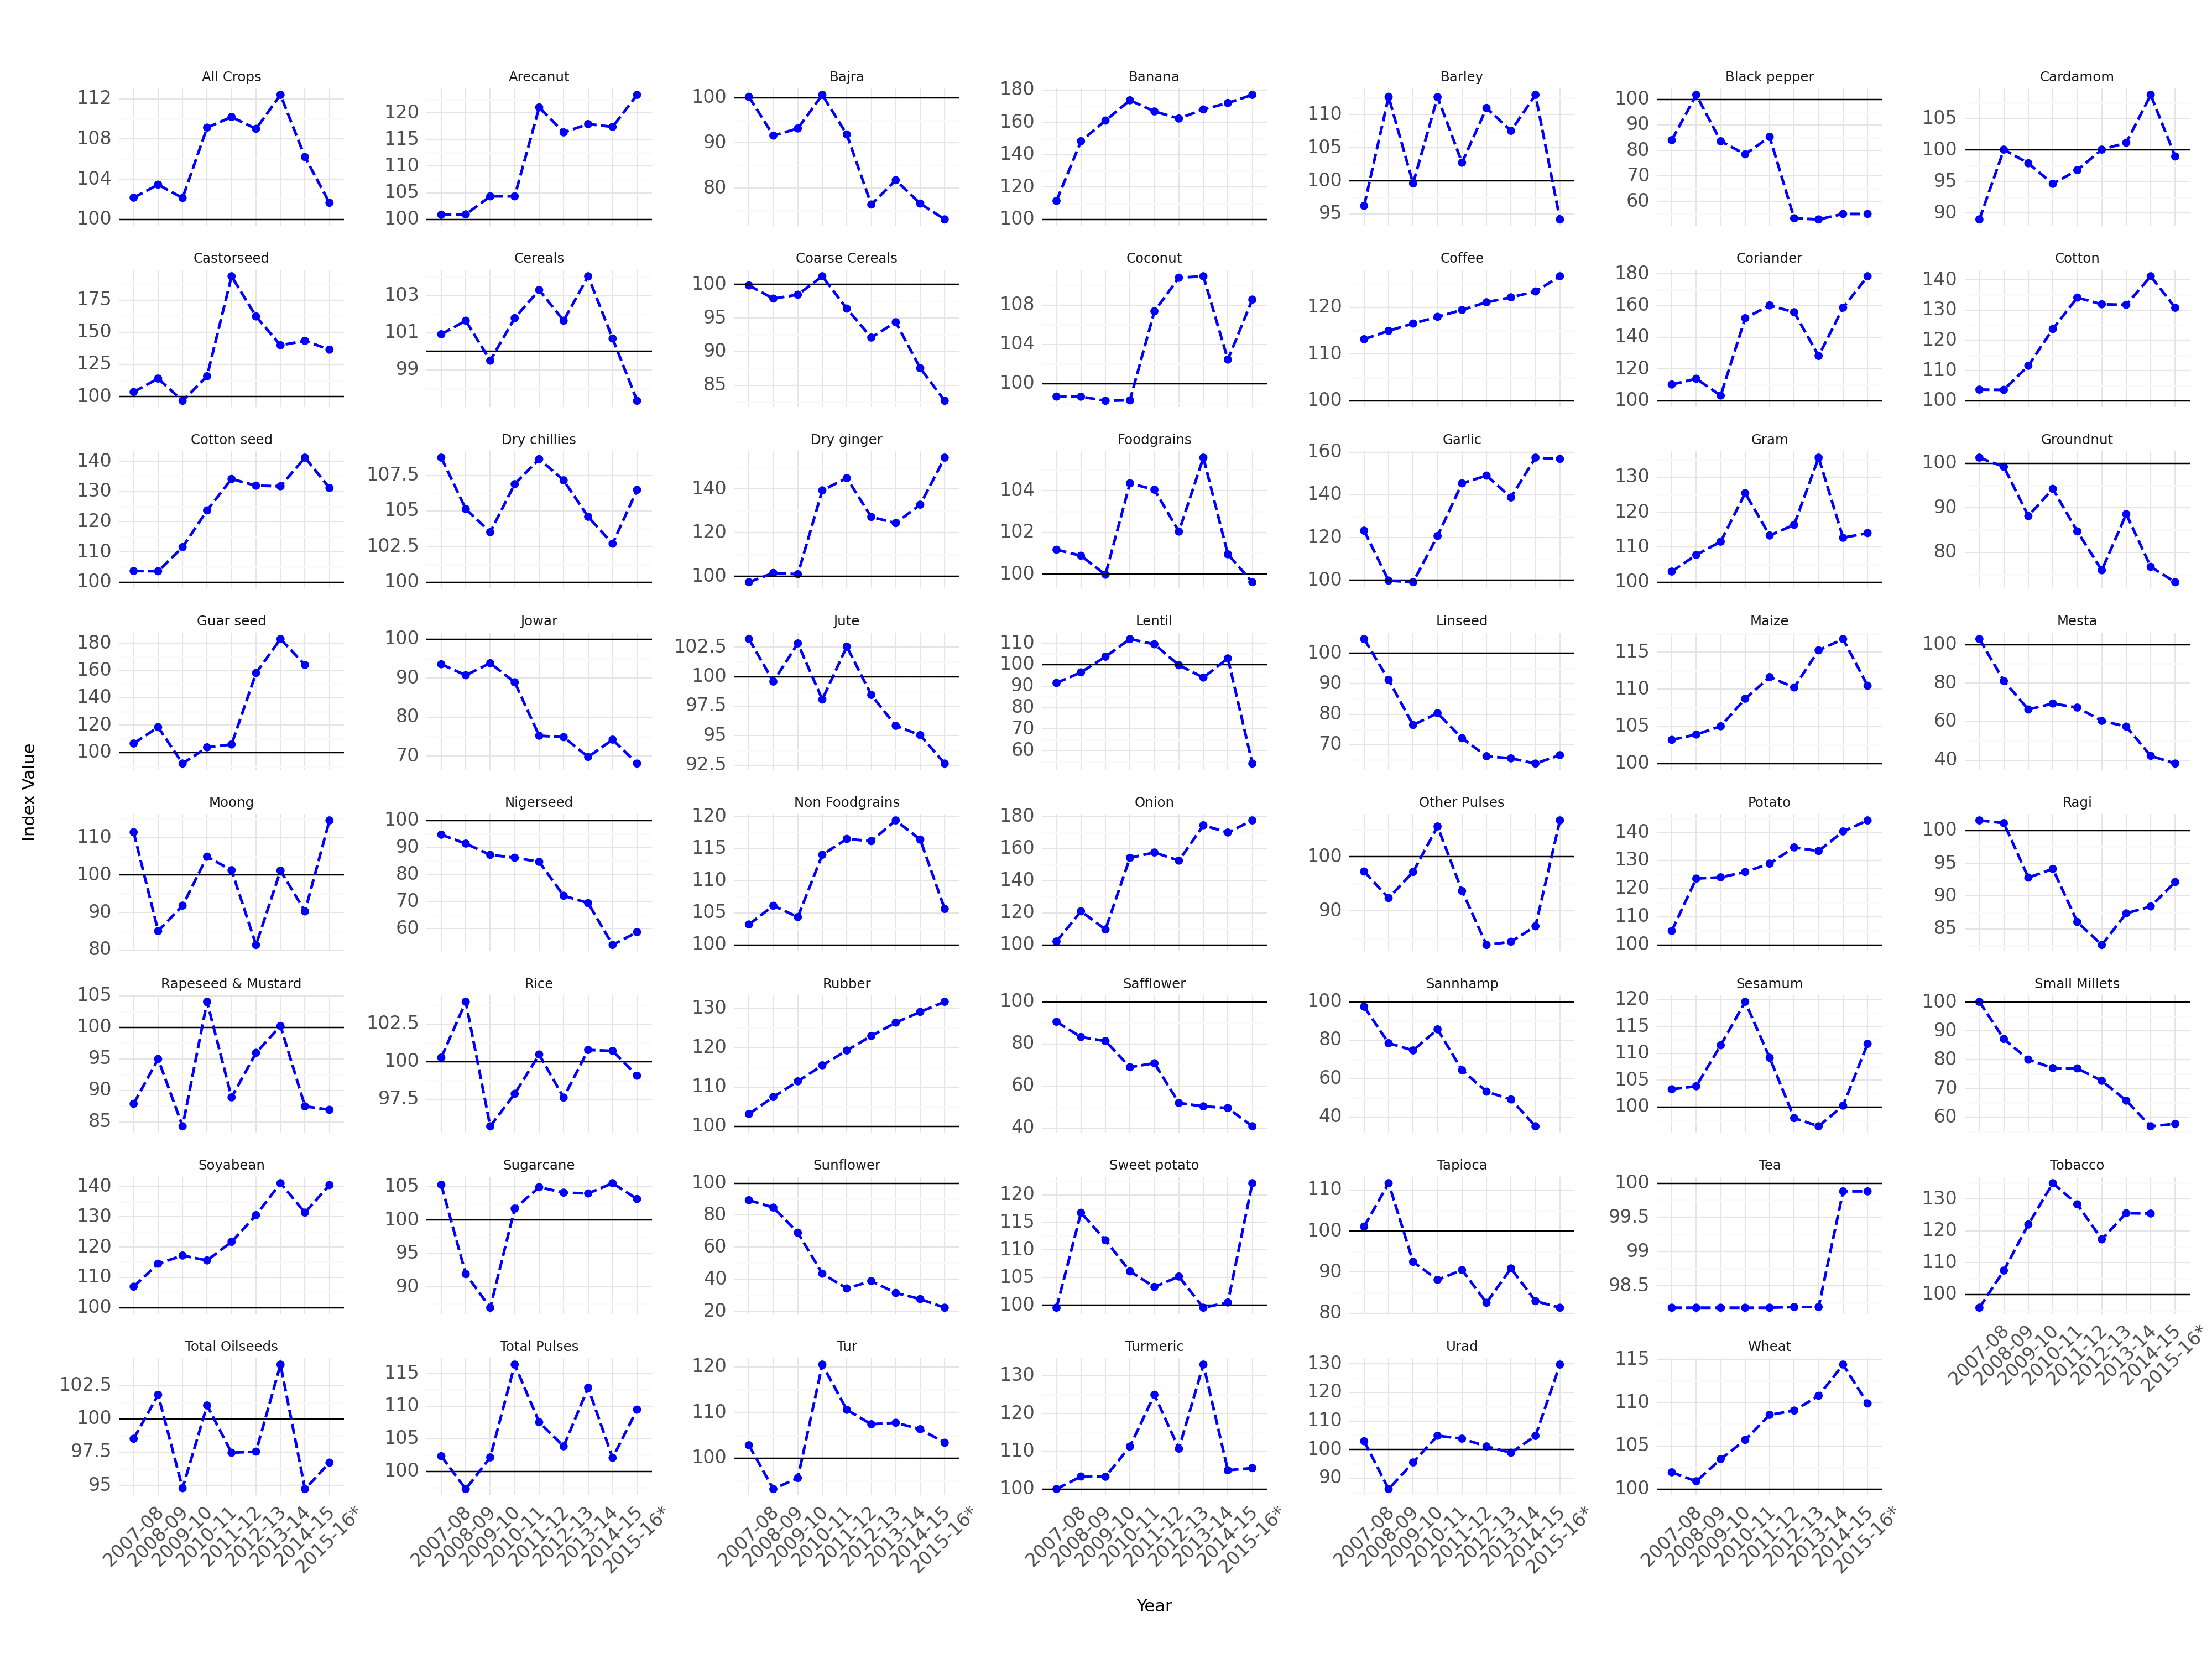

In [764]:
def plot_prices(crop_data):
    '''Shows the annual wholesale price index for different crops over the years.'''
    # crop_data_filled = crop_data.fillna(100)
    return (
        ggplot(crop_data) +
        geom_point(aes(x='Year', y='Price'), color='blue', size=2) +
        geom_hline(yintercept=100, linetype='solid', color='black') +
        geom_line(aes(x='Year', y='Price', group='Crop'), linetype='dashed', color='blue', size=1) +
        labs(x='Year', y='Index Value') +
        theme_minimal() +
        theme(axis_text_x=element_text(angle=45),
              axis_title_y=element_text(margin={'r': 10}),
              axis_text=element_text(size=12),
              figure_size=(20, 15),
              plot_title=element_text(size=8, weight='bold', color='black'))+
        facet_wrap('~Crop', scales='free_y', ncol=7, drop=True)
    )

# Display the combined plot
big_plot = plot_prices(df_prices_long)
print(big_plot)


In [765]:
#reading input files
df_st_cost_production_major_5_2008_09 = pd.read_csv('/content/drive/MyDrive/data_vis/crop/state/Cost Estimates of some Principal Crops in Five Major Producing States During 2008-09.csv')
df_st_cost_production_major_5_2008_14 = pd.read_csv('/content/drive/MyDrive/data_vis/crop/state/State UT-wise Cost Estimate of Some Principal Crops in Five Major Producing States from 2008-09 to 2013-14.csv')
df_st_land_utilisation = pd.read_csv('/content/drive/MyDrive/data_vis/crop/state/State UT-wise Pattern of Land Utilisation from 2003-04 to 2013-14.csv')
df_st_crop_production_09_16 = pd.read_csv('/content/drive/MyDrive/data_vis/crop/state/State UT-wise Production of Principal Crops from 2009-10 to 2015-16.csv')
df_st_avg_yield_09_16 = pd.read_csv('/content/drive/MyDrive/data_vis/crop/state/StateUT-wise Average Yield of Principal Crops from 2009-10 to 2015-16.csv')

# **Case Study of 3 Crops: Wheat, rice and Sugarcane**

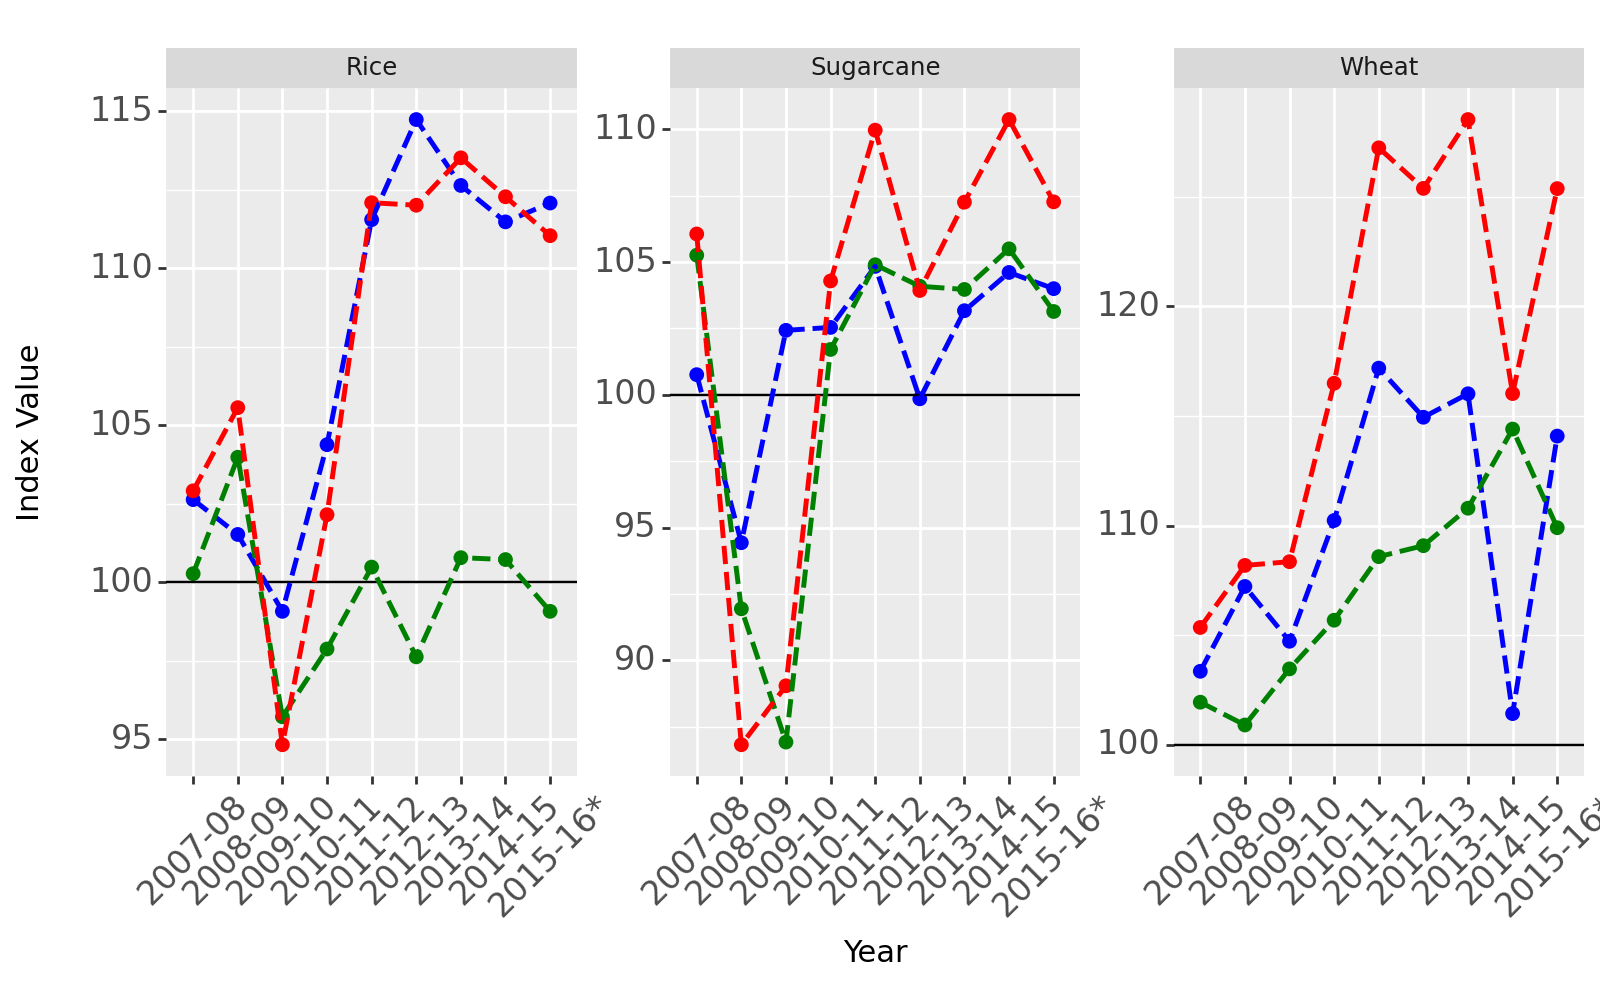

In [896]:
#comparing index value of production , area  and yield over differnt years
big_plot2 = plot_crop(df_crop_case_study, (8,5))
print(big_plot2)

The blue line shows the yield, the gren one shows the Area used and the red line shows the production

In [766]:
def extract_columns_by_keywords(df, search_words):
    """ Extract columns from a DataFrame that contain specific keywords in their names. """
    selected_columns = [col for col in df.columns if any(word in col.lower() for word in search_words)]
    df_selected = df[selected_columns]
    return df_selected

In [767]:
def multiply_columns_by_factor(df, factor, keyword):
    """Multiply values in columns containing a specific keyword in their names by a given factor. """
    df_result = df.copy()
    for col in df_result.columns:

        if keyword in col:
            df_result[col] *= factor
    return df_result

In [768]:
search_words = ['state', 'sugarcane', 'rice', 'wheat']
df_st_selected_crops_production = extract_columns_by_keywords(df_st_crop_production_09_16, search_words)
# df_st_selected_crops_production.columns


In [769]:
MT_to_tonnes = 1.1203
keyword = '000MT'
df_st_selected_crops_production = multiply_columns_by_factor(df_st_selected_crops_production, MT_to_tonnes,keyword )

In [770]:
df_st_selected_crops_production.columns = df_st_selected_crops_production.columns.str.replace('Food grains (cereals)-', '')
df_st_selected_crops_production.columns = df_st_selected_crops_production.columns.str.replace('-(Production is Thausand Toones)', '')
df_st_selected_crops_production.columns = df_st_selected_crops_production.columns.str.replace('(Th. tonnes)-', '')
df_st_selected_crops_production.columns = df_st_selected_crops_production.columns.str.replace('(000MT)-', '')

In [771]:
df_st_selected_crops_production.columns

Index(['State/ UT Name', 'Rice-2009-10', 'Wheat-2009-10', 'Sugarcane-2009-10',
       'Rice-2010-11', 'Wheat-2010-11', 'Sugarcane-2010-11', 'Rice-2011-12',
       'Wheat-2011-12', 'Sugarcane-2011-12', 'Rice-2012-13', 'Wheat-2012-13',
       'Sugarcane-2012-13', 'Rice-2013-14', 'Wheat-2013-14',
       'Sugarcane-2013-14', 'Rice-2014-15', 'Wheat-2014-15',
       'Sugarcane-2014-15', 'Rice-2015-16', 'Wheat-2015-16',
       'Sugarcane-2015-16'],
      dtype='object')

In [772]:
# df_st_selected_crops_production.head(2)

In [773]:
# Select relevant columns for each crop
rice_columns = [col for col in df_st_selected_crops_production.columns if 'Rice' in col]
wheat_columns = [col for col in df_st_selected_crops_production.columns if 'Wheat' in col]
sugarcane_columns = [col for col in df_st_selected_crops_production.columns if 'Sugarcane' in col]

# Calculate the average production for each crop
df_st_selected_crops_production['Average_Rice'] = df_st_selected_crops_production[rice_columns].mean(axis=1)
df_st_selected_crops_production['Average_Wheat'] = df_st_selected_crops_production[wheat_columns].mean(axis=1)
df_st_selected_crops_production['Average_Sugarcane'] = df_st_selected_crops_production[sugarcane_columns].mean(axis=1)
df_st_selected_crops_production.head(2)


State/ UT Name  Rice-2009-10  Wheat-2009-10  Sugarcane-2009-10  \
0     Andhra Pradesh       10538.0           10.0         13116.4724   
1  Arunachal Pradesh         216.0            5.0            30.2481   

   Rice-2010-11  Wheat-2010-11  Sugarcane-2010-11  Rice-2011-12  \
0       14418.0           13.0         16764.1692       12895.0   
1         234.0            6.0            32.4887         255.0   

   Wheat-2011-12  Sugarcane-2011-12  ...  Sugarcane-2013-14  Rice-2014-15  \
0           11.0         18693.3258  ...            15385.0        7234.0   
1            7.0            33.6090  ...                NaN           NaN   

   Wheat-2014-15  Sugarcane-2014-15  Rice-2015-16  Wheat-2015-16  \
0            NaN             9987.0        7490.0            NaN   
1            NaN                NaN           NaN            NaN   

   Sugarcane-2015-16  Average_Rice  Average_Wheat  Average_Sugarcane  
0             9312.0  10972.815714            9.6         14385.3825  
1                NaN    242.000000            5.5            32.4887  

[2 rows x 25 columns]

In [774]:
# import fiona
# fiona.os.environ['SHAPE_RESTORE_SHX'] = 'YES'

In [775]:
# Load shapefile containing Indian state boundaries
india_map = gpd.read_file('/content/drive/MyDrive/data_vis/crop/indian_states/Indian_states.shp')
india_map.columns

Index(['st_nm', 'geometry'], dtype='object')

In [776]:
# Merge production data with the map data
merged_data = india_map.merge(df_st_selected_crops_production, left_on='st_nm', right_on='State/ UT Name', how='left')

In [777]:
# merged_data.columns

In [778]:
merged_data.drop(columns = ['st_nm','Rice-2009-10', 'Wheat-2009-10',
       'Sugarcane-2009-10', 'Rice-2010-11', 'Wheat-2010-11',
       'Sugarcane-2010-11', 'Rice-2011-12', 'Wheat-2011-12',
       'Sugarcane-2011-12', 'Rice-2012-13', 'Wheat-2012-13',
       'Sugarcane-2012-13', 'Rice-2013-14', 'Wheat-2013-14',
       'Sugarcane-2013-14', 'Rice-2014-15', 'Wheat-2014-15',
       'Sugarcane-2014-15', 'Rice-2015-16', 'Wheat-2015-16',
       'Sugarcane-2015-16',  ], inplace = True)

In [779]:
merged_data['Average_Rice'].fillna(0, inplace=True)
merged_data['Average_Wheat'].fillna(0, inplace=True)
merged_data['Average_Sugarcane'].fillna(0, inplace=True)

In [780]:
def display_crop_production_map(df, subtitle):
    def update_plot(crop):
        fig, ax = plt.subplots(1, figsize=(8, 8))
        ax.axis('off')
        ax.set_title(f'Average {crop} {subtitle} in India', fontdict={'fontsize': '15', 'fontweight': '3'})
        df.plot(column=f'Average_{crop}', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)
        plt.show()

    # Dropdown widget for selecting crop
    crop_dropdown = widgets.Dropdown(
        options=['Rice', 'Wheat', 'Sugarcane'],
        value='Rice',
        description='Crop:',
        disabled=False,
    )

    # Define function to handle dropdown change event
    def on_change(change):
        update_plot(change.new)

    # Attach the function to the dropdown's change event
    crop_dropdown.observe(on_change, names='value')

    # Display the initial plot and the dropdown
    display(crop_dropdown)
    update_plot('Rice')

Dropdown(description='Crop:', options=('Rice', 'Wheat', 'Sugarcane'), value='Rice')

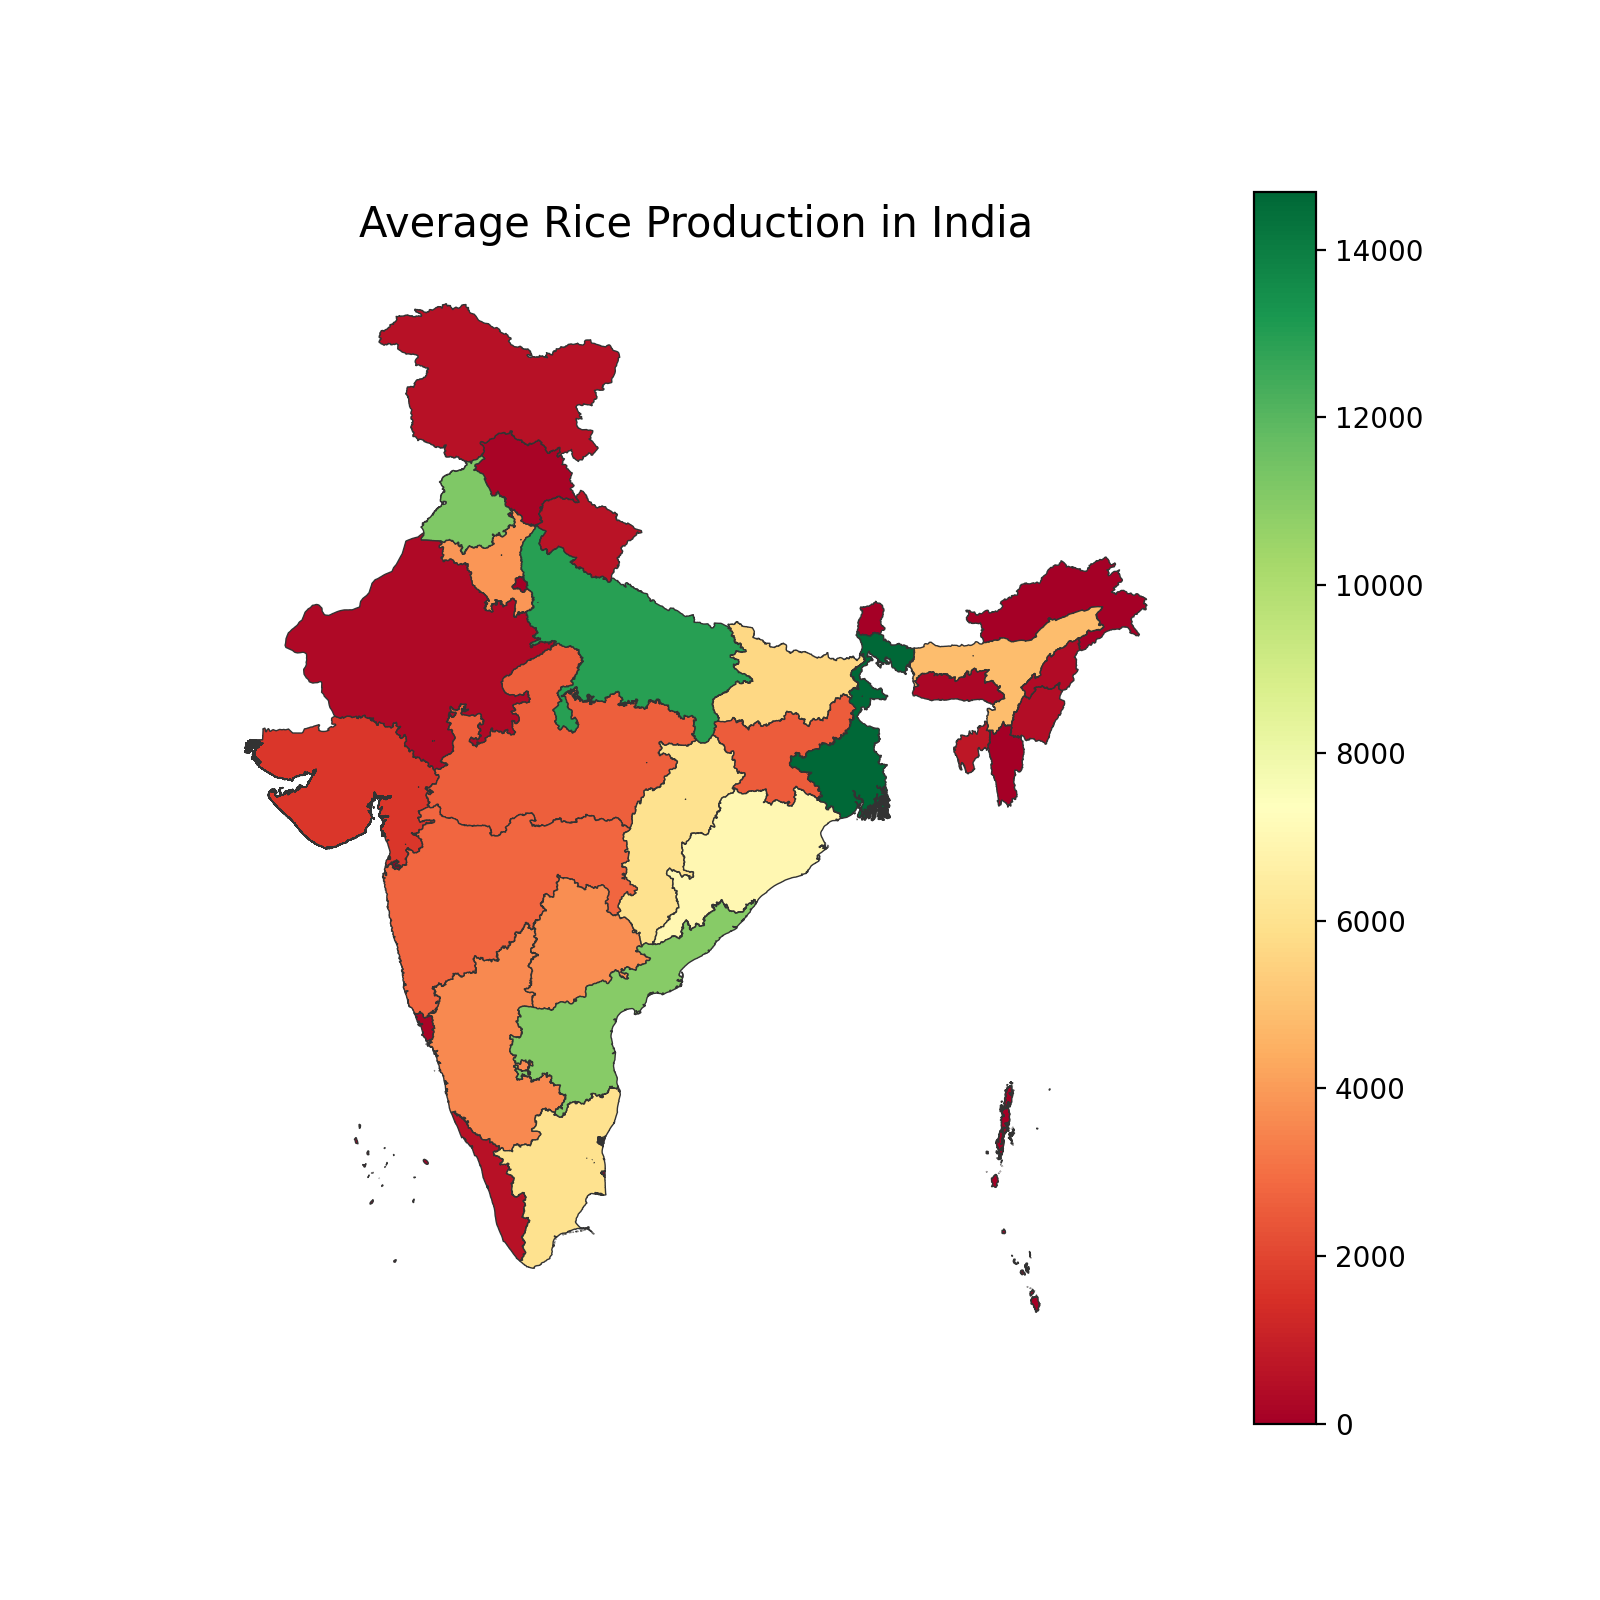

In [781]:
display_crop_production_map(merged_data, 'Production')

This **interactive plot** shows us of which crops (sugarcane, wheat, and rice) are grown in which part of the country more.

In [782]:
def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    if min_val == max_val:
      return column
    normalized_column = (column - min_val) / (max_val - min_val)
    return normalized_column

In [783]:
merged_data['norm_rice'] = min_max_normalize(merged_data['Average_Rice'])
merged_data['norm_wheat'] = min_max_normalize(merged_data['Average_Wheat'])
merged_data['norm_sugarcane'] = min_max_normalize(merged_data['Average_Sugarcane'])

In [784]:
# Function to create plot for each crop
def create_plot(df, crop, title):
    top_states = df.sort_values(by=f'norm_{crop}', ascending=False).head(5)
    return (
        ggplot(top_states, aes(x='State/ UT Name', y=f'norm_{crop}', fill='State/ UT Name')) +
        geom_bar(stat='identity') +
        labs(title=f'Top 5 States with Maximum Average {crop.capitalize()} {title}', x='State/ UT Name', y='Production (Normalized)') +
        theme(axis_text_x=element_text(angle=45, vjust=0.5))
    )


In [785]:
# merged_data.head()

In [786]:
# Create individual plots for each crop
prod_sugarcane = create_plot(merged_data, 'sugarcane', 'production')
prod_rice = create_plot(merged_data, 'rice', 'production')
prod_wheat = create_plot(merged_data, 'wheat', 'production')

The charts below show the main 5 states which produces Rice, Wheat and sugarcane respectively.

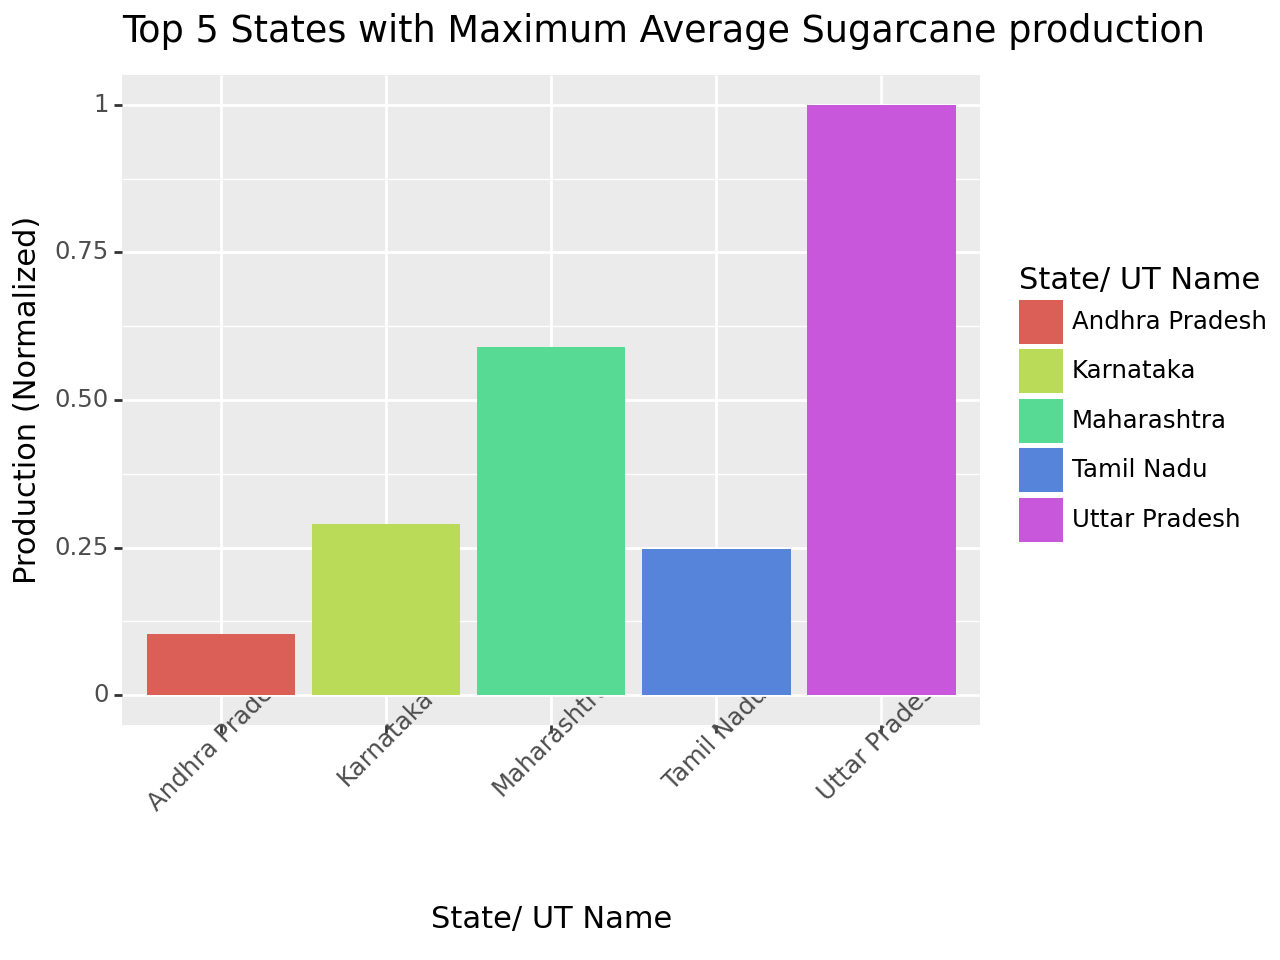

<Figure Size: (640 x 480)>

In [787]:
prod_sugarcane

Sugarcane thrives in tropical and subtropical climates with warm temperatures ( 20°C to 30°C ), abundant sunlight, and adequate moisture. It is very suitable for states like maharashtra and Uttar Pradesh.

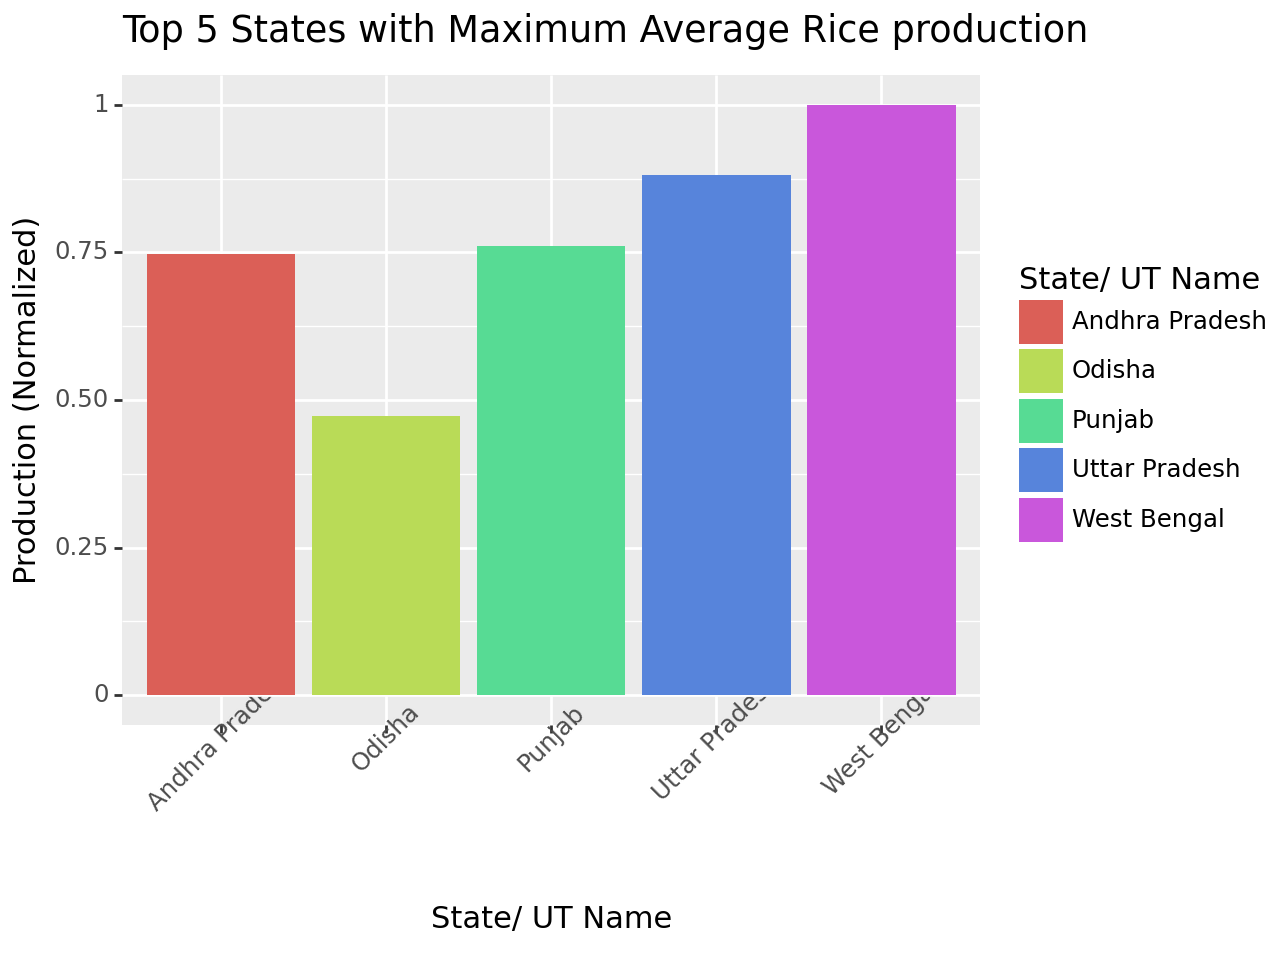

<Figure Size: (640 x 480)>

In [788]:
prod_rice

Rice is predominantly cultivated in warm, humid climates with abundant rainfall and relatively high temperatures. Therefore, places with a lot of rainfall like West Bengal are highly suited for its cultivation. Other states like Uttar Pradesh and Punjab are also major produces and depends more on irrigation for water supply.

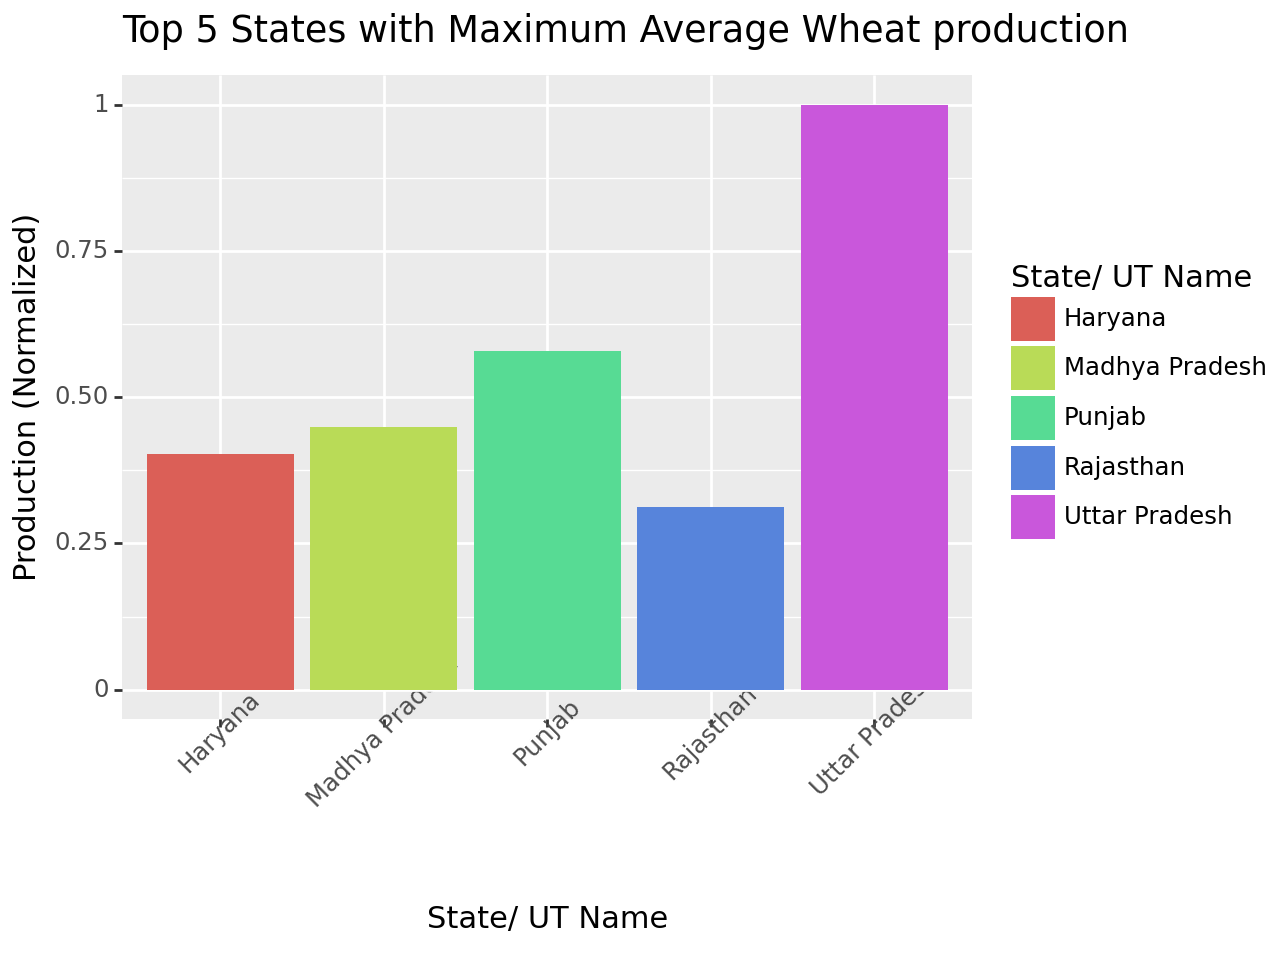

<Figure Size: (640 x 480)>

In [789]:
prod_wheat

Wheat is primarily grown in temperate climates with distinct seasons and has a broad temperature range for growth, with optimal temperatures for germination and vegetative growth between 15°C to 24°C. Therefore it is more produced in northern INdia where the temperature variations are more extremes.

In [790]:
search_words = ['state', 'sugarcane', 'rice', 'wheat']
df_st_selected_crops_yield = extract_columns_by_keywords(df_st_avg_yield_09_16, search_words)


In [791]:
# df_st_selected_crops_yield.columns

In [792]:
df_st_selected_crops_yield.columns = df_st_selected_crops_yield.columns.str.replace('Foodgrains(cereals) - ', '')
df_st_selected_crops_yield.columns = df_st_selected_crops_yield.columns.str.replace(' (Rabi)', '')

In [793]:
# df_st_selected_crops_yield.dtypes

In [794]:
#Preprocessing the dataframe
df_st_selected_crops_yield_copy = df_st_selected_crops_yield.copy()
df_st_selected_crops_yield_copy.loc[df_st_selected_crops_yield_copy['Sugarcane - 2012-13'] == '#DIV/0!', 'Sugarcane - 2012-13'] = np.nan
df_st_selected_crops_yield_copy['Sugarcane - 2012-13'] = df_st_selected_crops_yield_copy['Sugarcane - 2012-13'].astype(float)
df_st_selected_crops_yield_copy.fillna(0, inplace=True)


In [795]:
rice_columns = [col for col in df_st_selected_crops_yield_copy.columns if 'Rice' in col]
wheat_columns = [col for col in df_st_selected_crops_yield_copy.columns if 'Wheat' in col]
sugarcane_columns = [col for col in df_st_selected_crops_yield_copy.columns if 'Sugarcane' in col]

# Calculate the average production for each crop
df_st_selected_crops_yield_copy['Average_Rice'] = df_st_selected_crops_yield_copy[rice_columns].mean(axis=1)
df_st_selected_crops_yield_copy['Average_Wheat'] = df_st_selected_crops_yield_copy[wheat_columns].mean(axis=1)
df_st_selected_crops_yield_copy['Average_Sugarcane'] = df_st_selected_crops_yield_copy[sugarcane_columns].mean(axis=1)
# df_st_selected_crops_yield_copy.head(2)


In [796]:
# df_st_selected_crops_yield_copy.columns

In [797]:
df_st_selected_crops_yield_copy.drop(columns = ['Rice - 2009-10', 'Rice - 2010-11', 'Rice - 2011-12',
       'Rice - 2012-13', 'Rice - 2013-14', 'Rice - 2014-15',
       'Rice (Total) - 2015-16', 'Wheat - 2009-10', 'Wheat - 2010-11',
       'Wheat - 2011-12', 'Wheat - 2012-13', 'Wheat - 2013-14',
       'Wheat - 2014-15', 'Wheat - 2015-16', 'Sugarcane - 2009-10',
       'Sugarcane - 2010-11', 'Sugarcane - 2011-12', 'Sugarcane - 2012-13',
       'Sugarcane - 2013-14', 'Sugarcane - 2014-15', 'Sugarcane - 2015-16',
       'Sugarcane - 2015-16.1'], inplace = True)

In [798]:
# Merge production data with the map data
merged_data_yield = india_map.merge(df_st_selected_crops_yield_copy, left_on='st_nm', right_on='State/ UT Name', how='left')

In [799]:
merged_data_yield.drop(columns = ['st_nm'], inplace = True)

In [800]:

merged_data_yield.dropna(subset=['State/ UT Name'], inplace=True)

In [801]:
# merged_data_yield.head()

In [802]:
merged_data_yield['norm_rice'] = min_max_normalize(merged_data_yield['Average_Rice'])
merged_data_yield['norm_wheat'] = min_max_normalize(merged_data_yield['Average_Wheat'])
merged_data_yield['norm_sugarcane'] = min_max_normalize(merged_data_yield['Average_Sugarcane'])

In [803]:
# merged_data_yield.head(2)

In [804]:
plot_sugarcane = create_plot(merged_data_yield, 'sugarcane', 'yield')
plot_rice = create_plot(merged_data_yield, 'rice', 'yield')
plot_wheat = create_plot(merged_data_yield, 'wheat', 'yield')

The charts below show 5 states with highest yield for the following crops

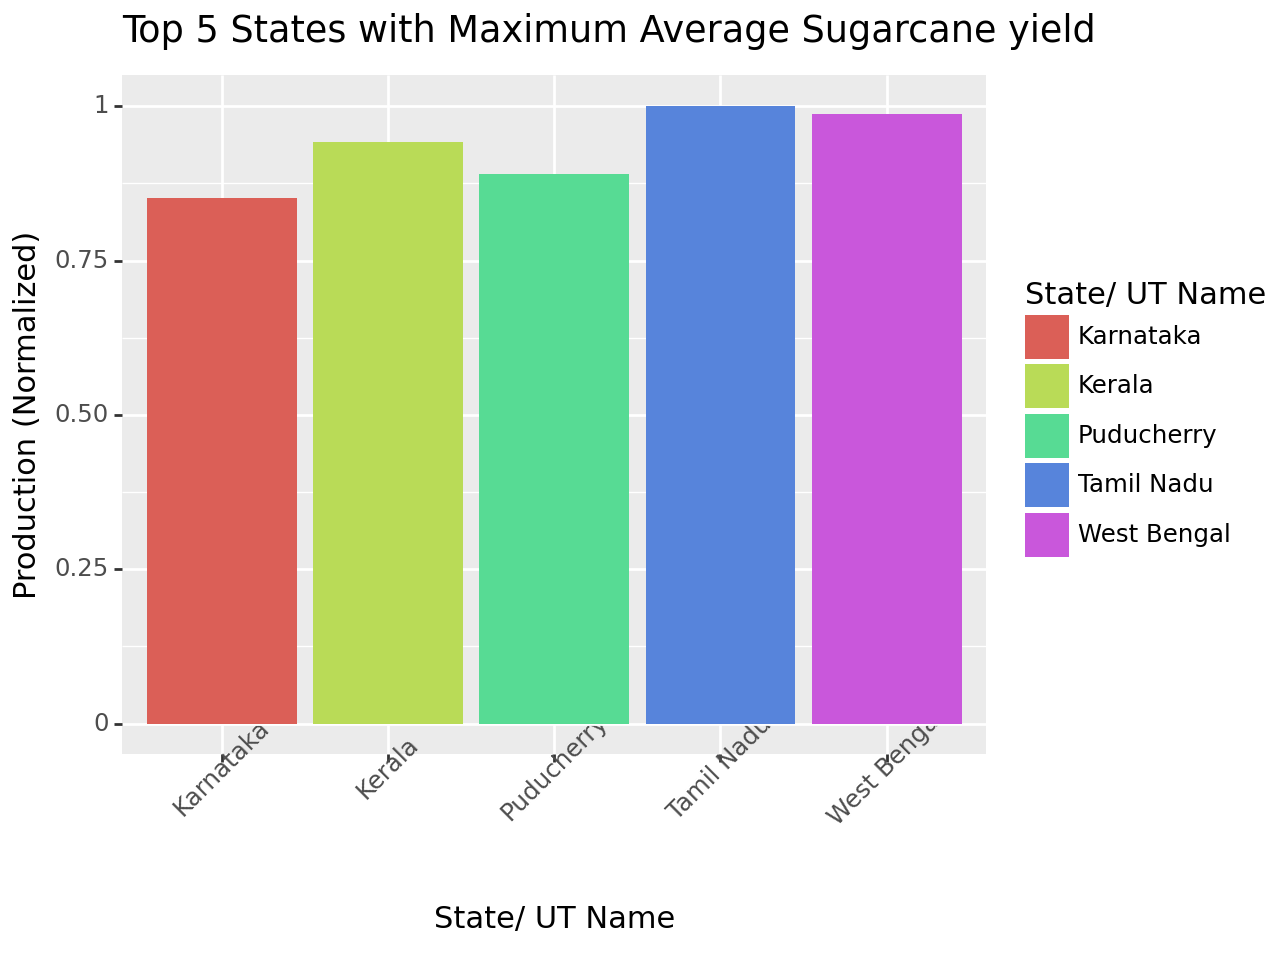

In [805]:
print(plot_sugarcane)




*   We can see that the yield of Sugarcane is quite comaprable for many states.
*   Even though Kerala, Puducherry and West Bengal are not in top 5 producers, they have a very high yield. Few reasons can be :

      1.   They have favorable agro-climatic conditions that are conducive to high-yield.
      2.   These states cultivate a diverse range of crops suited to their respective agro-climatic conditions and Diversification of crops allows farmers to optimize land use and maximize yields.

      3.    Intensive Farming Practices: Farmers in Kerala, Puducherry, and West Bengal often employ intensive farming practices such as multiple cropping, intercropping, and integrated pest management. These practices help maximize land productivity and minimize crop losses, leading to higher overall yields

      4.   Smallholder farming is prevalent in Kerala, Puducherry, and West Bengal, where many farmers cultivate crops on relatively small landholdings. Smallholder farmers often have intimate knowledge of local agro-ecosystems and employ traditional knowledge and practices that contribute to sustainable and high-yield agriculture.







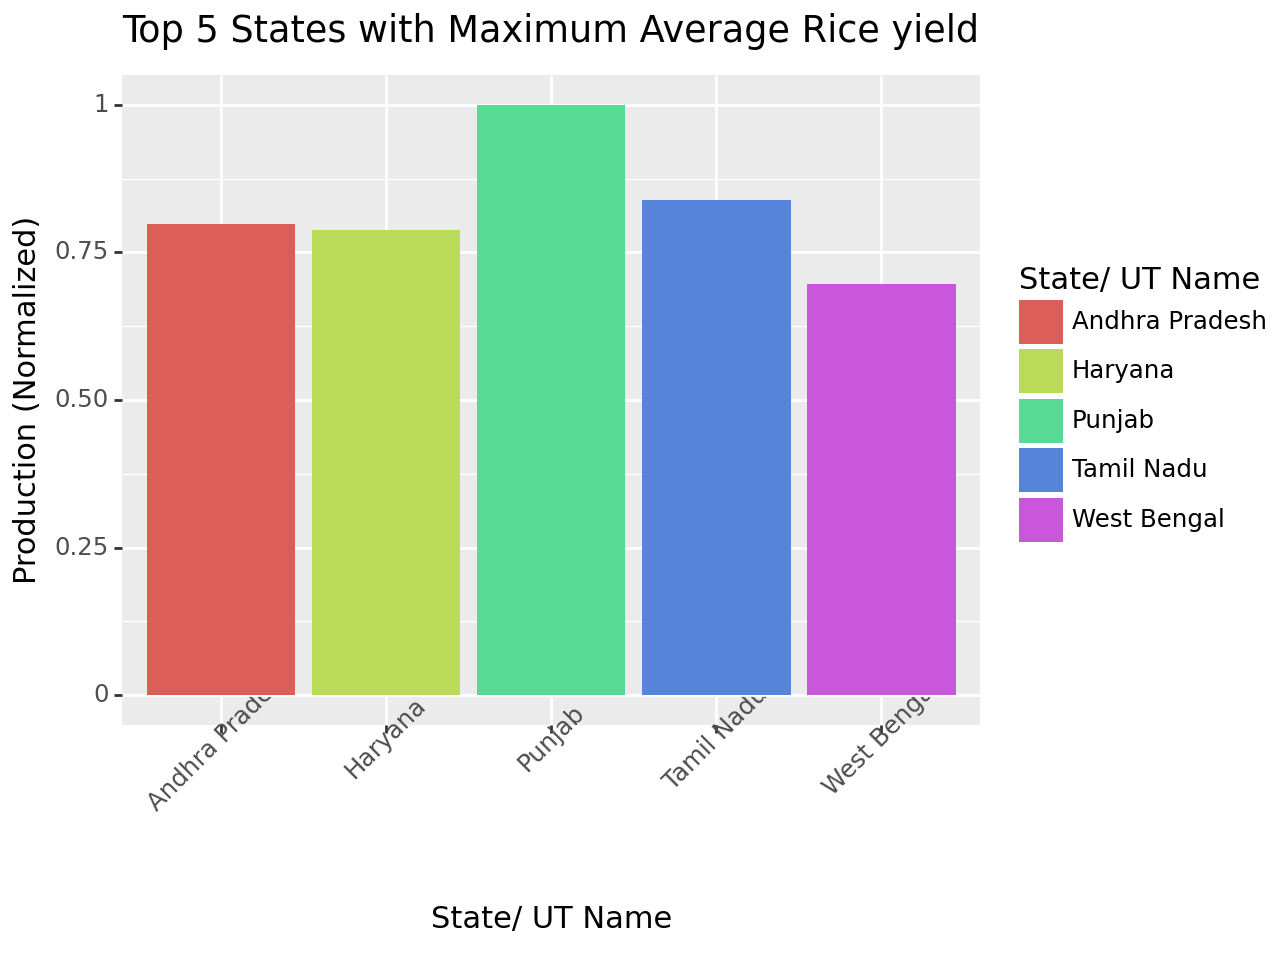

In [806]:
print(plot_rice)

An interesting fact to notice here is that yield of Punjab in rice is more than West Bengal and West bengal is the largest produer of Rice in India.

Haryana and Tamil Nadu are not in top 5 rice producing states, they have high yield

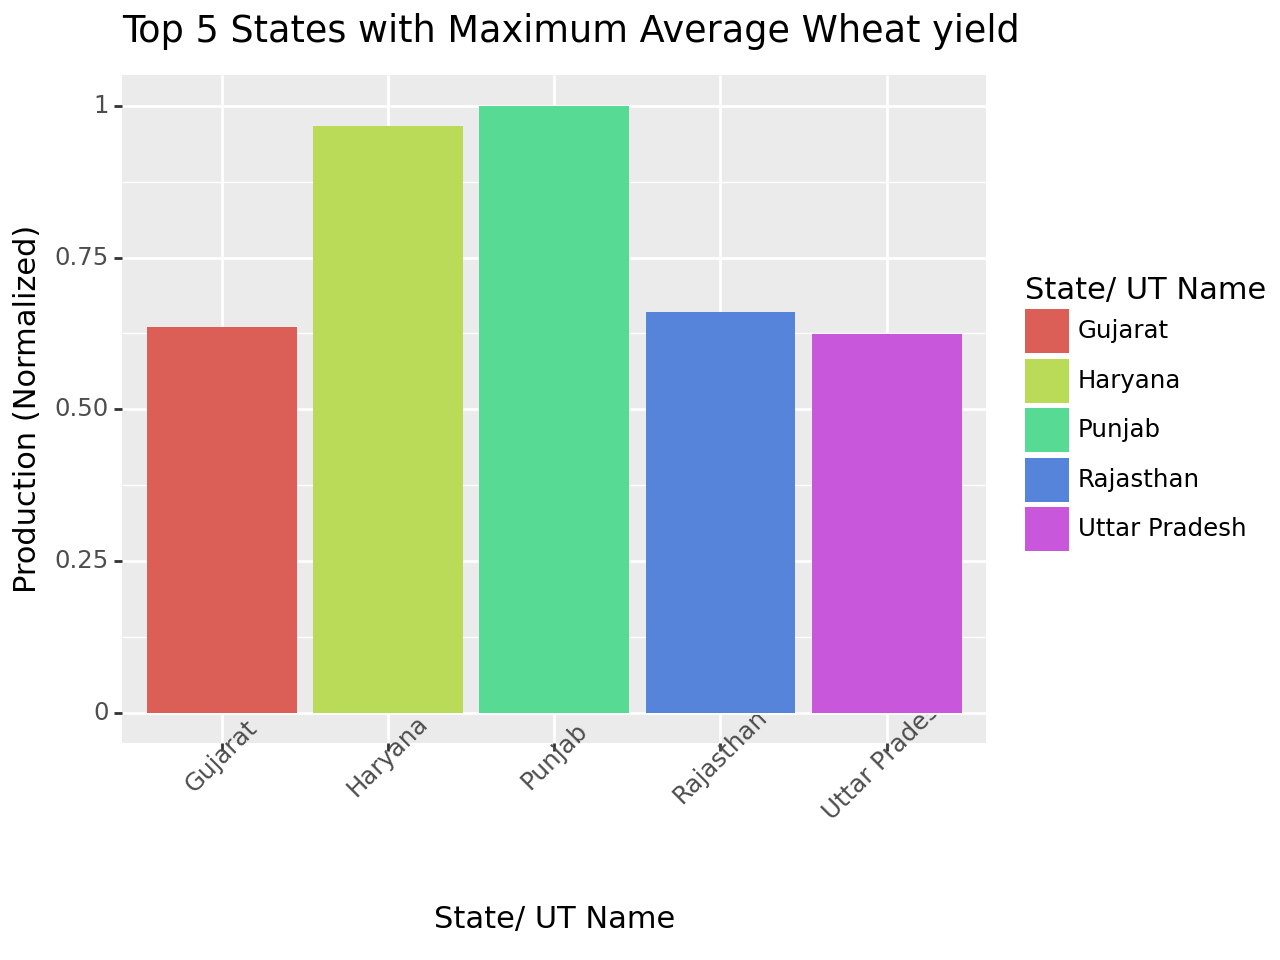

In [807]:
print(plot_wheat)

The yield of Punjab is much higher than Uttar Pradesh even though Uttar Pradesh is the leading wheat producer in India with average production much higher than other states.

Dropdown(description='Crop:', options=('Rice', 'Wheat', 'Sugarcane'), value='Rice')

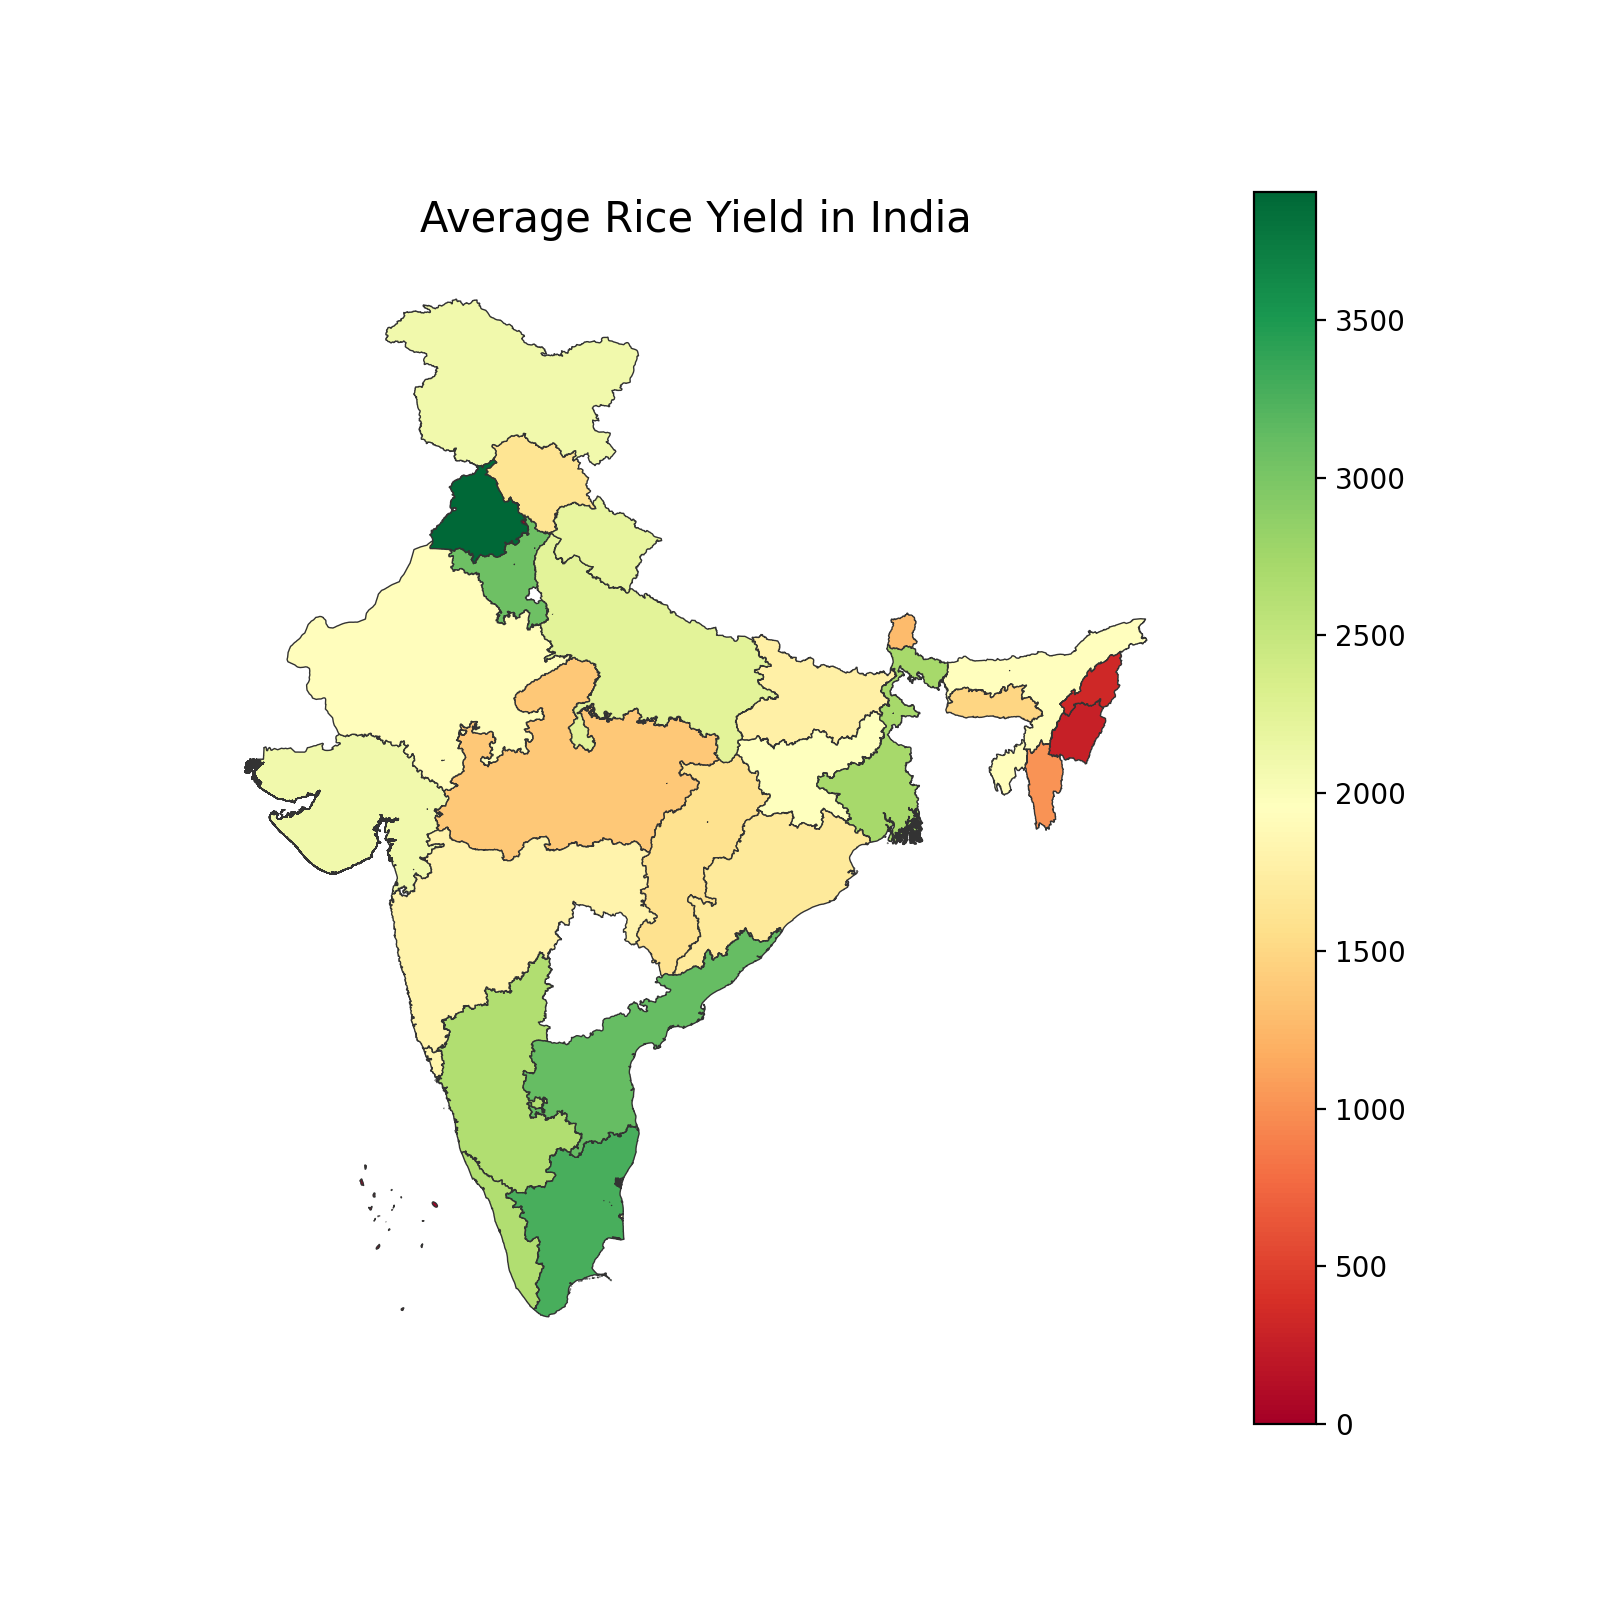

In [808]:
display_crop_production_map(merged_data_yield, 'Yield')

This interactive plot shows the yield for different states for rice, wheat and sugarcane. Since the datset used is of before 2014, it did not recognised Telangana as a separate state that is why there is a white patch in its place.

# Cost of Production of various crops  (Over 1 year)

In [809]:
# df_st_cost_production_major_5_2008_09.columns

In [810]:
# df_st_cost_production_major_5_2008_09.head()

Some terminology describing the dataset :

**Cost of Cultivation (/Hectare) A2+FL' (Cost_A2_FL):** This metric represents the cost of cultivation per hectare for a specific crop. It includes both the actual expenses incurred by farmers (A2) and the imputed value of family labor (FL). It takes into account various factors such as seeds, fertilizers, pesticides, labor, irrigation, machinery, and other inputs required for cultivation.

**Cost of Cultivation (/Hectare) C2' (Cost_C2):** This metric refers to the comprehensive cost of cultivation per hectare. It includes all the costs covered in A2+FL and also considers the rental value of owned land and interest on the value of fixed capital assets, such as farm machinery and buildings. Cost_C2 provides a more comprehensive estimate of the total expenses incurred by farmers.

**Cost of Production (/Quintal) C2' (Cost_Production):** This metric represents the cost of production per quintal of crop yield. It calculates the average cost required to produce one quintal (100 kilograms) of the crop, considering all the costs involved in cultivation as mentioned in Cost_C2.

**Yield (Quintal/ Hectare):** Yield is a measure of crop productivity and represents the amount of crop produced per hectare of land. It is typically measured in quintals, where one quintal is equal to 100 kilograms. Yield is an important indicator of agricultural efficiency and determines the quantity of crop obtained from a given area of land.

In [811]:
df_st_cost_production_major_5_2008_09.isna().sum()/len(df_st_cost_production_major_5_2008_09)*100

Crop                                     0.0
State                                    0.0
Cost of Cultivation (`/Hectare) A2+FL    0.0
Cost of Cultivation (`/Hectare) C2       0.0
Cost of Production (`/Quintal) C2        0.0
Yield (Quintal/ Hectare)                 0.0
dtype: float64

In [812]:
df_st_cost_production_major_5_2008_09.isnull().sum().sum()

0

In [813]:
# df_st_cost_production_major_5_2008_09.columns

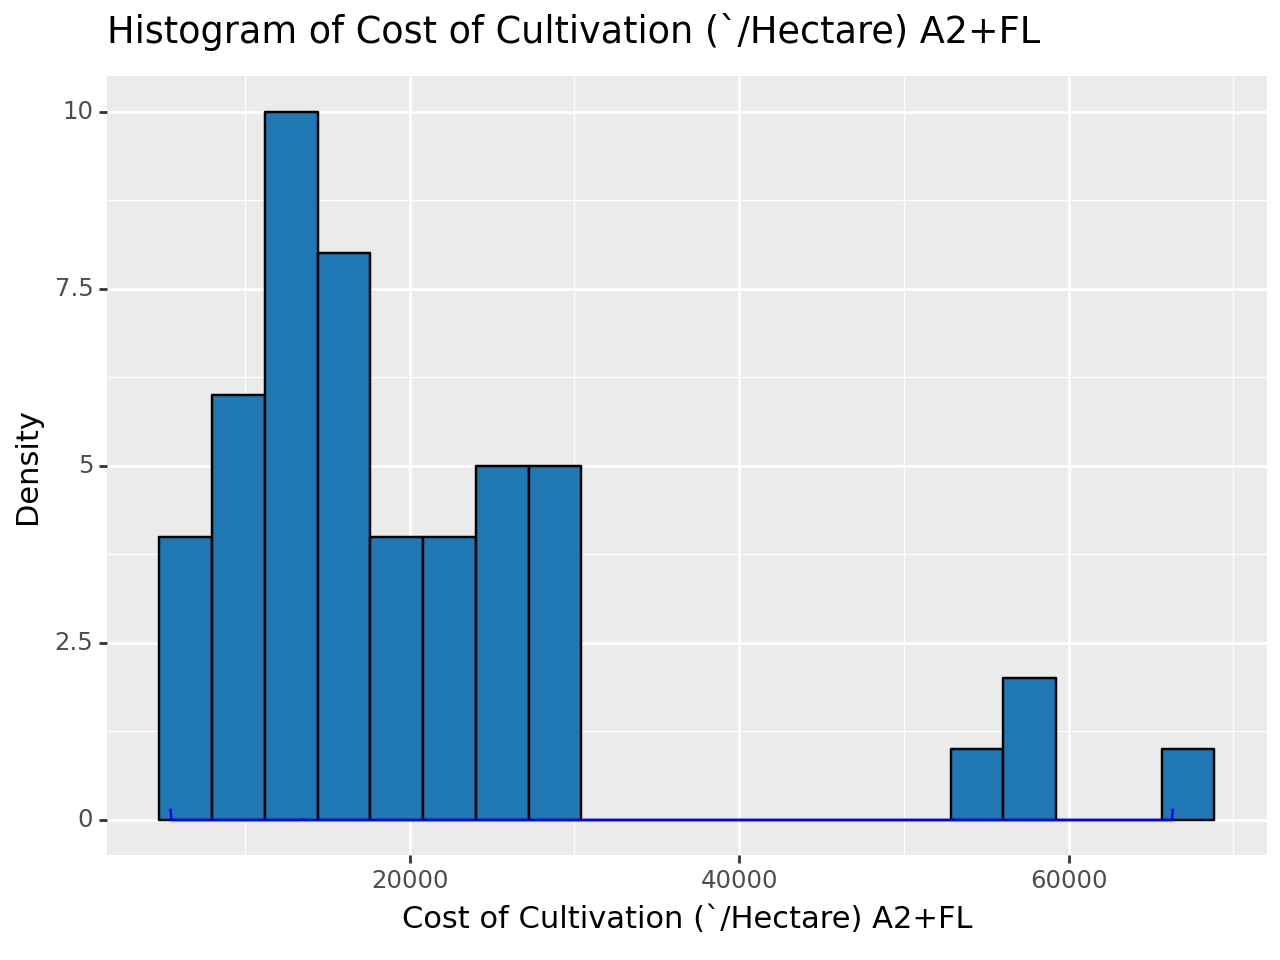

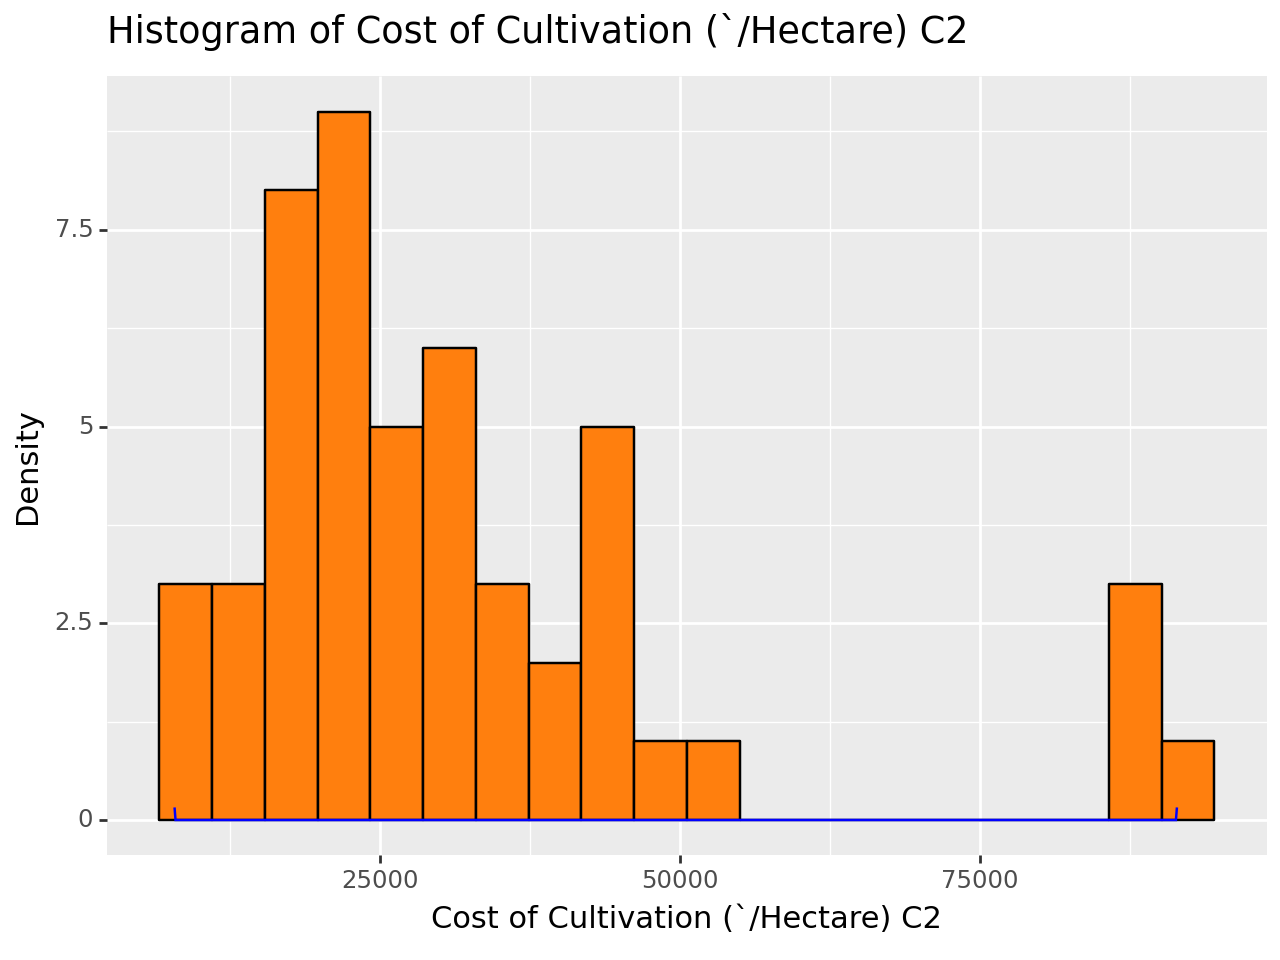

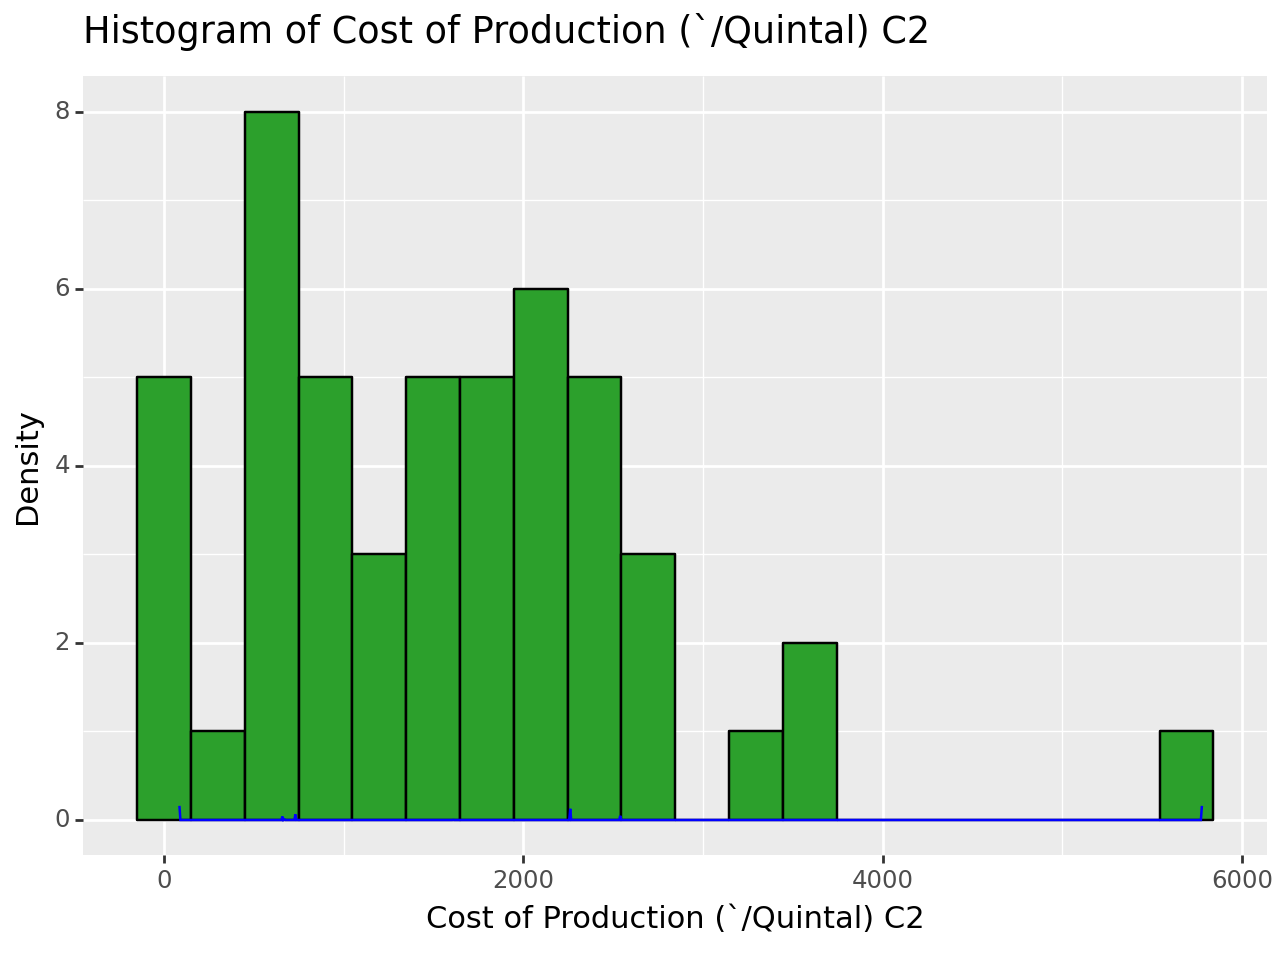

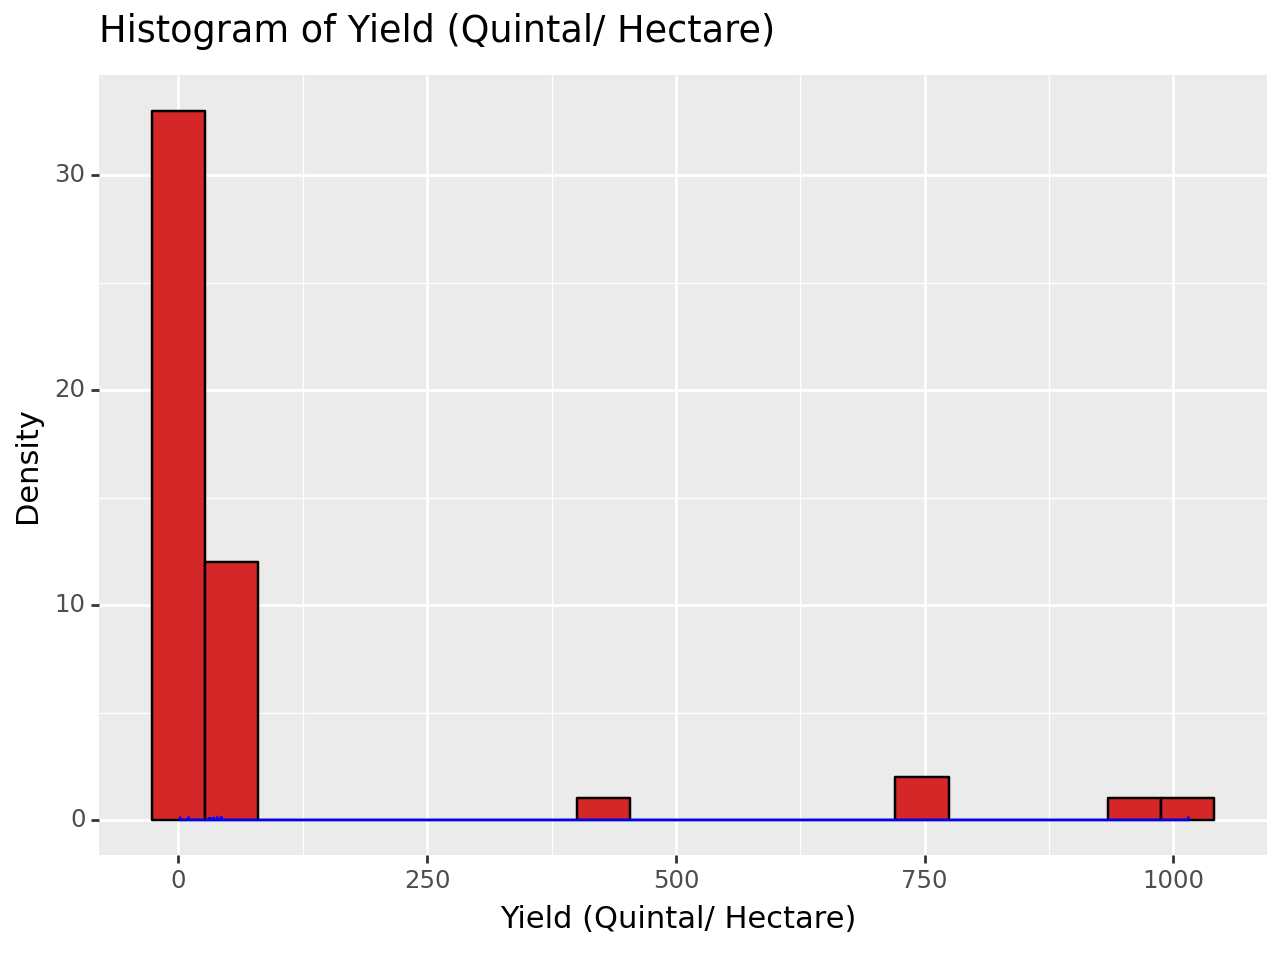

In [814]:
# Color palette for the histograms
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Histogram
column_names = ['Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2', 'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ']

for i, column in enumerate(column_names):
    plot = (ggplot(df_st_cost_production_major_5_2008_09, aes(x=column)) +
            geom_histogram(fill=colors[i % len(colors)], bins=20, color='black') +
            stat_density(color='blue', adjust = 1, bw = 0.05) +  # Add density curve
            labs(title=f'Histogram of {column}', x=column, y='Density')
            )

    print(plot)


I have chosen histogram to show this plot because:


*  It provide a visual representation of the distribution of data by binning it into intervals and showing the frequency of observations within each bin.
*   It helps me to understand the spread and shape of the cost data, allowing me to observe any skewness or outliers in the distribution



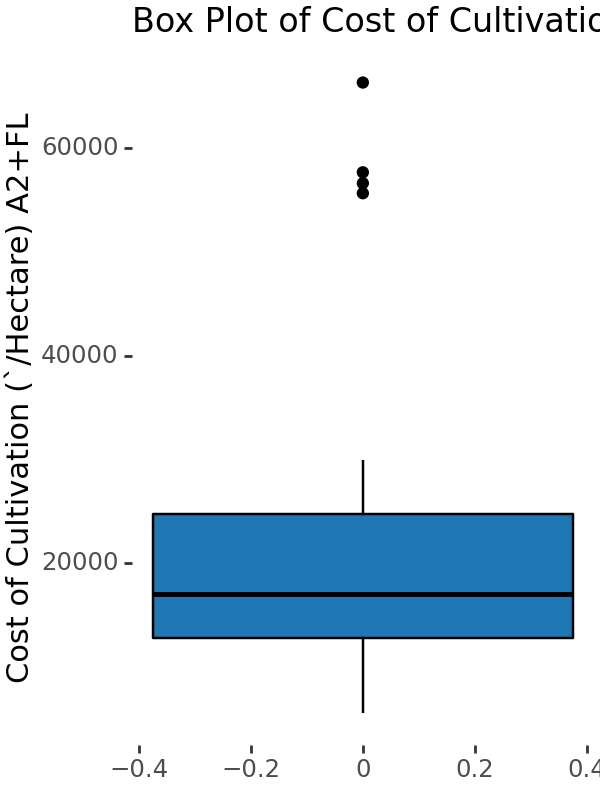

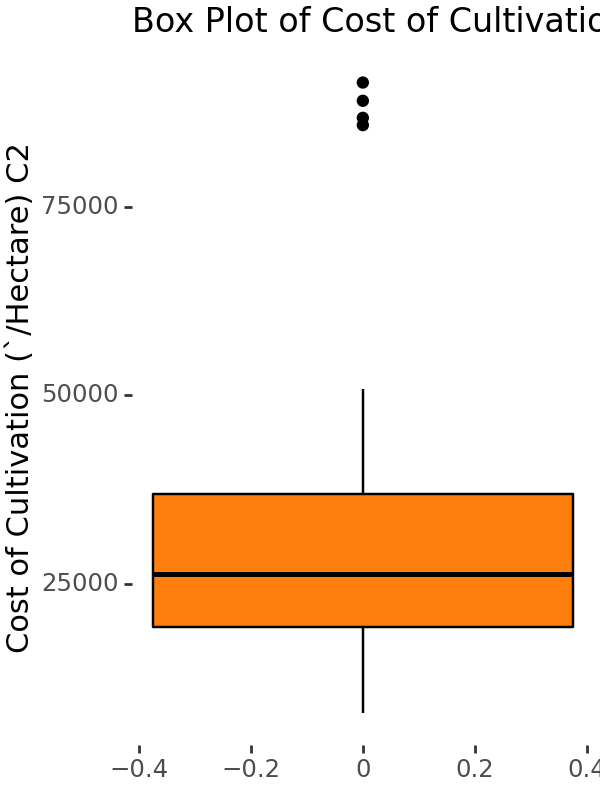

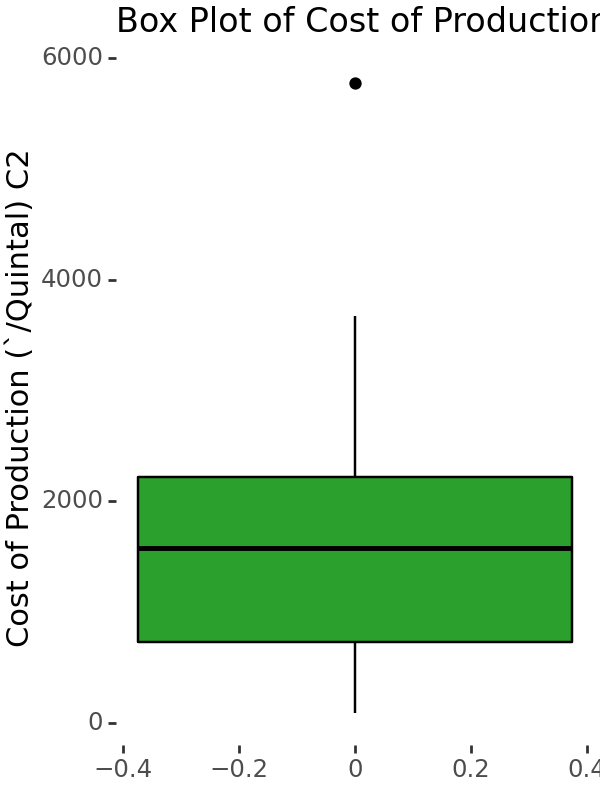

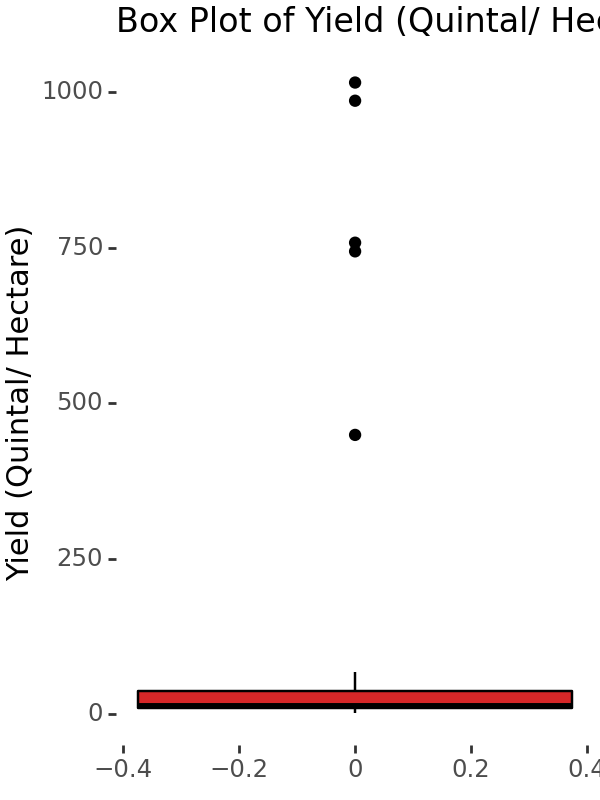

In [815]:

column_names = ['Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2', 'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ']

for i, column in enumerate(column_names):
    # Create the box plot
    plot = (ggplot(df_st_cost_production_major_5_2008_09, aes(y=column)) +
            geom_boxplot(fill=colors[i % len(colors)], color='black') +  # Add color aesthetic for borders
            labs(title=f'Box Plot of {column}', x='', y=column) +
            theme(plot_title=element_text(size=12), panel_background=element_rect(fill='white'), figure_size=(3, 4)))

    print(plot)

The above two plots show the histogram of various types of costs encountered. It can be seen that even though majorly the different types of cost lie in a particular bracket it is right skewed. that is there are outliers on the higher value side.  

---



I have chosen the **box plot** as they help to visualize the **outliers** better also proviing with summary like **median**. Here we can see the median of different types of cost.

In [816]:
df_heatmap = df_st_cost_production_major_5_2008_09.copy()
df_heatmap.columns


Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

In [817]:
df_heatmap.drop(columns = ['Crop', 'State'], inplace = True)

In [818]:
df_heatmap.rename(columns = {'Cost of Cultivation (`/Hectare) A2+FL': 'Cost A2_FL','Cost of Cultivation (`/Hectare) C2':'Cultivation_Cost C2', 'Cost of Production (`/Quintal) C2': 'Production_cost', 'Yield (Quintal/ Hectare) ': 'Yield'  }, inplace = True)

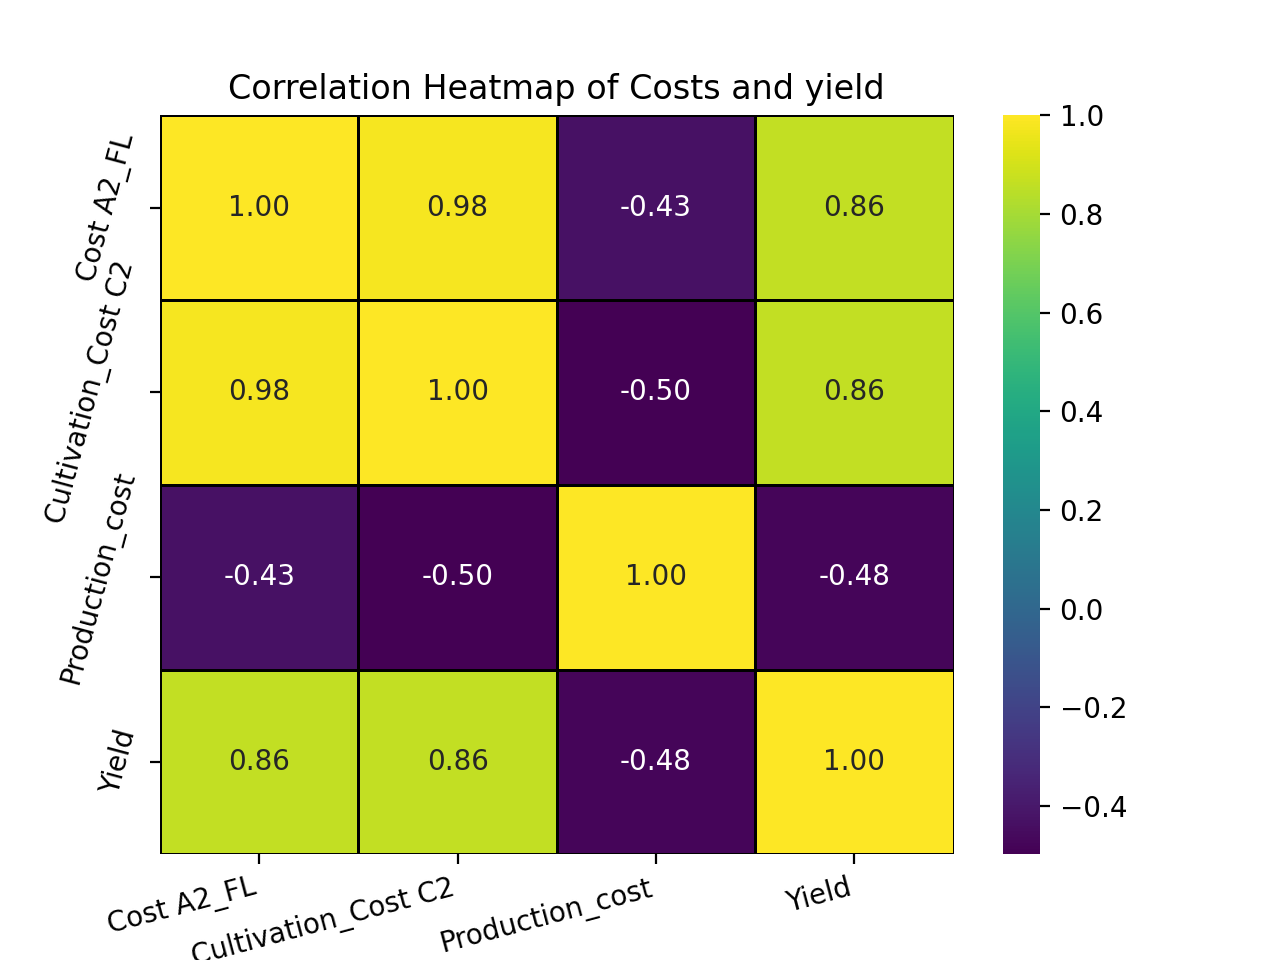

In [819]:
plt.figure()
heatmap = sns.heatmap(df_heatmap.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, linecolor='black')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=15, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=75)

plt.title('Correlation Heatmap of Costs and yield')
plt.show()

I have a heatmap to show correlation between yield and different types of costs.

We can see that Yield has a negative correlation with production cost but positive correlation with cost of cultivation.

The **positive correlation with cultivation cost** can be due to :


*  Achieving higher yields often requires more intensive cultivation practices, which can drive up the cost of cultivation.
*   To obtain higher yields, farmers may invest in premium inputs, such as high-quality seeds, specialized fertilizers, and advanced irrigation systems. While these inputs contribute to increased production, they also add to the overall cost of cultivation.


The **negative correlation with production cost** can be due to :


*   When farmers are able to produce more crops (higher yield) without significantly increasing their total costs, it means they're becoming more efficient in their operations. This efficiency might come from using resources more wisely or adopting better farming techniques.
*   When farmers produce more crops, they can spread their fixed costs (like machinery and land) over a larger output. This means the cost per unit of crop goes down as yield increases.




In [820]:
# df_st_cost_production_major_5_2008_09.columns

In [821]:
df_agg = df_st_cost_production_major_5_2008_09.groupby('Crop').agg({'Cost of Cultivation (`/Hectare) A2+FL': ['mean', 'max'],
                                                                    'Cost of Cultivation (`/Hectare) C2': ['mean', 'max'],
                                                                    'Cost of Production (`/Quintal) C2': ['mean', 'max'],
                                                                    'Yield (Quintal/ Hectare) ':['mean', 'max']
                                                                    })

In [822]:
df_agg.columns = ['_'.join(col) for col in df_agg.columns]

In [823]:
# df_agg.columns

In [824]:
df_agg.rename(columns = {"Cost of Cultivation (`/Hectare) A2+FL_mean": "Average_Cost_(A2+FL)",
                                 "Cost of Cultivation (`/Hectare) A2+FL_max": "Max_Cost_(A2+FL)",
                                 "Cost of Cultivation (`/Hectare) C2_mean": "Average_Cost_(C2)",
                                 "Cost of Cultivation (`/Hectare) C2_max": "Max_Cost_(C2)",
                                 "Cost of Production (`/Quintal) C2_mean": "Average_Production_Cost_(C2)",
                                 "Cost of Production (`/Quintal) C2_max": "Max_Production_Cost_(C2)",
                                 "Yield (Quintal/ Hectare) _mean":"Average_Yield",
                                "Yield (Quintal/ Hectare) _max":"Max_Yield"
                                 }, inplace = True)

In [825]:
df_agg.reset_index(inplace=True)
df_agg.head(2)

Crop  Average_Cost_(A2+FL)  Max_Cost_(A2+FL)  Average_Cost_(C2)  \
0   ARHAR             13607.646          17130.55          21719.846   
1  COTTON             28286.874          29918.97          42958.198   

   Max_Cost_(C2)  Average_Production_Cost_(C2)  Max_Production_Cost_(C2)  \
0       25270.26                      2491.730                   3670.54   
1       50828.83                      2271.966                   2539.47   

   Average_Yield  Max_Yield  
0          8.406       9.83  
1         18.772      24.39

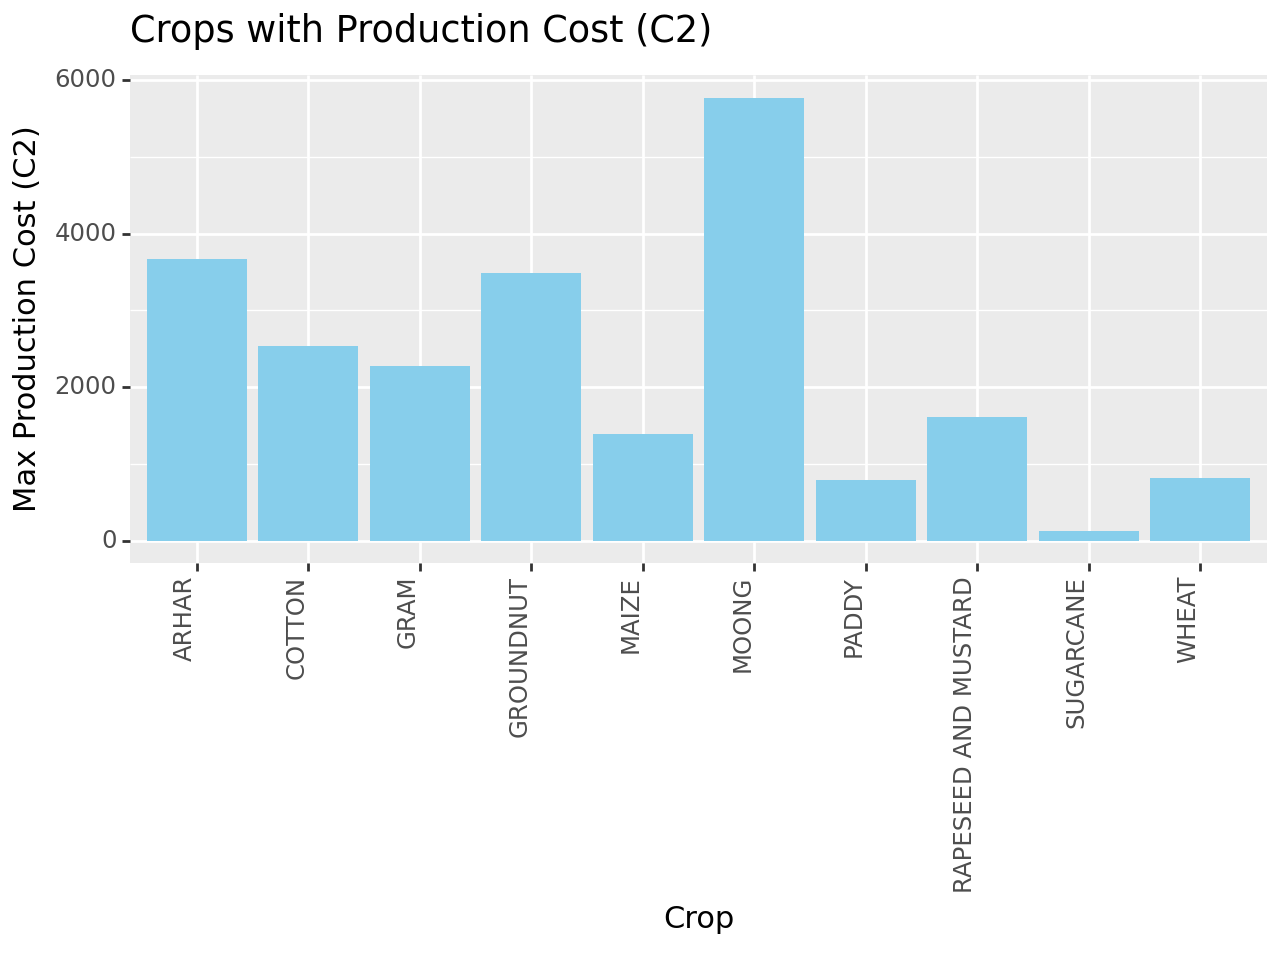

In [826]:
df_sorted = df_agg.sort_values(by='Max_Production_Cost_(C2)', ascending=False)

plot = (
    ggplot(df_sorted, aes(x='Crop', y='Max_Production_Cost_(C2)')) +
    geom_bar(stat='identity', fill='skyblue') +
    labs(title='Crops with Production Cost (C2)', x='Crop', y='Max Production Cost (C2)') +
    theme(axis_text_x=element_text(angle=90, hjust=1))  # Rotate x-axis labels for better readability
)

# Display the bar chart
print(plot)


We can see that Sugarcane has very low Production Cost and earlier we say that it had the highest yield. Therefore, it shows that positive correlation between yield and production cost exist.


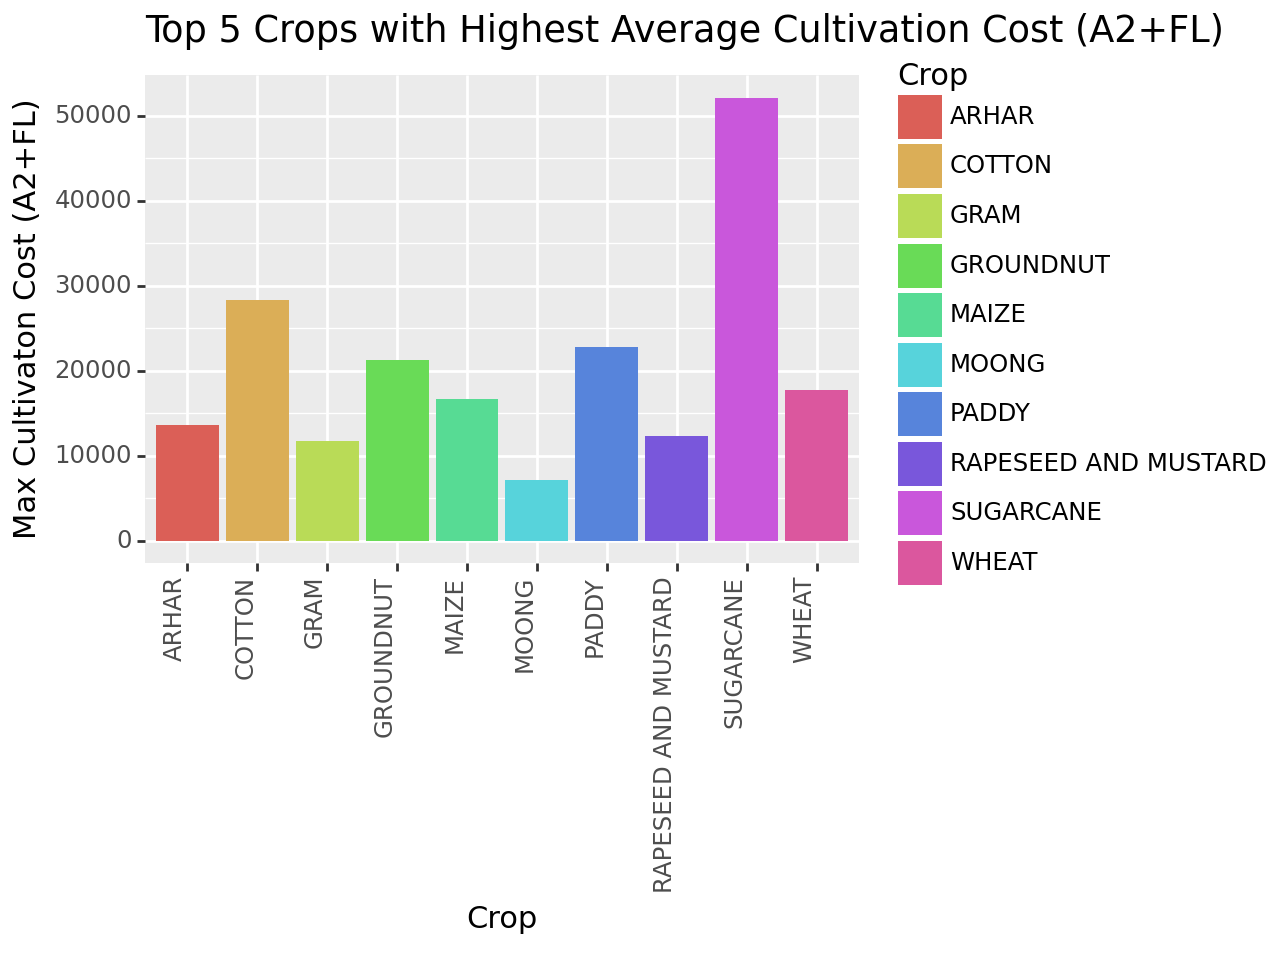

In [827]:
top_5_crops = df_agg.sort_values(by='Average_Cost_(A2+FL)', ascending=False)

plot = (
    ggplot(top_5_crops, aes(x='Crop', y='Average_Cost_(A2+FL)', fill = 'Crop')) +
    geom_bar(stat='identity') +
    labs(title='Top 5 Crops with Highest Average Cultivation Cost (A2+FL)', x='Crop', y='Max Cultivaton Cost (A2+FL)')+
    theme(axis_text_x=element_text(angle=90, hjust=1))+
    scale_fill_hue()

)

print(plot)

We can again see that cultivation cost of sugarcae is very high, showing the positive correlation with yield.

# **State Level : Case study 3 states : Uttar Pradesh, Punjab and Mahrashtra**

In [828]:
# df_st_land_utilisation.head(2)

In [829]:
# Sum the values of the specified columns to create the new column
df_st_land_utilisation['Other uncultivated land excluding-Fallow Land-Total'] = df_st_land_utilisation['Other uncultivated land excluding-Fallow Land-Permanent pastures & other grazing lands-(Col.9)'] + df_st_land_utilisation['Other uncultivated land excluding-Fallow Land-Land under misc. tree crops & groves (not incl. in net area sown)-(Col.10)'] + df_st_land_utilisation['Other uncultivated land excluding-Fallow Land-Culturable waste land-(Col.11)']


In [830]:
# Filter data for Uttar Pradesh, Punjab and Maharashtra
df_UP = df_st_land_utilisation[df_st_land_utilisation['State/ UT Name (Col.1)'] == 'Uttar Pradesh']
df_Maharashtra = df_st_land_utilisation[df_st_land_utilisation['State/ UT Name (Col.1)'] == 'Maharashtra']
df_Punjab = df_st_land_utilisation[df_st_land_utilisation['State/ UT Name (Col.1)'] == 'Punjab']


In [831]:
# df_UP.head(2)

In [832]:
# df_UP.columns

In [833]:
def state_interactive_pie_chart(row, title):
    # Extract data from the given row
    labels = ['Forests', 'Not available for cultivation', 'Other uncultivated Land (excluding Fallow Land)',
            'Fallow Lands', 'Net area Sown( x10 ha)']
    values = [row['Forests-(Col.5)'],
              row['Not available for cultivation-Area under non-agri-cultural uses-(Col.6)'],
              row['Other uncultivated land excluding-Fallow Land-Total'],
              row['Fallow Lands-Total(Col.13+Col.14)-(Col.15)'],
              row['Net area Sown-(Col.16)']]

    # Create the main pie chart trace
    trace_main = go.Pie(labels=labels, values=values, hoverinfo='label+percent',
                        textinfo='value', hole=0.5, name='Main')

    # Define the nested pie chart data
    nested_labels_fallow = ['Current fallows', 'Fallow Lands other than current fallows']
    nested_values_fallow = [row['Fallow Lands-Current fallows-(Col.14)'],
                            row['Fallow Lands-Fallow lands other than current fallows-(Col.13)']]

    nested_labels_uncultivated = ['Permanent pastures & other Grazing Lands',
                                  'Land under Misc. tree crops & groves', 'Culturable waste Land']
    nested_values_uncultivated = [row['Other uncultivated land excluding-Fallow Land-Permanent pastures & other grazing lands-(Col.9)'],
                                  row['Other uncultivated land excluding-Fallow Land-Land under misc. tree crops & groves (not incl. in net area sown)-(Col.10)'],
                                  row['Other uncultivated land excluding-Fallow Land-Culturable waste land-(Col.11)']]

    nested_labels_not_available = ['Area under non-agricultural uses', 'Barren and unculturable Land']
    nested_values_not_available = [row['Not available for cultivation-Barren & uncultur-able land-(Col.7)'],
                                   row['Not available for cultivation-Area under non-agri-cultural uses-(Col.6)']]

    # Create the nested pie chart traces
    trace_nested_fallow = go.Pie(labels=nested_labels_fallow, values=nested_values_fallow, hoverinfo='label+percent',
                                  textinfo='value', hole=0.2, name='Fallow Lands', visible=False)

    trace_nested_uncultivated = go.Pie(labels=nested_labels_uncultivated, values=nested_values_uncultivated,
                                       hoverinfo='label+percent', textinfo='value', hole=0.2,
                                       name='Other uncultivated Land', visible=False)

    trace_nested_not_available = go.Pie(labels=nested_labels_not_available, values=nested_values_not_available,
                                        hoverinfo='label+percent', textinfo='value', hole=0.2,
                                        name='Not available for cultivation', visible=False)

    # Combine the traces into a single figure
    fig = go.Figure(data=[trace_main, trace_nested_fallow, trace_nested_uncultivated, trace_nested_not_available])

    # Set initial title
    fig.update_layout(title=f"Land Distribution in {title} for Year {row['Year-(Col.2)']}")

    # Define buttons for toggling visibility of nested pie chart slices
    buttons = [
        dict(label='Major_distribution', method='update', args=[{'visible': [True, False, False, False]}]),
        dict(label='Fallow Lands', method='update', args=[{'visible': [False, True, False, False]}]),
        dict(label='Other uncultivated Land', method='update', args=[{'visible': [False, False, True, False]}]),
        dict(label='Not available for cultivation', method='update', args=[{'visible': [False, False, False, True]}])
    ]

    # Add buttons to the layout
    fig.update_layout(updatemenus=[{'buttons': buttons}])

    # Display the figure
    fig.show()




In [834]:
#Creating land distribution charts for Uttar Pradesh
row_2003_04 = df_UP.iloc[0]
row_2013_14 = df_UP.iloc[-1]

state_interactive_pie_chart(row_2003_04, 'Uttar Pradesh')
state_interactive_pie_chart(row_2013_14, 'Uttar Pradesh')

It can be seen that over 10 years from 2003 to 2013 , there was a decline in forest and net sown area and an increase in barren land in Uttar Pradesh.

It shows that there is a need to promote **sustainable agriculture**, and **land use planning** while also prioritizing towards **afforestation and reforestation**.

In [835]:
#Creating land distribution charts for Maharashtra
M_row_2003_04 = df_Maharashtra.iloc[0]
M_row_2013_14 = df_Maharashtra.iloc[-1]

state_interactive_pie_chart(M_row_2003_04, 'Maharashtra')
state_interactive_pie_chart(M_row_2013_14, 'Maharashtra')

In Maharashtra, there is not much change in forest and net sown land, but there is an increase in barren land.

In [836]:
#Creating land distribution charts for Punjab
P_row_2003_04 = df_Punjab.iloc[0]
P_row_2013_14 = df_Punjab.iloc[-1]

state_interactive_pie_chart(P_row_2003_04, 'Punjab')
state_interactive_pie_chart(P_row_2013_14, 'Punjab')

This chart shows that more than 80% of land in Punjab is used for agriculture.

There is a decrease in high decrease in forest land and decrease in net sown area while the barren land increased.



---



The increase in barren land (in all 3 states) indicates a significant loss or degradation of land productivity and ecological value. It signals for a  pressing need for concerted efforts to address land degradation, promote sustainable land management practices, and restore degraded landscapes to ensure the long-term health and resilience of ecosystems and human societies.

In [837]:
# df_st_crop_production_09_16.columns

In [838]:
prod_UP = df_st_crop_production_09_16[df_st_crop_production_09_16['State/ UT Name'] == 'Uttar Pradesh']
prod_Punjab = df_st_crop_production_09_16[df_st_crop_production_09_16['State/ UT Name'] == 'Punjab']
prod_Maharashtra = df_st_crop_production_09_16[df_st_crop_production_09_16['State/ UT Name'] == 'Maharashtra']


In [839]:
def preprocessing_dataframe(df):
  df_temp = df.copy()
  MT_to_tonnes = 1.1203
  keyword = 'MT'
  df_temp = multiply_columns_by_factor(df_temp, MT_to_tonnes,keyword )

  df_temp.columns = df_temp.columns.str.replace('Food grains (cereals)-', '')
  df_temp.columns = df_temp.columns.str.replace('-(Production is Thausand Toones)', '')
  df_temp.columns = df_temp.columns.str.replace('(Th. tonnes)-', '')
  df_temp.columns = df_temp.columns.str.replace('(MT)-', '')
  df_temp.columns = df_temp.columns.str.replace('***', '')

  return df_temp

In [840]:
prod_UP = preprocessing_dataframe(prod_UP)
prod_Punjab = preprocessing_dataframe(prod_Punjab)
prod_Maharashtra = preprocessing_dataframe(prod_Maharashtra)

In [841]:
prod_UP.drop(columns = ['State/ UT Name'], inplace = True)
prod_Maharashtra.drop(columns = ['State/ UT Name'], inplace = True)
prod_Punjab.drop(columns = ['State/ UT Name'], inplace = True)

In [842]:
prod_UP.replace('#', pd.NA, inplace=True)
prod_UP.fillna(0, inplace=True)
prod_UP = prod_UP.astype(float)


In [843]:
prod_Punjab.replace('#', pd.NA, inplace=True)
prod_Punjab.fillna(0, inplace=True)
prod_Punjab = prod_Punjab.astype(float)


In [844]:
prod_Maharashtra.replace('#', pd.NA, inplace=True)
prod_Maharashtra.fillna(0, inplace=True)
prod_Maharashtra = prod_Maharashtra.astype(float)

In [845]:
# prod_UP.columns

In [846]:
crop_names = set([col.split('-')[0].strip() for col in prod_UP.columns])
crop_names = list(crop_names)


In [847]:
def consolidate_crop_names(crop_names):
    consolidated_names = []
    for crop in crop_names:
        if "grains" in crop or "Grains" in crop:
            consolidated_names.append("Foodgrains")
        elif "cotton" in crop.lower():
            consolidated_names.append("Cotton")
        elif "rice" in crop.lower():
            consolidated_names.append("Rice")
        elif "wheat" in crop.lower():
            consolidated_names.append("Wheat")
        else:
            consolidated_names.append(crop)
    return consolidated_names

In [848]:
def top_n_crops_names(df, crop_names, n, use_normalized=False):
    total_production = {}

    # Iterate over each unique crop name
    for crop in crop_names:
        # Filter columns that contain the crop name
        crop_columns = [col for col in df.columns if crop in col]

        # Sum production values for the crop across all years
        total_crop_production = df[crop_columns].sum().sum()

        # Store the total production for the crop in the dictionary
        total_production[crop] = total_crop_production


    total_production_df = pd.DataFrame.from_dict(total_production, orient='index', columns=['Production'])

    # Sort the crops based on their total production
    total_production_df = total_production_df.sort_values(by='Production', ascending=False)

    # Select the top n most produced crops
    top_n_crops = total_production_df.head(n)

    # Return the names of the top N crops
    return top_n_crops.index.tolist()


In [849]:
def plot_top_n_crops(df, crop_names, n, title1, subtitle, use_normalized=False):
    # Consolidate crop names
    consolidated_crop_names = consolidate_crop_names(crop_names)

    total_production = {}

    for crop, consolidated_crop in zip(crop_names, consolidated_crop_names):
        # Filter columns that contain the crop name
        crop_columns = [col for col in df.columns if crop in col]

        # Sum production values for the crop across all years
        total_crop_production = df[crop_columns].sum().sum()

        # If use_normalized is True, normalize the total production

        # Store the total production for the crop in the dictionary
        if consolidated_crop in total_production:
            total_production[consolidated_crop] += total_crop_production
        else:
            total_production[consolidated_crop] = total_crop_production

    total_production_df = pd.DataFrame.from_dict(total_production, orient='index', columns=[f'{subtitle}']).reset_index()

    # Rename columns
    total_production_df.columns = ['Crop', f'{subtitle}']
    if use_normalized:
        total_crop_production = min_max_normalize(total_production_df[f'{subtitle}'])
        total_production_df[f'{subtitle}'] = total_crop_production

    # Sort the crops based on their total production
    total_production_df = total_production_df.sort_values(by=f'{subtitle}', ascending=False)

    # Select the top n most produced crops
    top_n_crops = total_production_df.head(n)
    top_n_crops = top_n_crops.sort_values(by=f'{subtitle}')

    # Plot a bar chart
    bar_chart = (
        ggplot(top_n_crops, aes(x='Crop', y=f'{subtitle}')) +
        geom_bar(stat='identity', fill='skyblue') +
        labs(title=f'Top {n} Crops with  Most {subtitle}in {title1} are', x='Crop', y=f'{subtitle}') +
        theme(axis_text_x=element_text(rotation=45, hjust=1))
    )

    # Display the bar chart
    print(bar_chart)

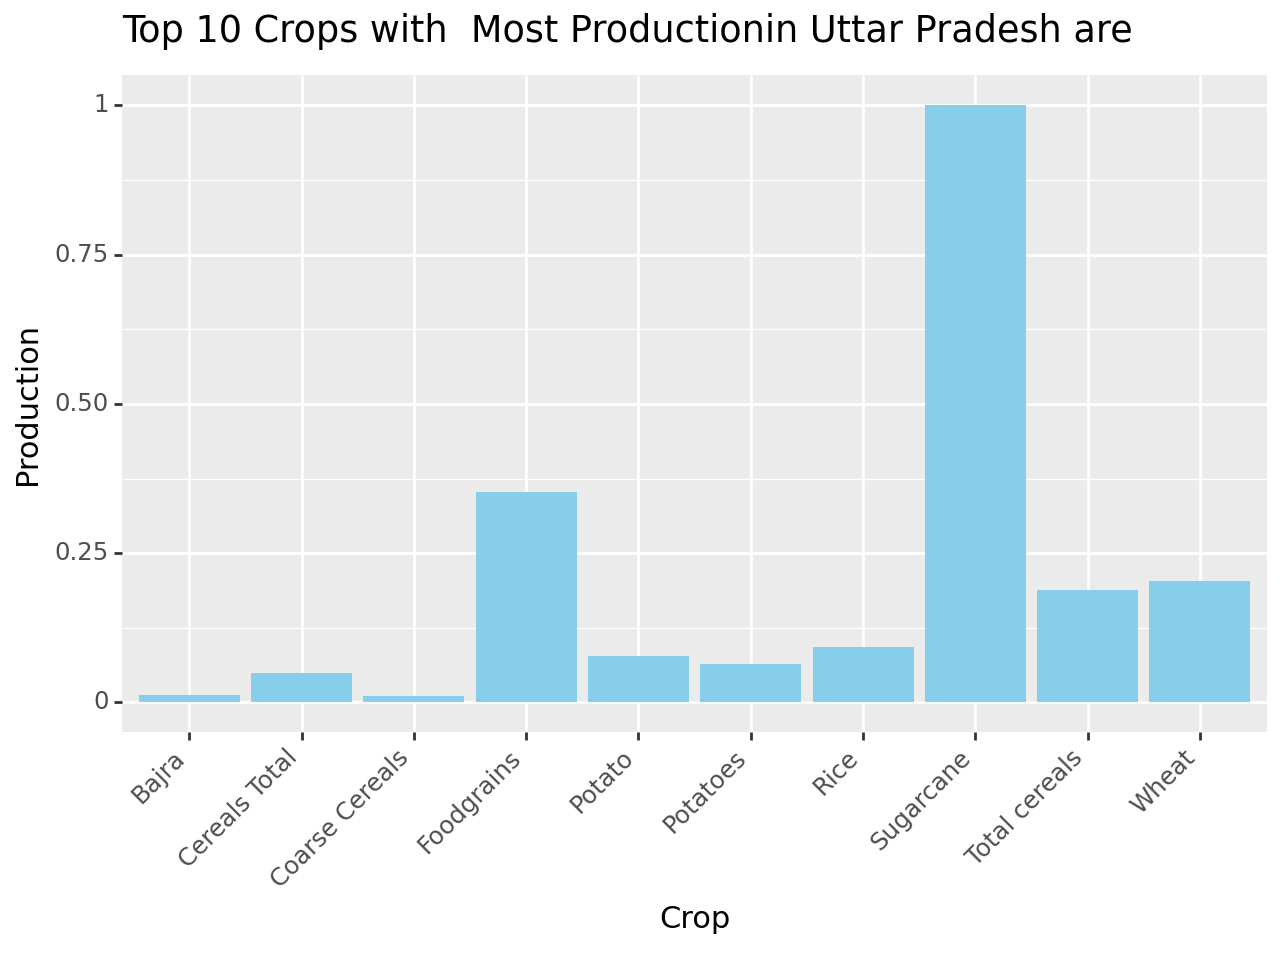

In [850]:
plot_top_n_crops(prod_UP, crop_names, 10, 'Uttar Pradesh', 'Production', True)


*   Sugarcane stands out as the primary crop in Uttar Pradesh, overshadowing the production levels of all other crops, which are notably lower in comparison.
*   It also shows that farmimg here is more focused on one crop.



In [851]:
top_10_UP_prod_crops = top_n_crops_names(prod_UP, crop_names, 10)

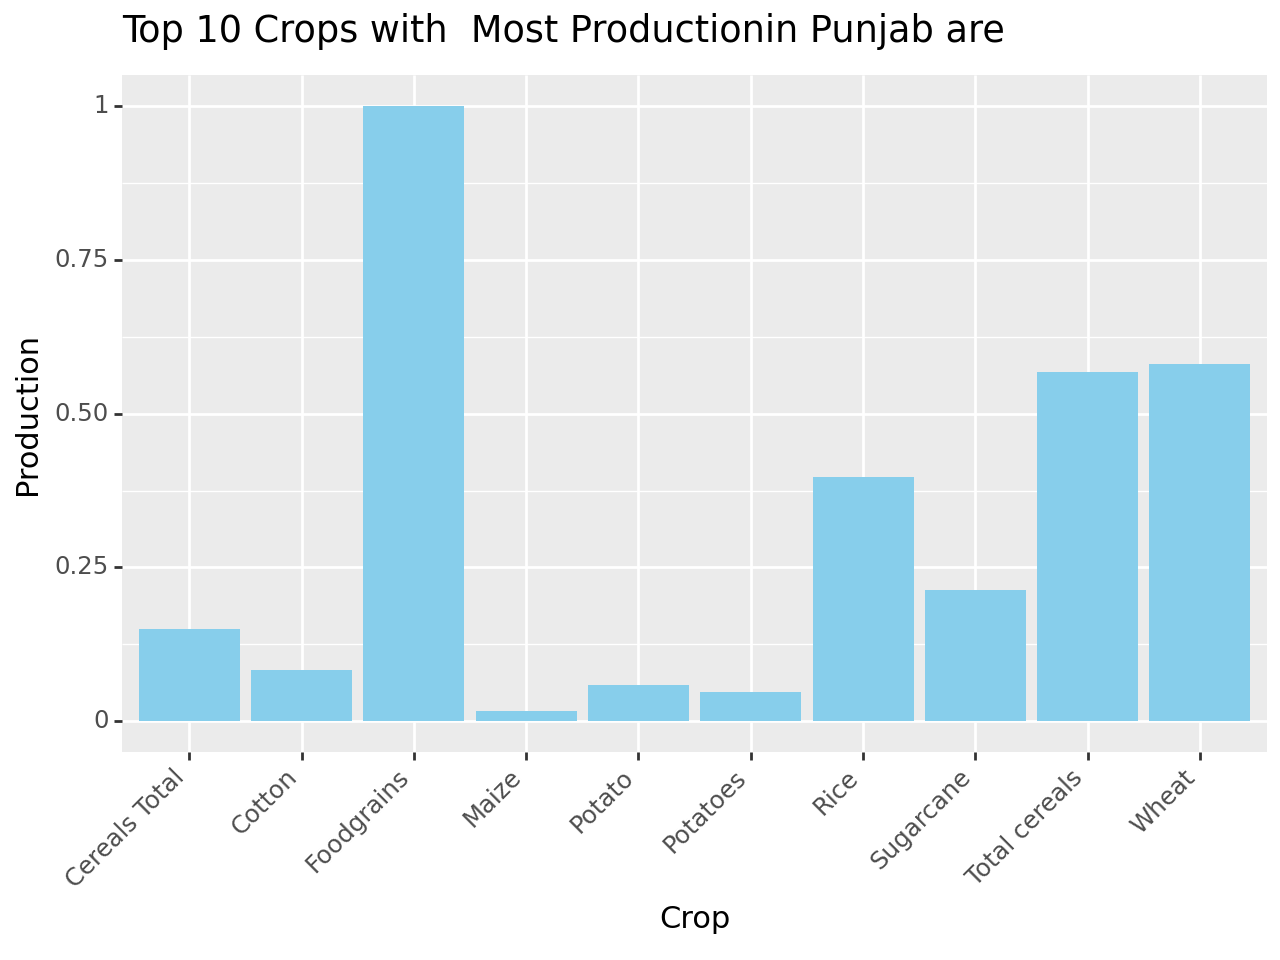

In [852]:
plot_top_n_crops(prod_Punjab, crop_names, 10, 'Punjab', 'Production', True)

It shows that Punjab focuses more on multiple crops harvesting. (As Foodgrains also contain many different types of grains).

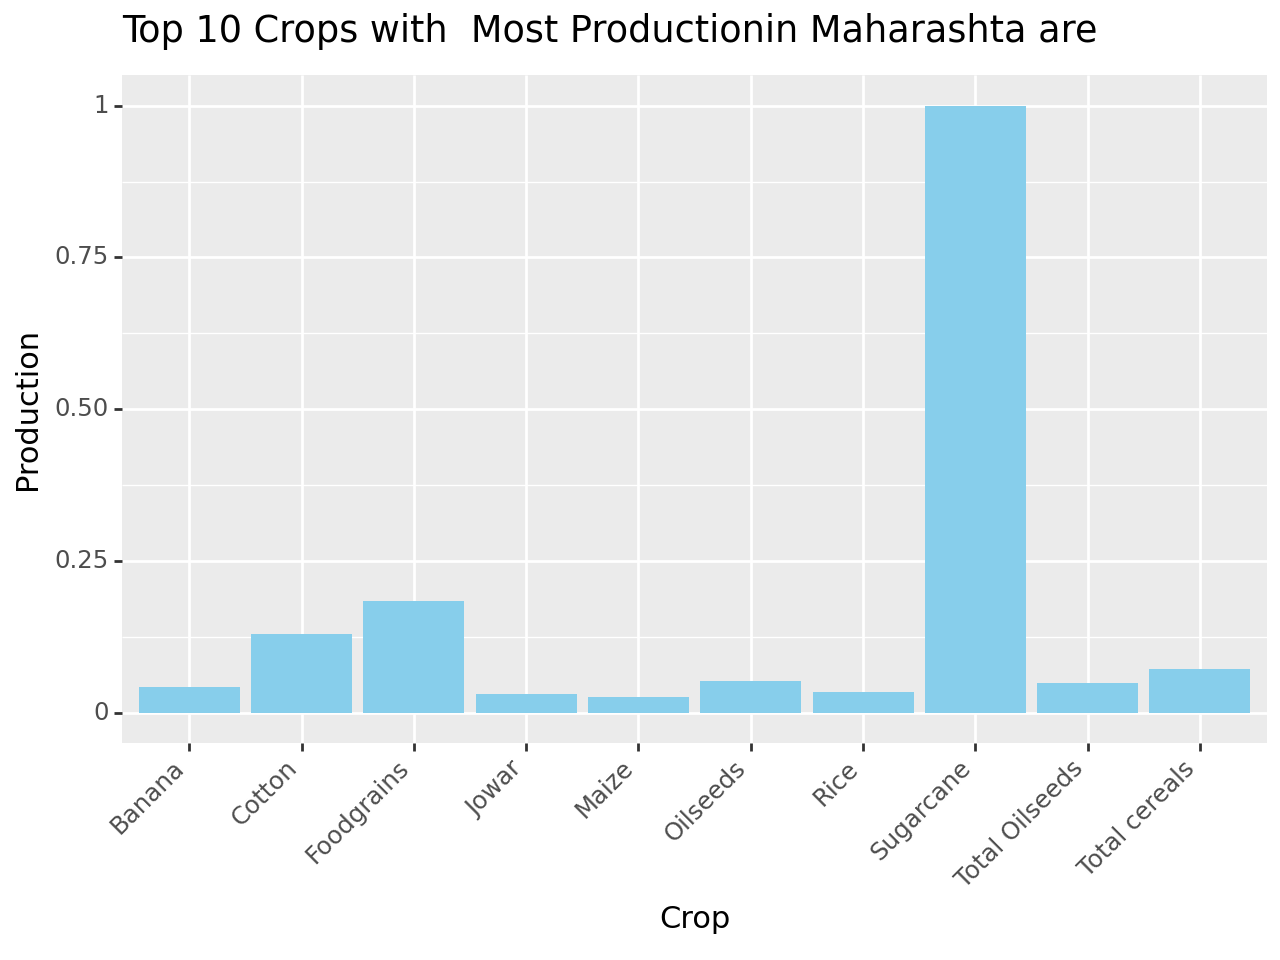

In [853]:
plot_top_n_crops(prod_Maharashtra, crop_names, 10, 'Maharashta', 'Production', True)

Maharashtra also focuses on one crop.

I have used **normalisation** because :




*  Without normalization, crops with higher absolute production may visually dominate the graph, making it challenging to discern the relative importance of other crops.
*   Highlighting relative contributions: It emphasizes each crop's proportionate contribution to total production, aiding in understanding their importance.





 I have used bar graph because:


*    Comparison: Bar graphs make it easy to compare the production levels of different crops at a glance, allowing stakeholders to quickly identify the most and least produced crops.
*   They effectively represent absolute production values, giving a concrete sense of the scale of crop production.


*   Space Efficiency: With only 10 crops being plotted, a bar graph can efficiently present the data without overwhelming the viewer with excessive information.







In [854]:
yield_UP = df_st_avg_yield_09_16[df_st_avg_yield_09_16['State/ UT Name'] == 'Uttar Pradesh']
yield_Punjab = df_st_avg_yield_09_16[df_st_avg_yield_09_16['State/ UT Name'] == 'Punjab']
yield_Maharashtra = df_st_avg_yield_09_16[df_st_avg_yield_09_16['State/ UT Name'] == 'Maharashtra']

In [855]:
def preprocessing_yield_dataframe(df):
  df_temp = df.copy()
  MT_to_tonnes = 1.1203
  keyword = 'MT'
  df_temp = multiply_columns_by_factor(df_temp, MT_to_tonnes,keyword )

  df_temp.columns = df_temp.columns.str.replace('Foodgrains(cereals) - ', '')
  df_temp.columns = df_temp.columns.str.replace('-(Production is Thausand Toones)', '')
  df_temp.columns = df_temp.columns.str.replace('(Th. tonnes)-', '')
  df_temp.columns = df_temp.columns.str.replace('(MT)-', '')
  df_temp.columns = df_temp.columns.str.replace('***', '')
  df_temp.columns = df_temp.columns.str.replace('(Total) ', '')
  df_temp.columns = df_temp.columns.str.replace('(Kharif) ', '')
  return df_temp

In [856]:
yield_UP = preprocessing_yield_dataframe(yield_UP)
yield_Punjab = preprocessing_yield_dataframe(yield_Punjab)
yield_Maharashtra = preprocessing_yield_dataframe(yield_Maharashtra)

In [857]:
# yield_UP.columns

In [858]:
yield_UP.drop(columns = ['State/ UT Name'], inplace = True)
yield_Maharashtra.drop(columns = ['State/ UT Name'], inplace = True)
yield_Punjab.drop(columns = ['State/ UT Name'], inplace = True)

In [859]:
yield_UP.replace('#', pd.NA, inplace=True)
yield_UP.fillna(0, inplace=True)
yield_UP = yield_UP.astype(float)

In [860]:
yield_Punjab.replace('#', pd.NA, inplace=True)
yield_Punjab.replace('#DIV/0!', pd.NA, inplace=True)
yield_Punjab.fillna(0, inplace=True)
yield_Punjab = yield_Punjab.astype(float)

In [861]:
yield_Maharashtra.replace('#', pd.NA, inplace=True)
yield_Maharashtra.fillna(0, inplace=True)
yield_Maharashtra = yield_Maharashtra.astype(float)

In [862]:
crop_names_yield = set([col.split('-')[0].strip() for col in prod_UP.columns])
crop_names_yield = list(crop_names_yield)

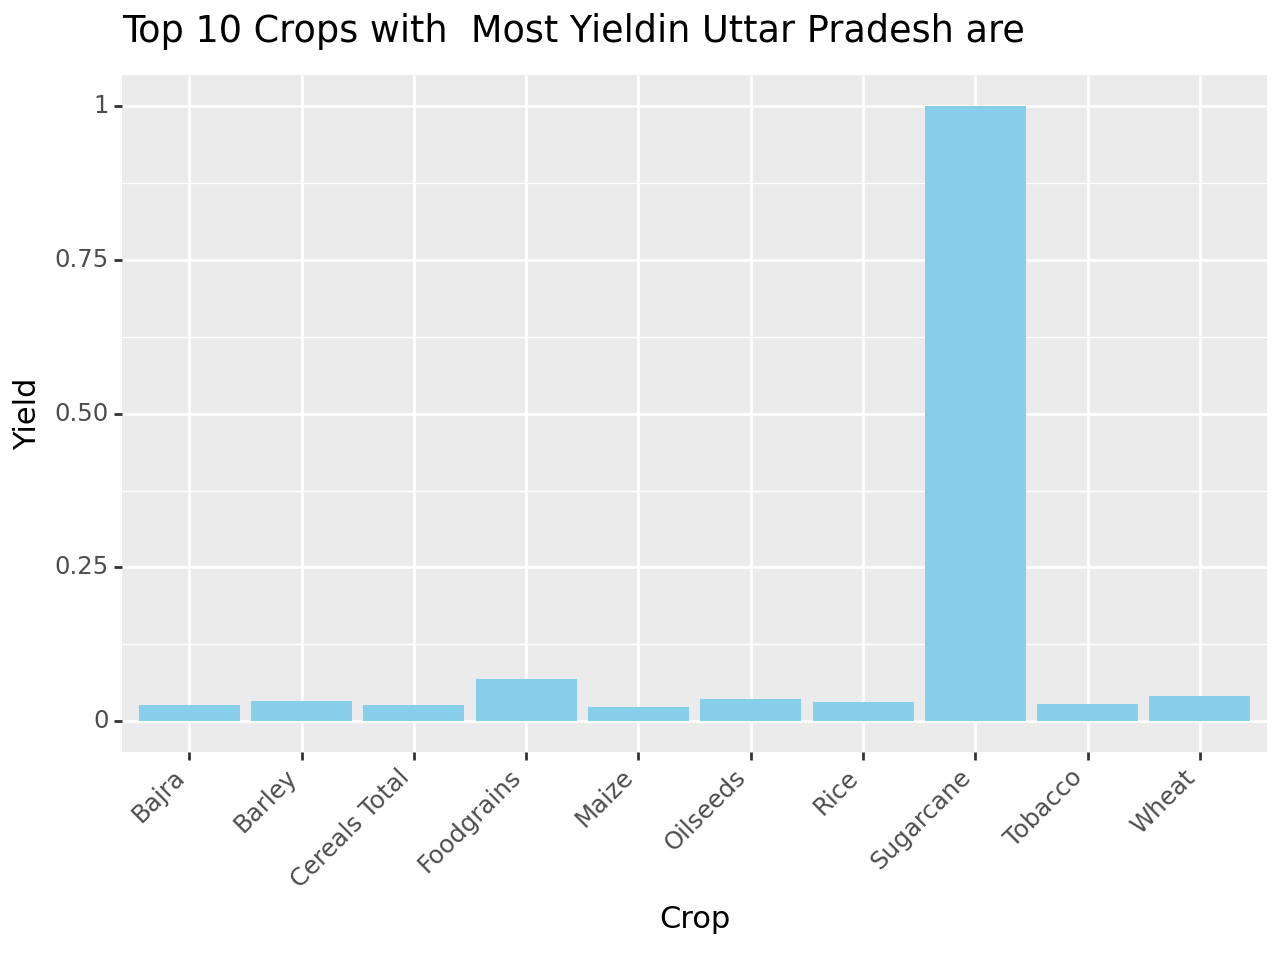

In [863]:
plot_top_n_crops(yield_UP, crop_names_yield, 10, 'Uttar Pradesh', 'Yield', True)

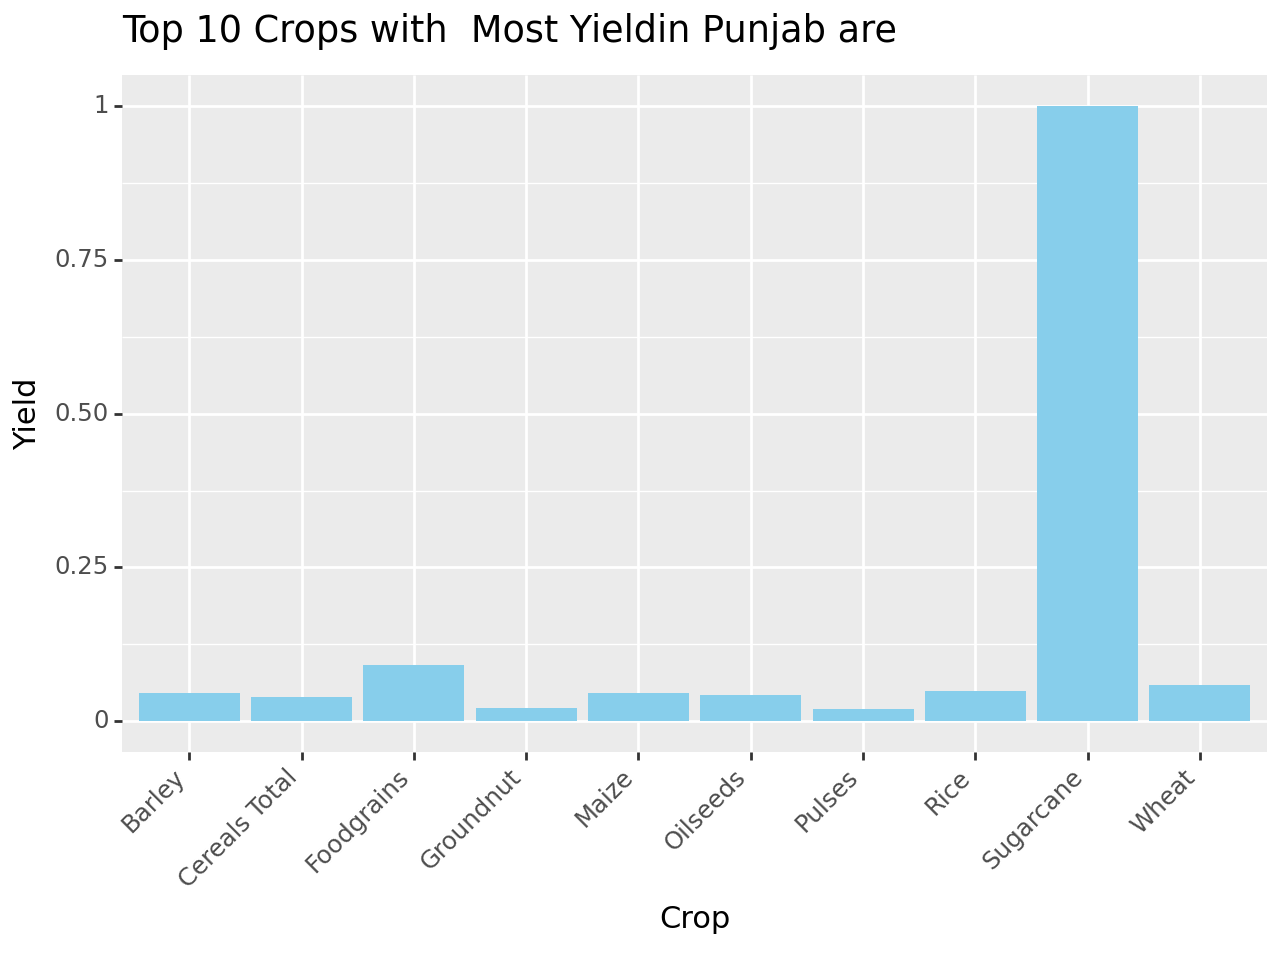

In [864]:
plot_top_n_crops(yield_Punjab, crop_names_yield, 10, 'Punjab', 'Yield', True)

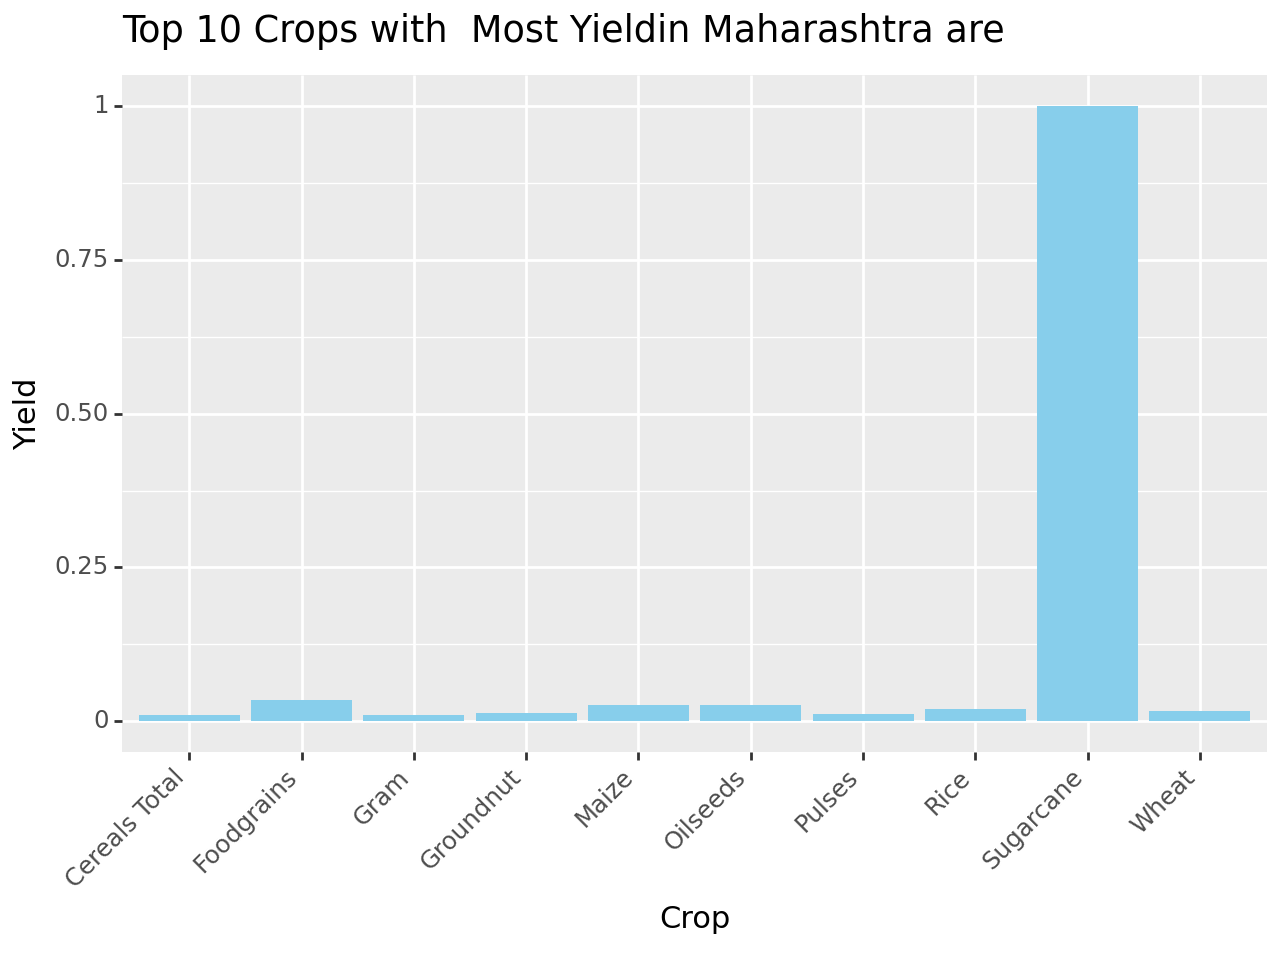

In [865]:
plot_top_n_crops(yield_Maharashtra, crop_names_yield, 10, 'Maharashtra', 'Yield', True)

All these graphs shows that sugarcane have very high yield irrespective of place.

I have used normalisation because :

Without normalization, crops with higher absolute production may visually dominate the graph, making it challenging to discern the relative importance of other crops.
Highlighting relative contributions: It emphasizes each crop's proportionate contribution to total production, aiding in understanding their importance.

I have used bar graph because:

Comparison: Bar graphs make it easy to compare the production levels of different crops at a glance, allowing stakeholders to quickly identify the most and least produced crops.
They effectively represent absolute production values, giving a concrete sense of the scale of crop production.
Space Efficiency: With only 10 crops being plotted, a bar graph can efficiently present the data without overwhelming the viewer with excessive information.

In [866]:
def reformat_crop_data(df):
    # Initialize lists to store extracted values
    crop_names = []
    start_years = []
    end_years = []
    values = []
    years = []

    # Iterate through the columns
    for col in df.columns:
        # Split the column name to extract crop name and year range
        parts = col.split('-')
        crop_name = parts[0]
        year_range = parts[1].split('-')
        start_year = year_range[0]
        end_year = parts[2]
        if (start_year) == '(000MT)' or start_year =='(000 Bales)':
          start_year = str(int(end_year) -1)
          end_year = end_year[-2]+end_year[-1]
        year = start_year+'-'+end_year

        # Store extracted values
        crop_names.append(crop_name)
        start_years.append(start_year)
        end_years.append(end_year)
        years.append(year)

        # Extract values from the column
        values.append(df[col].values[0])  # Assuming there's only one row for each crop

    # Create a new DataFrame with extracted values
    reformatted_df = pd.DataFrame({
        'Crop_Type': crop_names,
        'Year': years,
        'Value': values
    })

    return reformatted_df




In [867]:
prod_UP_pivoted = reformat_crop_data(prod_UP)
prod_Punjab_pivoted = reformat_crop_data(prod_Punjab)
prod_Maharashtra_pivoted = reformat_crop_data(prod_Maharashtra)

In [868]:
top_10_Punjab_prod_crops = top_n_crops_names(prod_Punjab, crop_names, 10)
top_10_Maharashtra_prod_crops = top_n_crops_names(prod_Maharashtra, crop_names, 10)

In [869]:
prod_UP_pivoted = prod_UP_pivoted[prod_UP_pivoted['Crop_Type'].isin(top_10_UP_prod_crops)]
prod_Punjab_pivoted = prod_Punjab_pivoted[prod_Punjab_pivoted['Crop_Type'].isin(top_10_Punjab_prod_crops)]
prod_Maharashtra_pivoted = prod_Maharashtra_pivoted[prod_Maharashtra_pivoted['Crop_Type'].isin(top_10_Maharashtra_prod_crops)]

In [870]:
def plot_crop_production_trend(df, title):
    plot = (ggplot(df, aes(x='Year', y='Value', color='Crop_Type', group='Crop_Type')) +
            geom_line(linetype='dotted') +
            geom_point() +
            labs(title=f'{title}',
                 x='Year', y='Production Value(kilo tonnes)') +
            theme_minimal() +
            theme(axis_text_x=element_text(angle=45, hjust=1))
            )
    print(plot)

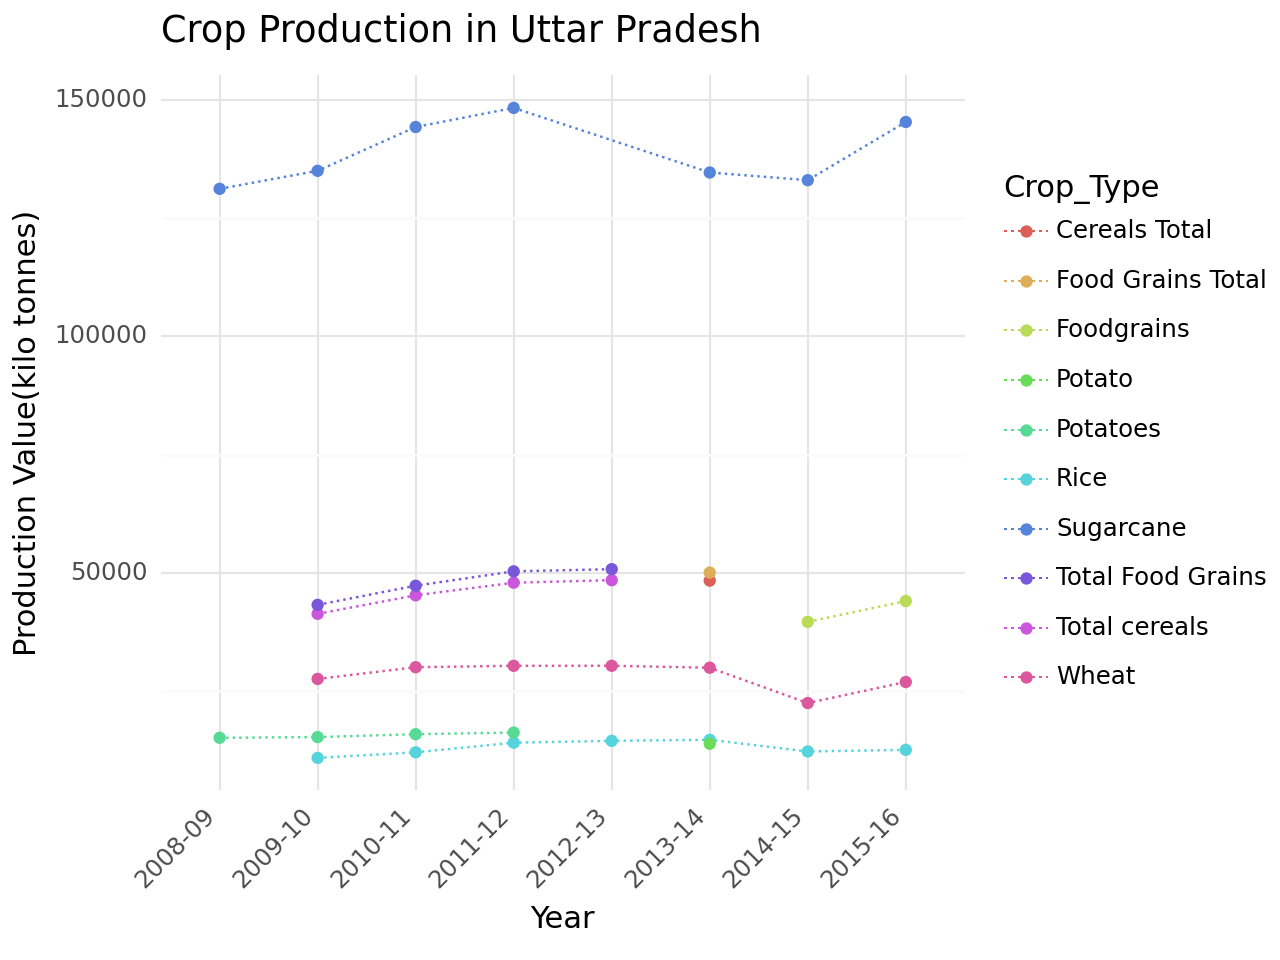

In [871]:
plot_crop_production_trend(prod_UP_pivoted, 'Crop Production in Uttar Pradesh')

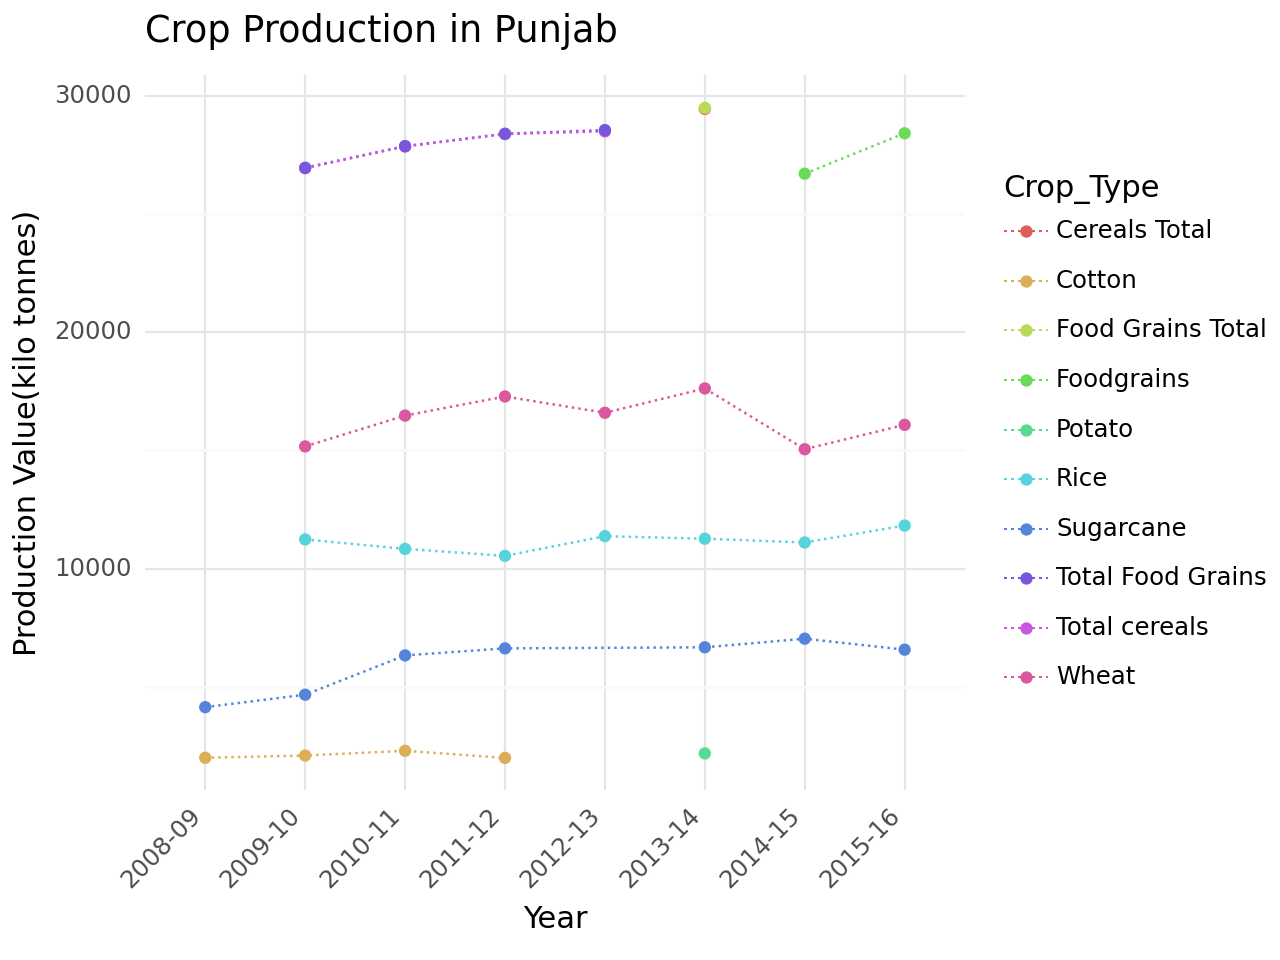

In [872]:
plot_crop_production_trend(prod_Punjab_pivoted, 'Crop Production in Punjab')

It can be seen that the relative production of crops did not chane much in comparison to each other.

**Cost Estimates of Crops**

In [873]:
cost_UP = df_st_cost_production_major_5_2008_14[df_st_cost_production_major_5_2008_14['State/ UT Name'] == 'Uttar Pradesh']
cost_Punjab = df_st_cost_production_major_5_2008_14[df_st_cost_production_major_5_2008_14['State/ UT Name'] == 'Punjab']
cost_Maharashtra = df_st_cost_production_major_5_2008_14[df_st_cost_production_major_5_2008_14['State/ UT Name'] == 'Maharashtra']

In [874]:
cost_names = ['Cost_of_Cultivation_C2', 'Cost_of_Cultivation_A2_FL', 'Cost_of_Production_C2']


In [875]:
def reformat_cost_data(df):
    crop_names = []
    years = []
    cost_of_cultivation_C2 = []
    cost_of_cultivation_A2_FL = []
    cost_of_production_C2 = []

    # Iterate over rows and columns
    for index, row in df.iterrows():

        for col in df.columns[2:]:
            # Extract crop name, state name, and year
            parts = col.split(' - ')
            crop_names.append(df['Crop'][index])
            years.append(parts[2])

            # Extract values from the column
            if 'Production' in col:
                cost_of_production_C2.append(row[col])  # Get the value from the current row
                cost_of_cultivation_A2_FL.append(None)  # No value for A2+FL in C2 columns
                cost_of_cultivation_C2.append(None)  # No value for production cost in C2 columns
            elif 'A2+FL' in col:
                cost_of_cultivation_A2_FL.append(row[col])  # Get the value from the current row
                cost_of_cultivation_C2.append(None)  # No value for C2 in A2+FL columns
                cost_of_production_C2.append(None)  # No value for production cost in A2+FL columns
            else:
                cost_of_cultivation_C2.append(row[col])  # Get the value from the current row
                cost_of_production_C2.append(None)  # No value for C2 in production cost columns
                cost_of_cultivation_A2_FL.append(None)  # No value for A2+FL in production cost columns

    # Create a new DataFrame with extracted values
    reformatted_df = pd.DataFrame({
        'Crop': crop_names,
        'Year': years,
        'Cost_of_Cultivation_C2': cost_of_cultivation_C2,
        'Cost_of_Cultivation_A2_FL': cost_of_cultivation_A2_FL,
        'Cost_of_Production_C2': cost_of_production_C2
    })

    return reformatted_df

In [876]:
pivot_cost_UP = reformat_cost_data(cost_UP)
pivot_cost_Punjab = reformat_cost_data(cost_Punjab)
pivot_cost_Maharashtra = reformat_cost_data(cost_Maharashtra)

In [877]:
cc2_UP_df = pivot_cost_UP[pivot_cost_UP['Cost_of_Cultivation_C2'].notnull()]
ccAF_UP_df = pivot_cost_UP[pivot_cost_UP['Cost_of_Cultivation_A2_FL'].notnull()]
cp_UP_df = pivot_cost_UP[pivot_cost_UP['Cost_of_Production_C2'].notnull()]

In [878]:
cc2_Punjab_df = pivot_cost_Punjab[pivot_cost_Punjab['Cost_of_Cultivation_C2'].notnull()]
ccAF_Punjab_df = pivot_cost_Punjab[pivot_cost_Punjab['Cost_of_Cultivation_A2_FL'].notnull()]
cp_Punjab_df = pivot_cost_Punjab[pivot_cost_Punjab['Cost_of_Production_C2'].notnull()]

In [879]:
cc2_Maharashtra_df = pivot_cost_Maharashtra[pivot_cost_Maharashtra['Cost_of_Cultivation_C2'].notnull()]
ccAF_Maharashtra_df = pivot_cost_Maharashtra[pivot_cost_Maharashtra['Cost_of_Cultivation_A2_FL'].notnull()]
cp_Maharashtra_df = pivot_cost_Maharashtra[pivot_cost_Maharashtra['Cost_of_Production_C2'].notnull()]

In [880]:
def plot_cost(df,y, title, ylabel):
    plot = (ggplot(df, aes(x='Year', y=f'{y}', color='Crop', group='Crop')) +
            geom_line(linetype='dotted') +
            geom_point() +
            labs(title=f'{title}',
                 x='Year', y=f'{ylabel}') +
            theme_minimal() +
            theme(axis_text_x=element_text(angle=0, hjust=1), figure_size=(10, 5))
            )
    return (plot)

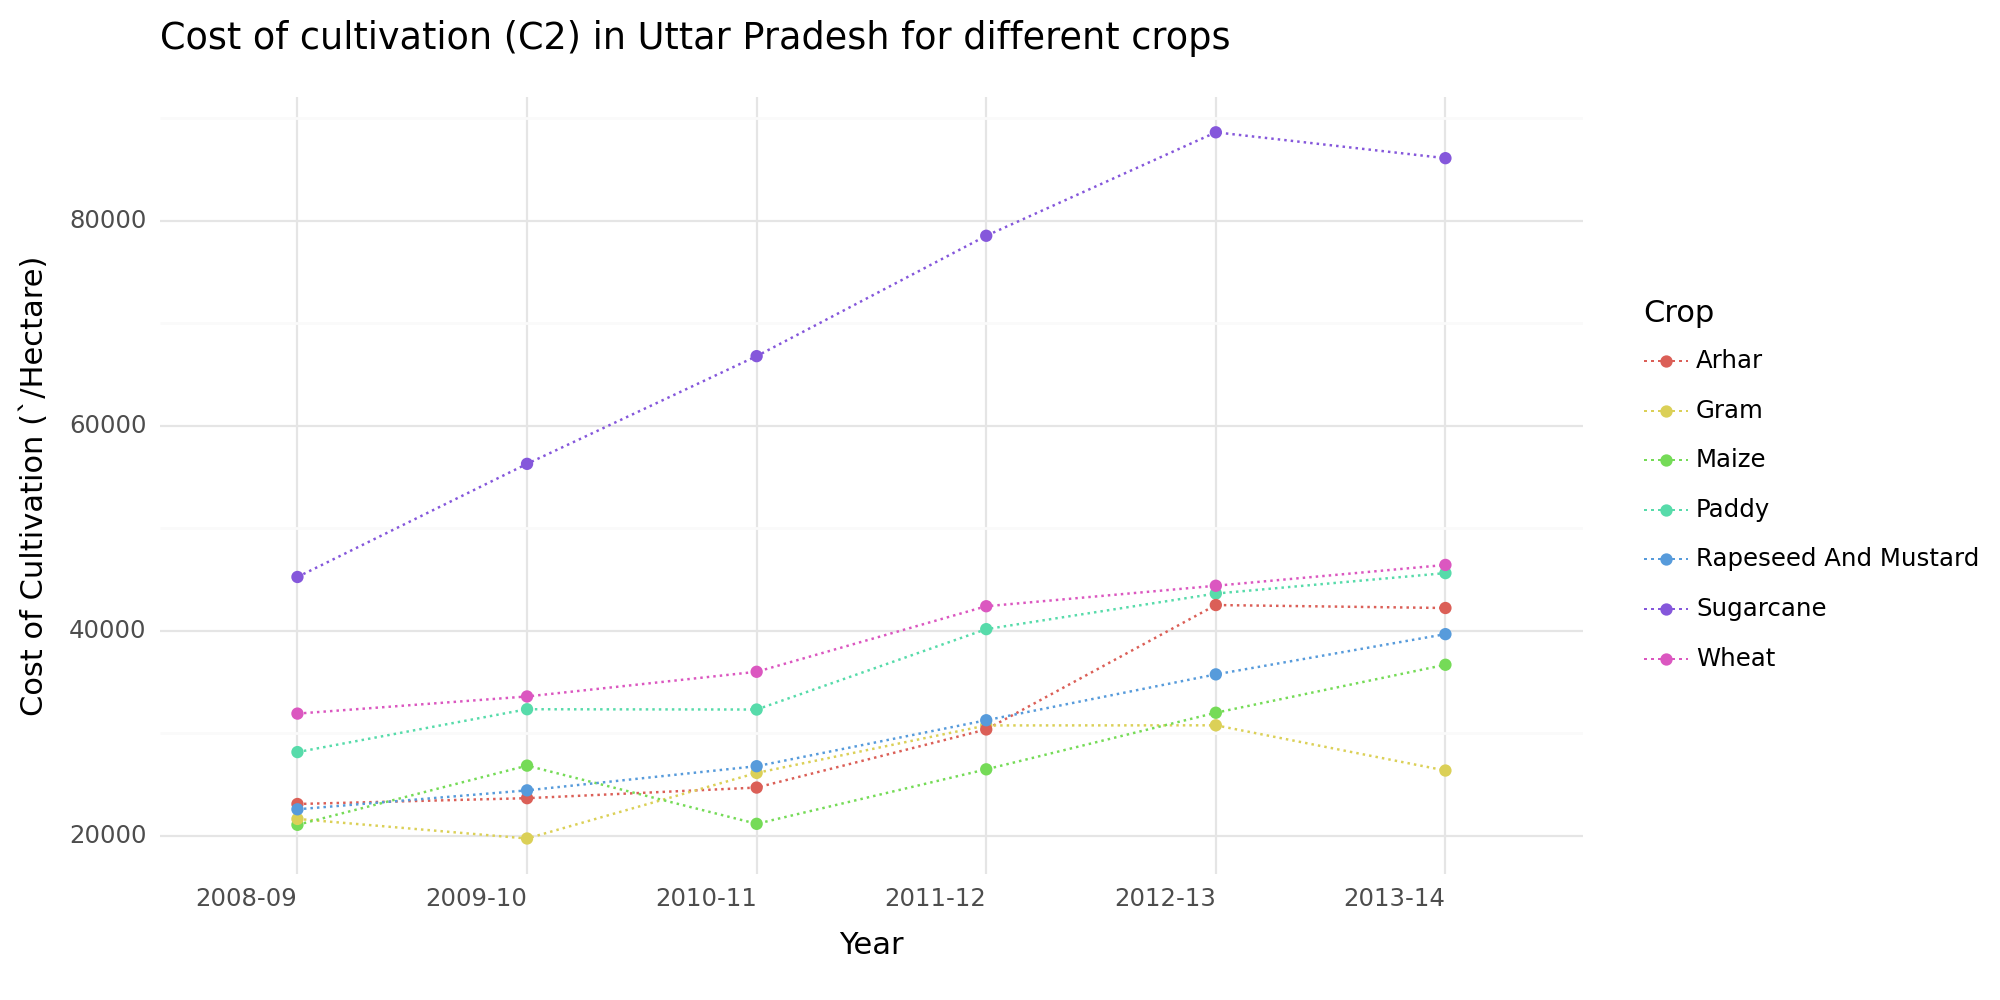

In [881]:
p1 = plot_cost(cc2_UP_df, 'Cost_of_Cultivation_C2', 'Cost of cultivation (C2) in Uttar Pradesh for different crops', 'Cost of Cultivation (`/Hectare)')
print(p1)

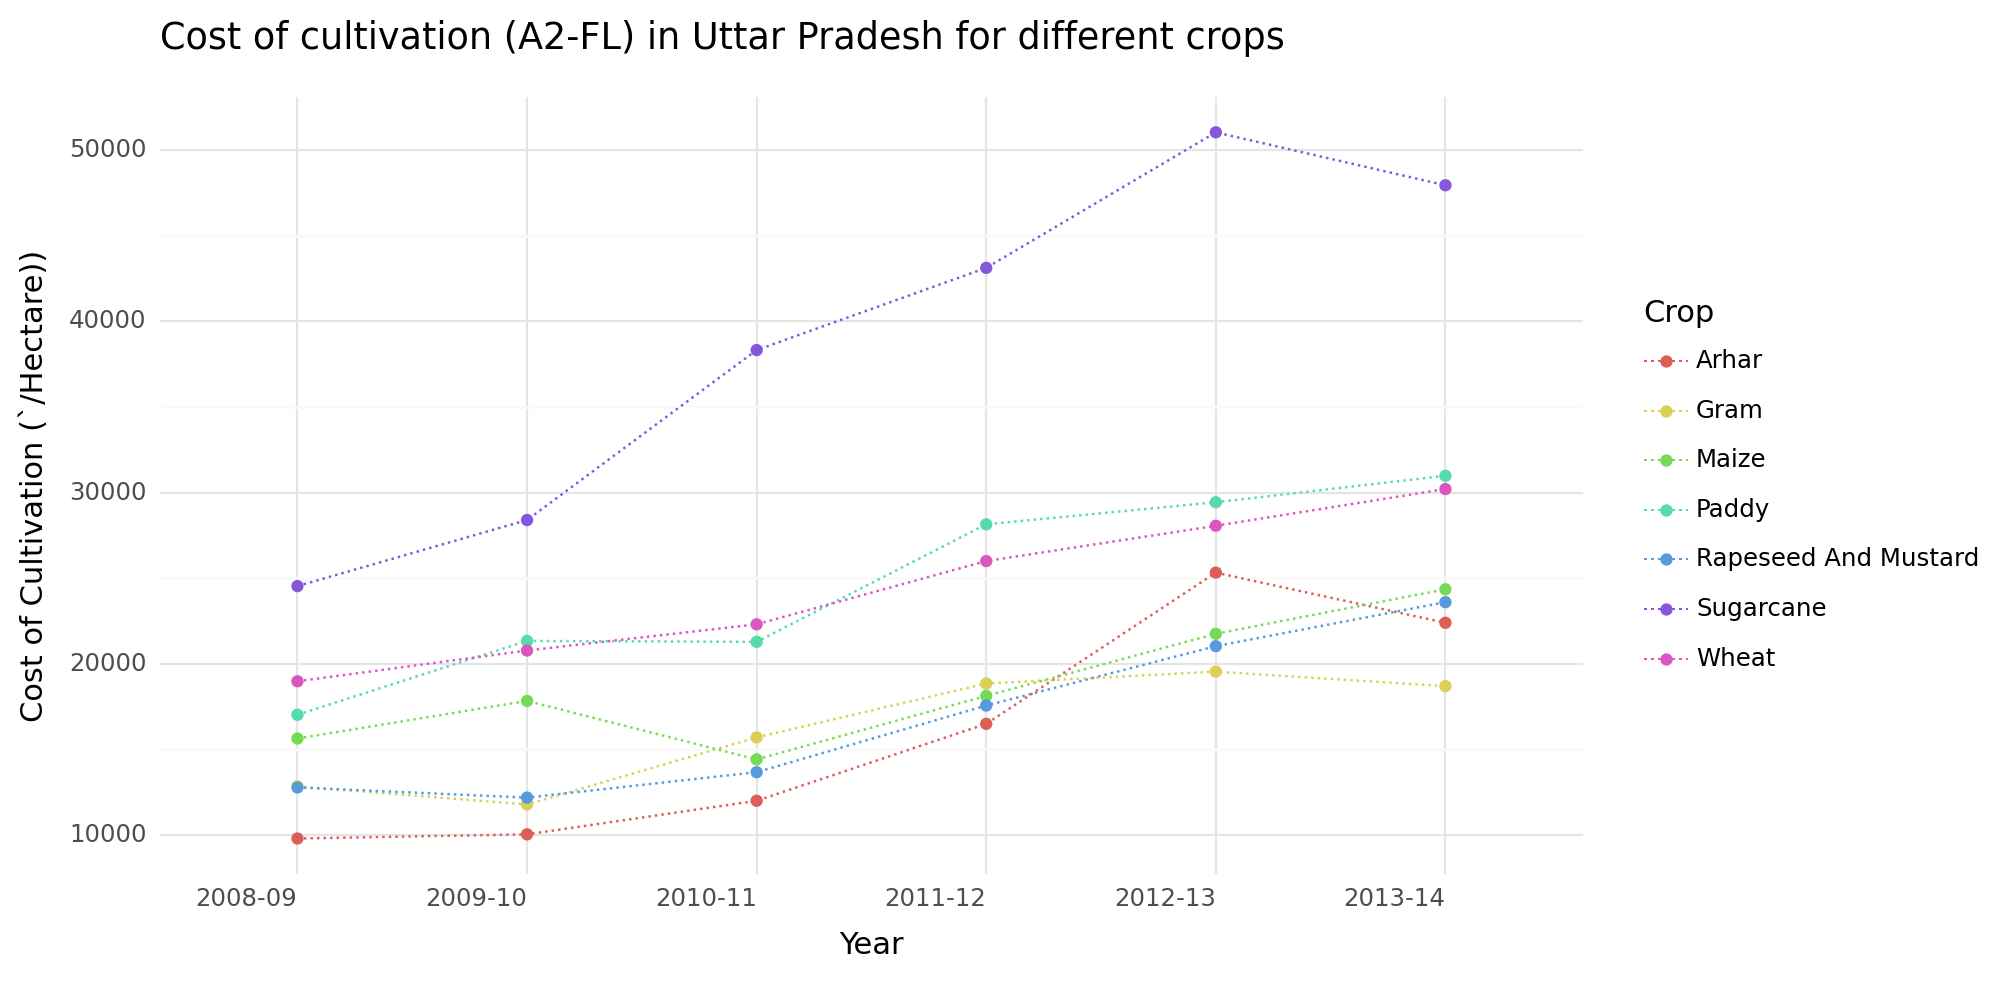

In [882]:
p2 = plot_cost(ccAF_UP_df, 'Cost_of_Cultivation_A2_FL', 'Cost of cultivation (A2-FL) in Uttar Pradesh for different crops', 'Cost of Cultivation (`/Hectare))')
print(p2)


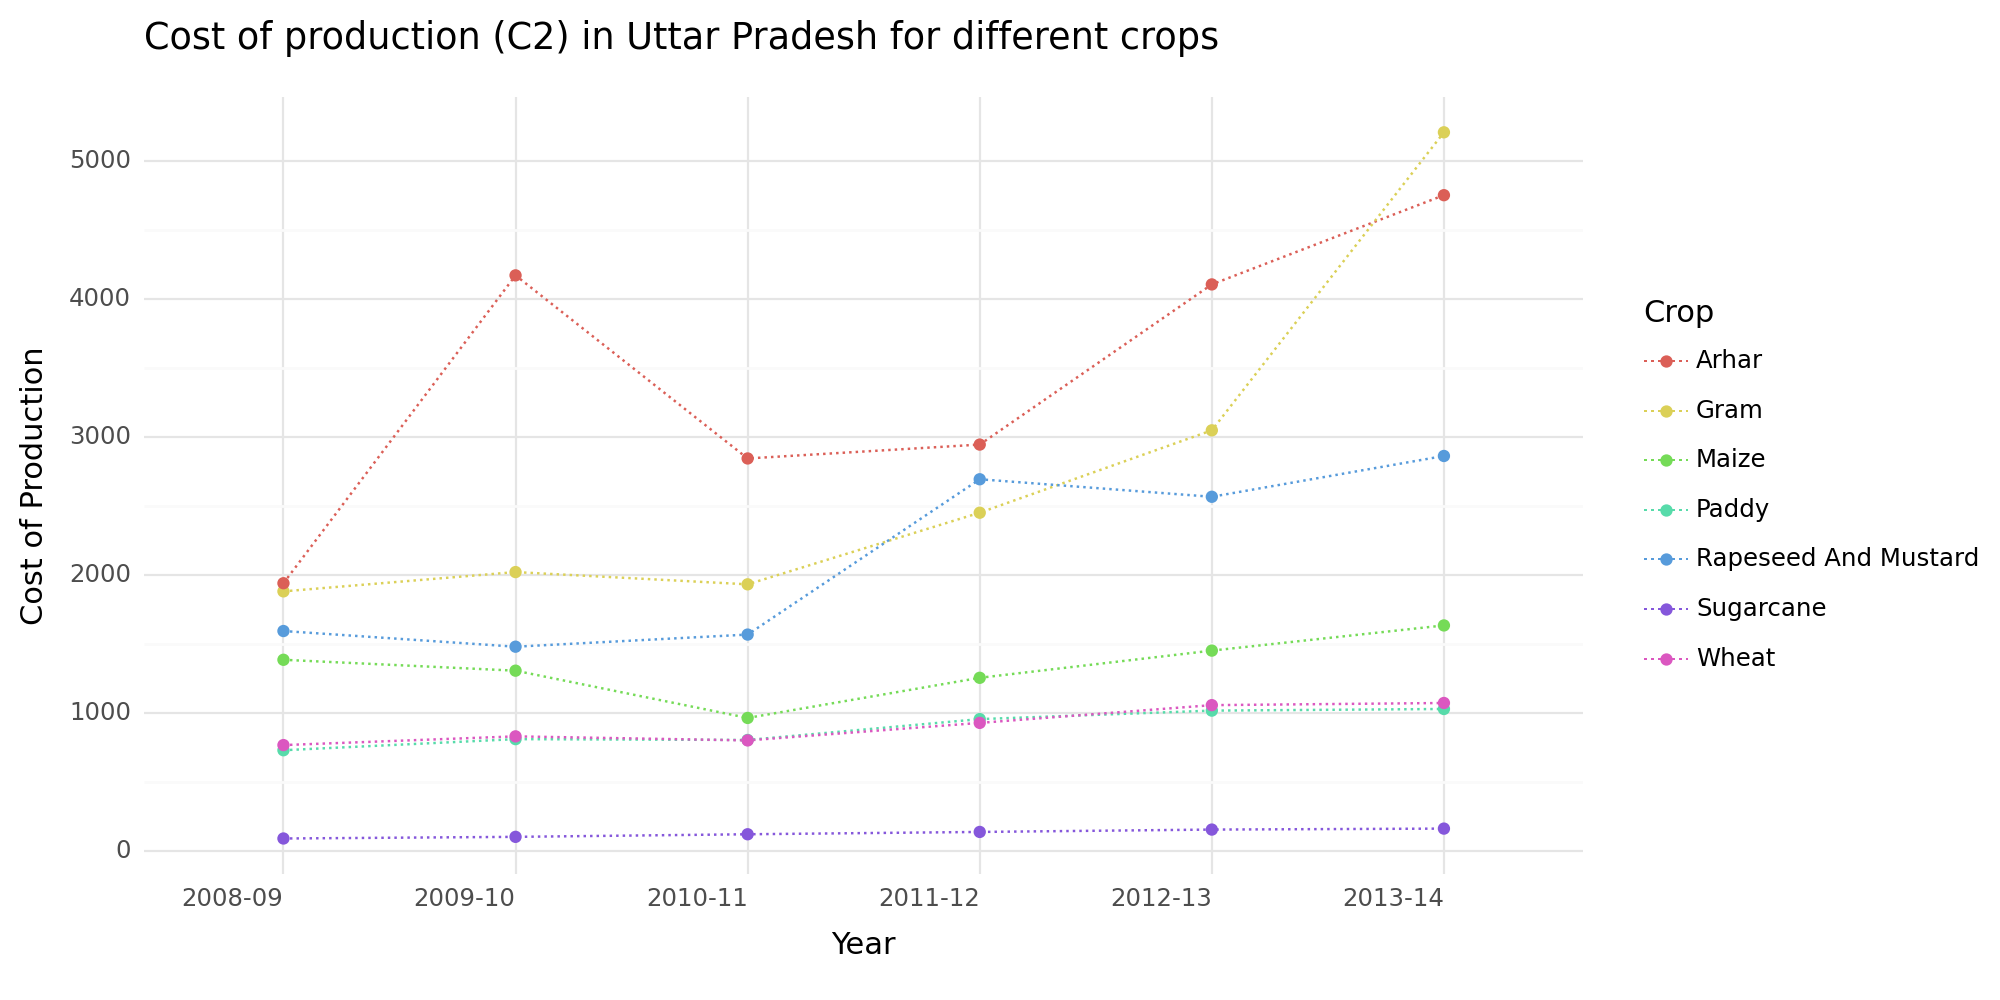

In [883]:
p3 = plot_cost(cp_UP_df, 'Cost_of_Production_C2', 'Cost of production (C2) in Uttar Pradesh for different crops', 'Cost of Production')
print(p3)

In general, the cost(all types) is increasing over the years

In [884]:
total_cc2_UP = cc2_UP_df.groupby('Year').sum()
total_cp_UP = cp_UP_df.groupby('Year').sum()
total_ccAF_UP = ccAF_UP_df.groupby('Year').sum()
total_cc2_UP.drop(columns = ['Crop', 'Cost_of_Cultivation_A2_FL', 'Cost_of_Production_C2'], inplace = True)
total_cp_UP.drop(columns = ['Crop', 'Cost_of_Cultivation_A2_FL', 'Cost_of_Cultivation_C2'], inplace = True)
total_ccAF_UP.drop(columns = ['Crop', 'Cost_of_Cultivation_C2', 'Cost_of_Production_C2'], inplace = True)

In [885]:
total_cc2_Punjab = cc2_Punjab_df.groupby('Year').sum()
total_cp_Punjab = cp_Punjab_df.groupby('Year').sum()
total_ccAF_Punjab = ccAF_Punjab_df.groupby('Year').sum()
total_cc2_Punjab.drop(columns = ['Crop', 'Cost_of_Cultivation_A2_FL', 'Cost_of_Production_C2'], inplace = True)
total_cp_Punjab.drop(columns = ['Crop', 'Cost_of_Cultivation_A2_FL', 'Cost_of_Cultivation_C2'], inplace = True)
total_ccAF_Punjab.drop(columns = ['Crop', 'Cost_of_Cultivation_C2', 'Cost_of_Production_C2'], inplace = True)

In [886]:
total_cc2_Maharashtra = cc2_Maharashtra_df.groupby('Year').sum()
total_cp_Maharashtra = cp_Maharashtra_df.groupby('Year').sum()
total_ccAF_Maharashtra = ccAF_Maharashtra_df.groupby('Year').sum()
total_cc2_Maharashtra.drop(columns = ['Crop', 'Cost_of_Cultivation_A2_FL', 'Cost_of_Production_C2'], inplace = True)
total_cp_Maharashtra.drop(columns = ['Crop', 'Cost_of_Cultivation_A2_FL', 'Cost_of_Cultivation_C2'], inplace = True)
total_ccAF_Maharashtra.drop(columns = ['Crop', 'Cost_of_Cultivation_C2', 'Cost_of_Production_C2'], inplace = True)

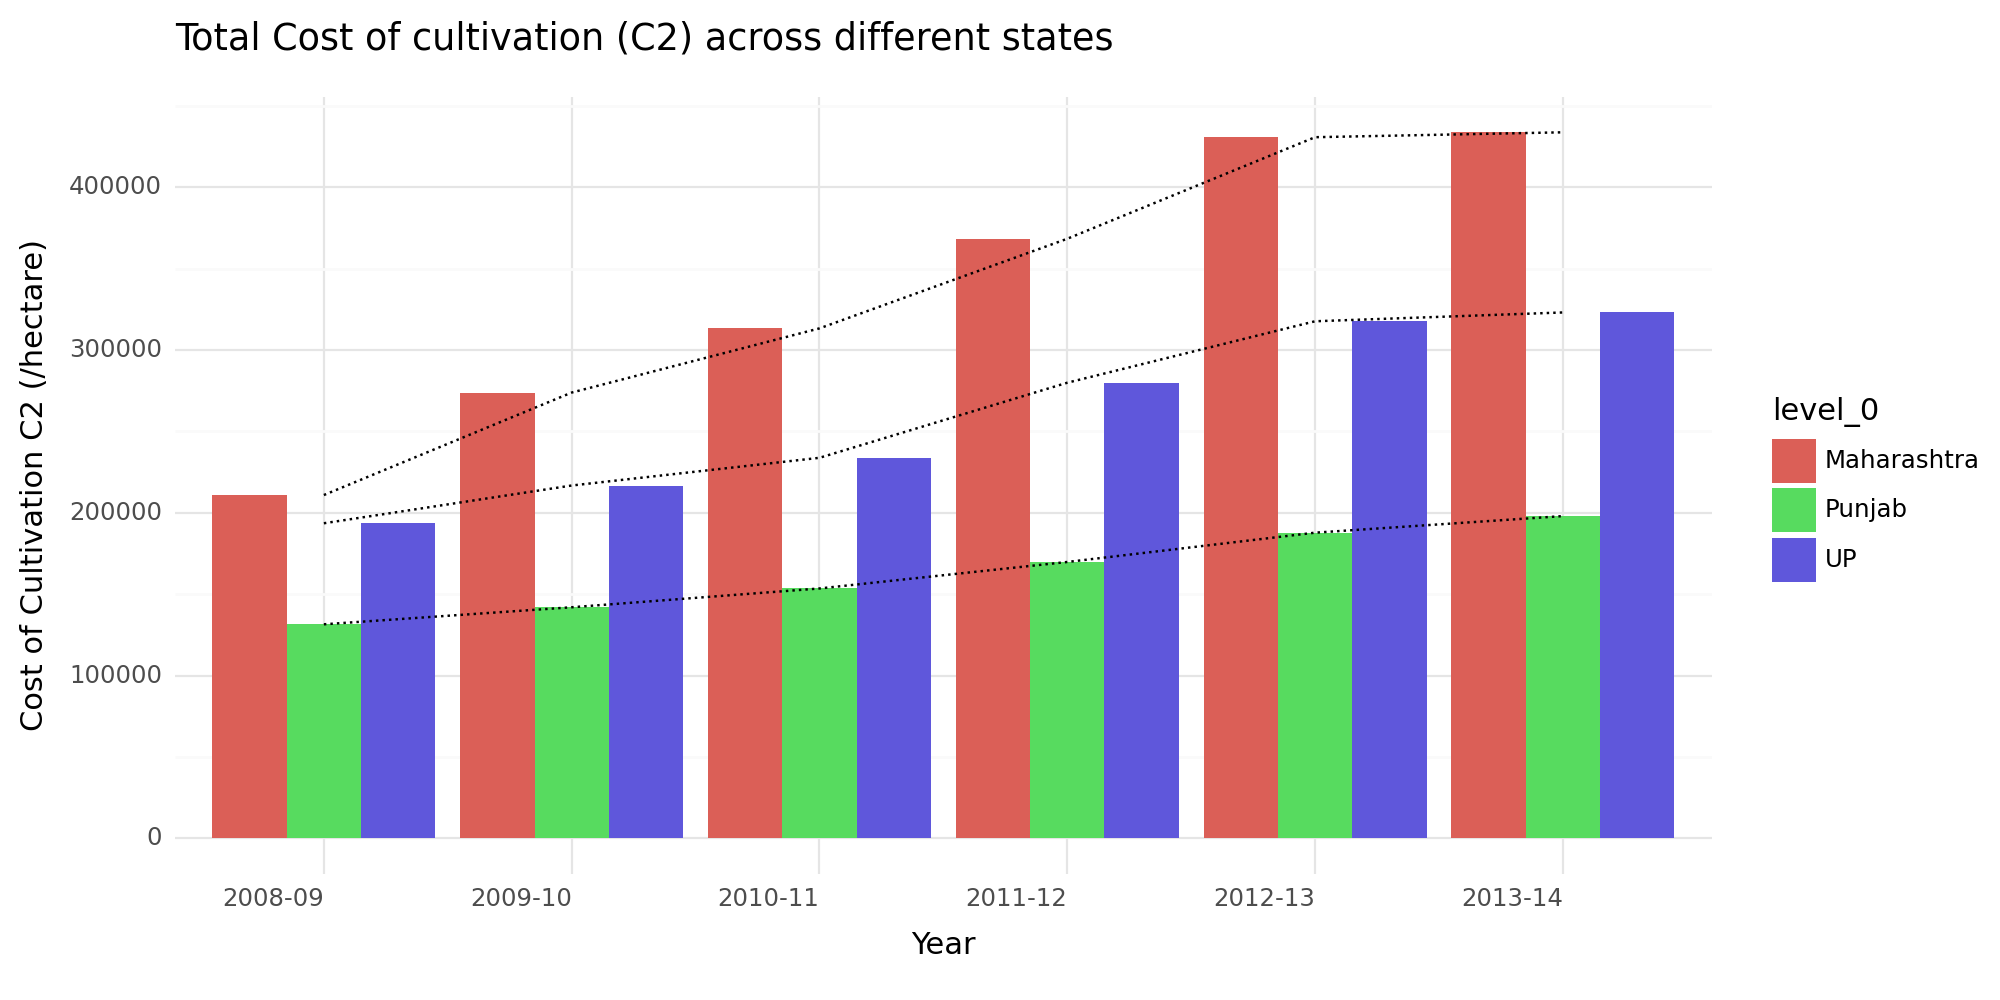

In [887]:
combined_df = pd.concat([total_cc2_UP, total_cc2_Punjab, total_cc2_Maharashtra], keys=['UP', 'Punjab', 'Maharashtra'])

# Reset the index to make the keys accessible as a column
combined_df.reset_index(inplace=True)


plot = (ggplot(combined_df, aes(x='Year', y='Cost_of_Cultivation_C2', fill='level_0', group='level_0')) +
        geom_bar(stat='identity', position='dodge') +
        geom_line(data=combined_df[combined_df['level_0'] == 'UP'], mapping=aes(group=1), linetype='dotted', color='black') +
        geom_line(data=combined_df[combined_df['level_0'] == 'Maharashtra'], mapping=aes(group=0), linetype='dotted', color='black') +
        geom_line(data=combined_df[combined_df['level_0'] == 'Punjab'], mapping=aes(group=2), linetype='dotted', color='black') +
        theme_minimal() +
        labs(title='Total Cost of cultivation (C2) across different states', x='Year', y='Cost of Cultivation C2 (/hectare)')+
        theme(axis_text_x=element_text(angle=0, hjust=1), figure_size = (10,5))

       )
print(plot)


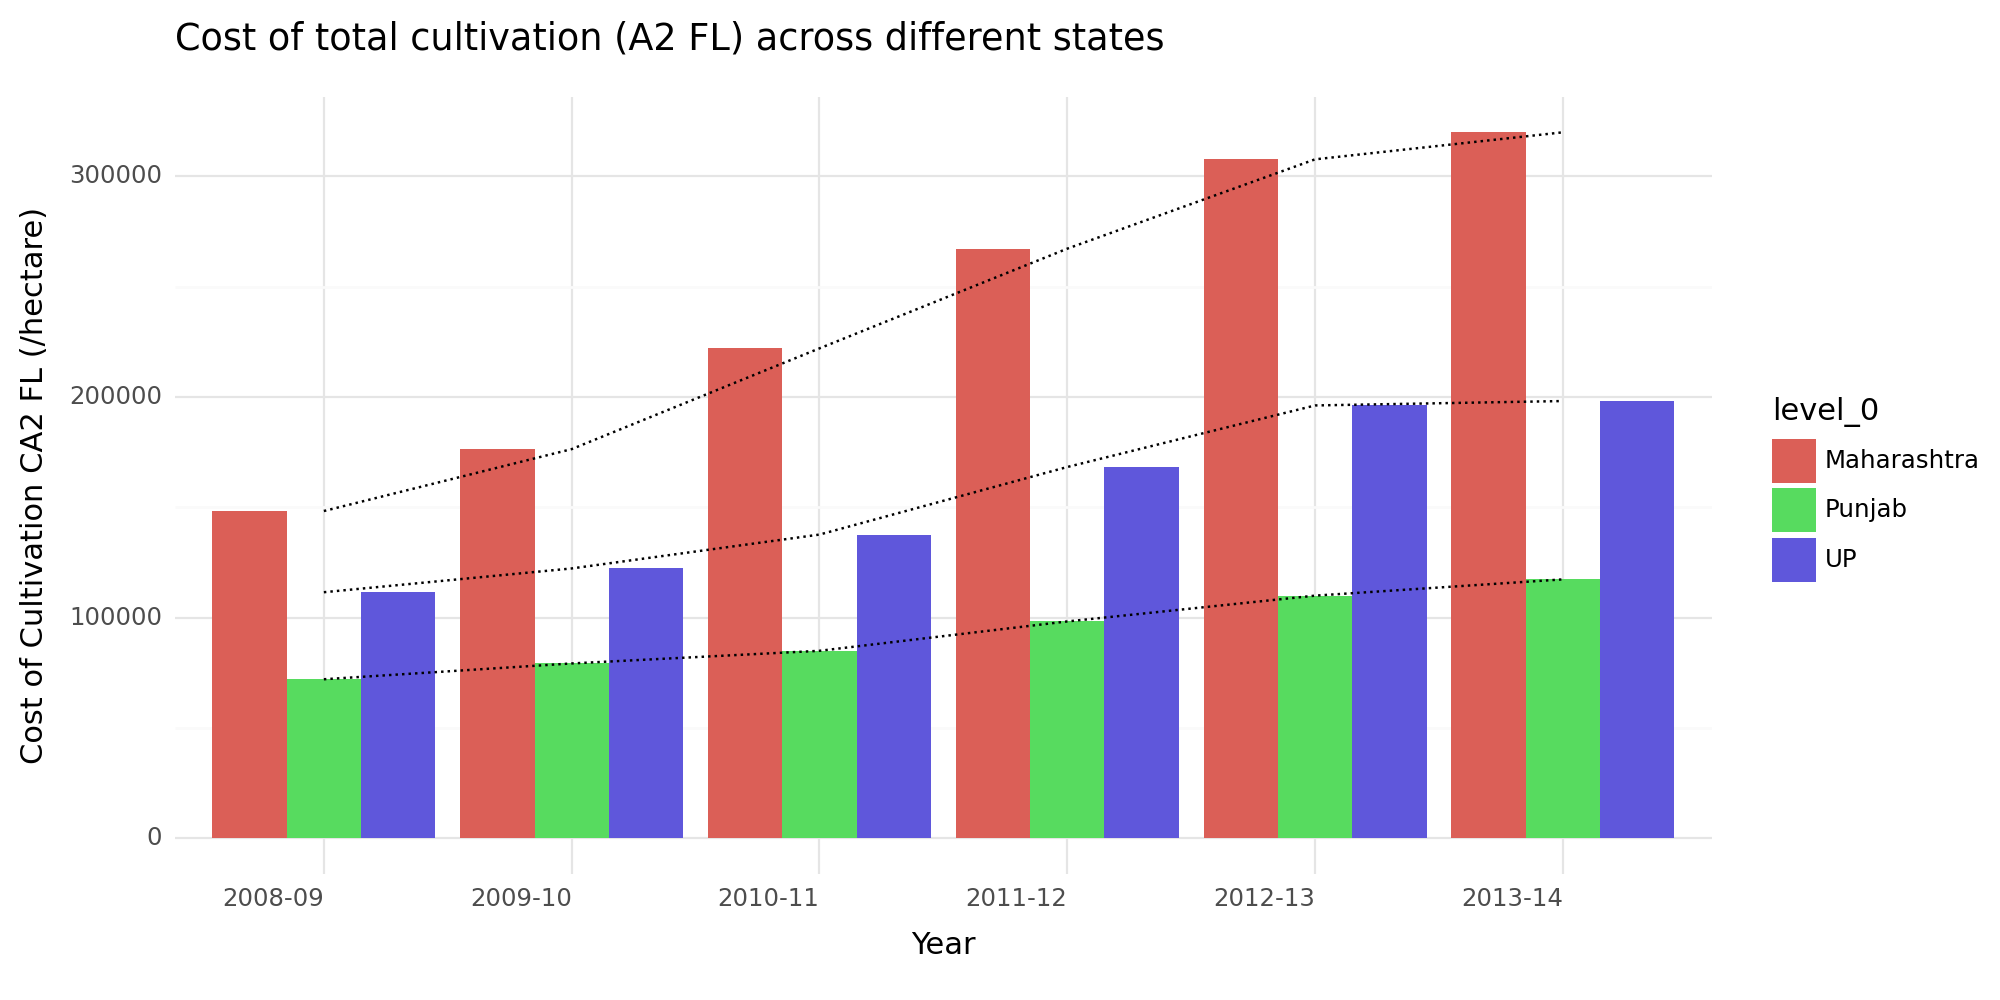

In [888]:
combined_df = pd.concat([total_ccAF_UP, total_ccAF_Punjab, total_ccAF_Maharashtra], keys=['UP', 'Punjab', 'Maharashtra'])

# Reset the index to make the keys accessible as a column
combined_df.reset_index(inplace=True)


plot = (ggplot(combined_df, aes(x='Year', y='Cost_of_Cultivation_A2_FL', fill='level_0', group='level_0')) +
        geom_bar(stat='identity', position='dodge') +
        geom_line(data=combined_df[combined_df['level_0'] == 'UP'], mapping=aes(group=1), linetype='dotted', color='black') +
        geom_line(data=combined_df[combined_df['level_0'] == 'Maharashtra'], mapping=aes(group=0), linetype='dotted', color='black') +
        geom_line(data=combined_df[combined_df['level_0'] == 'Punjab'], mapping=aes(group=2), linetype='dotted', color='black') +
        theme_minimal() +
        labs(title='Cost of total cultivation (A2 FL) across different states', x='Year', y='Cost of Cultivation CA2 FL (/hectare)')+
        theme(axis_text_x=element_text(angle=0, hjust=1), figure_size = (10,5))

       )
print(plot)

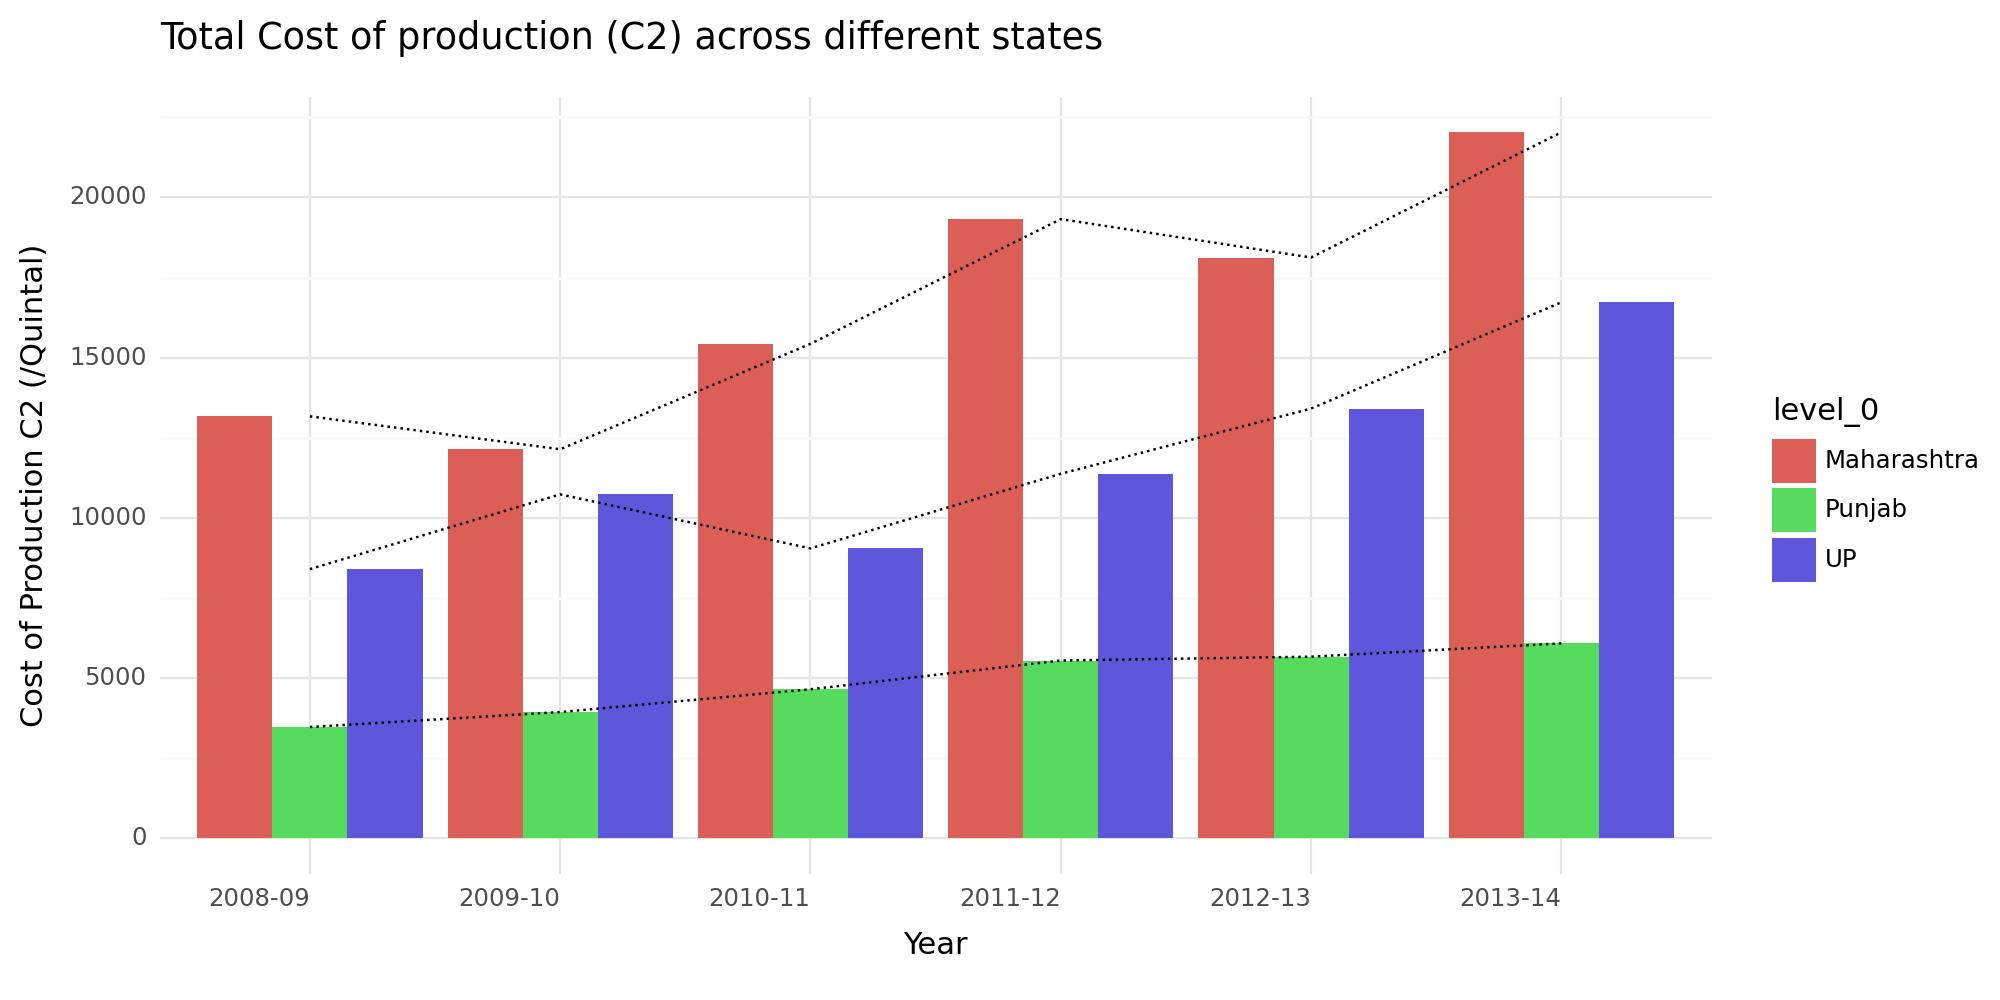

In [889]:
combined_df = pd.concat([total_cp_UP, total_cp_Punjab, total_cp_Maharashtra], keys=['UP', 'Punjab', 'Maharashtra'])

# Reset the index to make the keys accessible as a column
combined_df.reset_index(inplace=True)


plot = (ggplot(combined_df, aes(x='Year', y='Cost_of_Production_C2', fill='level_0', group='level_0')) +
        geom_bar(stat='identity', position='dodge') +
        geom_line(data=combined_df[combined_df['level_0'] == 'UP'], mapping=aes(group=1), linetype='dotted', color='black') +
        geom_line(data=combined_df[combined_df['level_0'] == 'Maharashtra'], mapping=aes(group=0), linetype='dotted', color='black') +
        geom_line(data=combined_df[combined_df['level_0'] == 'Punjab'], mapping=aes(group=2), linetype='dotted', color='black') +
        theme_minimal() +
        labs(title='Total Cost of production (C2) across different states', x='Year', y='Cost of Production C2 (/Quintal)')+
        theme(axis_text_x=element_text(angle=0, hjust=1), figure_size = (10,5))

       )
print(plot)



*   It can be seen that for all the 3 cases, Maharashtra has the highest cost followed by Uttar Pradesh followed by Punjab
*   Also, these costs for all the 3 states are increasing over time




---







I have used a combination of bar chart and line chart for comapring total costs between different states



*   The bar chart allows for easy comparison of total costs between different states for each year.
*   The line chart provides a trend visualization for one specific state.


Therefore, we can compare the total costs across states while also seeing the trend for one specific state.





---



